## MSc. RESEARCH PROJECT

## Topic: A Comparative Analysis of the Effectiveness of Traditional Machine Learning, Emphasizing Meticulous Feature Extraction, and Deep Learning for Predicting Diabetes: A Case Study Utilizing the Pima Indian Diabetes (PID) Dataset. Investigating the Impact of Two Pre-processing Strategies—Median Imputation and Exclusion of Rows with Zero Values

#### About the Dataset

Pima Indian Diabetes Dataset (PIDD): A dataset encompassing 768 health records of female individuals, aged 21 years and above, belonging to the Pima Indian Heritage. This dataset includes a range of pertinent attributes, namely pregnancies, glucose levels, blood pressure (BP), skin thickness, insulin levels, body mass index (BMI), diabetes pedigree function (DPF), age, and outcome (represented as a binary class variable with values 0 and 1) 

#### Data Source

The Pima Indian Diabetes Dataset (PIDD) was collected from Kaggle via the link: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

### Exploratory Data Analysis (EDA)

#### Import libraries 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Data splitting 
from sklearn.model_selection import train_test_split, StratifiedKFold
# preprocessing (standardization)
from sklearn.preprocessing import StandardScaler
# feature selection
from sklearn.ensemble import RandomForestClassifier
# feature estraction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# For data balancing
from imblearn.over_sampling import SMOTE
# Traditional machine learning classifiers
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier 
from xgboost import XGBClassifier 
from sklearn.svm import SVC 
# for the Deep Neural Networks (DNN) Classifier
import tensorflow as tf
# Hyperparameter tunning
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
# Evaluation metrics 
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc)
# Treat warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="tensorflow")

#### Load the dataset

In [2]:
# Load the 'diabetes.csv' dataset
PIDD = pd.read_csv("diabetes.csv")

#### Read information in the dataset

In [3]:
# View the first-five rows of the dataset
PIDD.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

#### Summary:

According to the information provided, there are nine (9) features in the 'diabetes' dataset which includes:
- Pregnancies
- Glucose
- Blood Pressure
- Skin Thickness
- Insulin
- BMI
- Diabetes Pedigree Function
- Age
- Outcome

In [4]:
# Dimension of the dataset
PIDD.shape

(768, 9)

According to the information provided, the PID dataset contains 768 rows and 9 columns 

In [5]:
# Checks for duplicated records in the dataset 
PIDD.duplicated().sum()

0

According to the given information, there are no duplicated records or entries in the 'diabetes' dataset

In [6]:
# Checks for null or missing values in the dataset
PIDD.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Based on the information provided, there are no null or missing values in the 'diabetes' dataset

In [7]:
# Checks for datatypes in the dataset
PIDD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


According to the given information, the dataset comprises of 768 records, encompassing 7 integer and 2 float datatypes



### Summary statictics of the (raw) dataset

In [8]:
# Summary statictis of the (raw) dataset
PIDD.describe().transpose()

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

#### Summary
The following is be deduced from the summary statistic provided;

- The minimum age of the diabetic patients' is 21, and the maximum age is 81.
- The minimum number of times pregnant is 0, and the maximum is 17. 
- The minimum glucose level is 0, and the maximum is 199.
- The minimum blood pressure is 0, and the maximim is 122.
- The minimum skin thickness is 0, and the maximum is 99.
- The minimum insulin level is 0, and the maximum is 846. 
- The minimum BMI is 0, and the maximum is 67.1.
- The minimum diabetes pedigree function is 0.078, and the maximum is 2.420.
- The minimum outcome is 0 and the maximum is 1. 

### Check zero entries in the PID dataset

In [9]:
PIDD2 = PIDD.iloc[:, :-1]
print("No of Rows, No of Columns: ",PIDD2.shape)
print("\nColumn Name           No of 0 Values\n")
print((PIDD2[:] == 0).sum())

No of Rows, No of Columns:  (768, 8)

Column Name           No of 0 Values

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


According to the available information, specific columns in the dataset exhibit zero values:

- The "Pregnancies" column contains 111 entries with a value of zero.
- There are 5 entries with a value of zero in the "Glucose" column.
- The "Blood Pressure" column displays 35 entries with a value of zero.
- The "Skin Thickness" column shows 227 entries with a value of zero.
- In the "Insulin" column, there are 374 entries with a value of zero.
- The "BMI" column has 11 entries with a value of zero.
- Both the "Diabetes Pedigree Function" and "Age" columns do not have any entries with a value of zero.



### Investigating the Features in the Dataset

### Pregnancies feature

In [10]:
# checks for unique values in pregnancy feature
PIDD["Pregnancies"].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [11]:
# checks for number of uniques values in pregnancies feature
PIDD["Pregnancies"].nunique()

17

In [12]:
# Counts of number of Pregnancies by percentage

# Calculate the value counts
value_counts = PIDD["Pregnancies"].value_counts()

# Calculate the percentages
percentages = (value_counts / len(PIDD)) * 100

# Create a DataFrame to display both counts and percentages
result_df = pd.DataFrame({'Counts': value_counts, 'Percentages': percentages})

# Sort the DataFrame by the 'Pregnancies' values
result_df = result_df.sort_index()

# Display the result
print(result_df)

    Counts  Percentages
0      111    14.453125
1      135    17.578125
2      103    13.411458
3       75     9.765625
4       68     8.854167
5       57     7.421875
6       50     6.510417
7       45     5.859375
8       38     4.947917
9       28     3.645833
10      24     3.125000
11      11     1.432292
12       9     1.171875
13      10     1.302083
14       2     0.260417
15       1     0.130208
17       1     0.130208


Based on the available data, there are 111 zero entries (accounts for approximately 14.5%) in the 'pregnancy' column. In this column, the value of zero is a valid and meaningful value. For example, a woman who has never been pregnant would have a value of zero for the pregnancies variable. 

#### Visualize Pregnancies feature

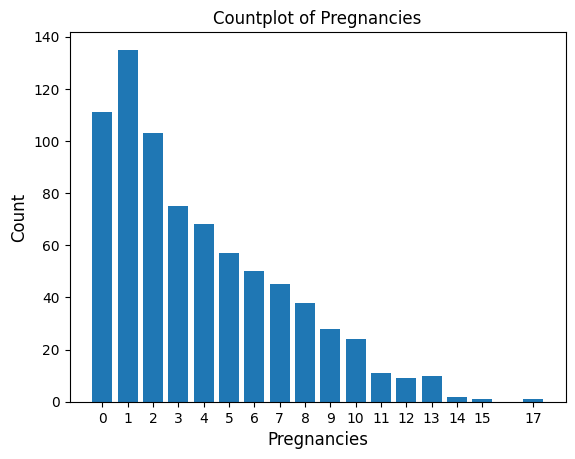

In [13]:
# Calculate the counts of pregnancies in the dataset
category_counts = PIDD['Pregnancies'].value_counts()

# Create a countplot 
plt.bar(category_counts.index, category_counts.values)

# Customize the plot 
plt.title('Countplot of Pregnancies', fontsize = 12)
plt.xlabel('Pregnancies', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

# Set the x-labels to be the unique categories
plt.xticks(category_counts.index)

# Show the plot
plt.show()

Based on the presented chart, it is evident that the majority of females have experienced only one pregnancy

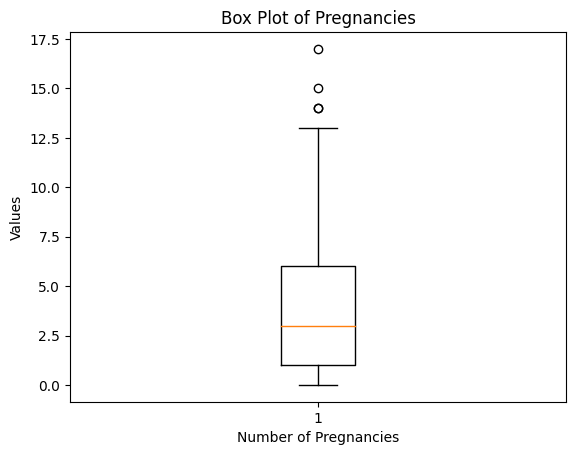

In [14]:
# Create a box plot
plt.boxplot(PIDD["Pregnancies"])

# Add labels and title
plt.xlabel('Number of Pregnancies')
plt.ylabel('Values')
plt.title('Box Plot of Pregnancies')

# Show the plot
plt.show()

According to the presented boxplot, outliers are observed in the pregnancies column, specifically indicating females with at least 13 pregnancies.

### Investigating rows with zero entires in the pregnancies column 

In [15]:
# View Rows with Zero Entries in the Pregnancies Column 
PIDD[PIDD["Pregnancies"]==0]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4              0      137             40             35      168  43.1   
16             0      118             84             47      230  45.8   
45             0      180             66             39        0  42.0   
57             0      100             88             60      110  46.8   
58             0      146             82              0        0  40.5   
..           ...      ...            ...            ...      ...   ...   
713            0      134             58             20      291  26.4   
727            0      141             84             26        0  32.4   
736            0      126             86             27      120  27.4   
753            0      181             88             44      510  43.3   
757            0      123             72              0        0  36.3   

     DiabetesPedigreeFunction  Age  Outcome  
4                       2.288   33        1  
16                      0.551   31        1  
45                      1.893   25        1  
57                      0.962   31        0  
58                      1.781   44        0  
..                        ...  ...      ...  
713                     0.352   21        0  
727                     0.433   22        0  
736                     0.515   21        0  
753                     0.222   26        1  
757                     0.258   52        1  

[111 rows x 9 columns]

According to the information provided, 111 women have never been pregnant.

In [16]:
# Investigating Rows with Zero Entries in the Pregnancies Column and Females Aged 20 Years or Older
PIDD[(PIDD["Pregnancies"]==0) & (PIDD["Age"]>=20)]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4              0      137             40             35      168  43.1   
16             0      118             84             47      230  45.8   
45             0      180             66             39        0  42.0   
57             0      100             88             60      110  46.8   
58             0      146             82              0        0  40.5   
..           ...      ...            ...            ...      ...   ...   
713            0      134             58             20      291  26.4   
727            0      141             84             26        0  32.4   
736            0      126             86             27      120  27.4   
753            0      181             88             44      510  43.3   
757            0      123             72              0        0  36.3   

     DiabetesPedigreeFunction  Age  Outcome  
4                       2.288   33        1  
16                      0.551   31        1  
45                      1.893   25        1  
57                      0.962   31        0  
58                      1.781   44        0  
..                        ...  ...      ...  
713                     0.352   21        0  
727                     0.433   22        0  
736                     0.515   21        0  
753                     0.222   26        1  
757                     0.258   52        1  

[111 rows x 9 columns]

Based on the provided information, the rows with zero entries in the pregnancies column represent records of females aged 20 years or older

### Glucose feature

In [17]:
# checks for unique values in glucose feature
PIDD["Glucose"].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190], dtype=int64)

In [18]:
# checks for number of uniques values in glucose feature
PIDD["Glucose"].nunique()

136

In [19]:
# Counts of number of Glucose by percentage

# Calculate the value counts
value_counts1 = PIDD["Glucose"].value_counts()

# Calculate the percentages
percentages1 = (value_counts1 / len(PIDD)) * 100

# Create a DataFrame to display both counts and percentages
result_df1 = pd.DataFrame({'Counts': value_counts1, 'Percentages': percentages1})

# Sort the DataFrame by the 'Glucose' values
result_df1 = result_df1.sort_index()

# Display the result
print(result_df1)

     Counts  Percentages
0         5     0.651042
44        1     0.130208
56        1     0.130208
57        2     0.260417
61        1     0.130208
..      ...          ...
195       2     0.260417
196       3     0.390625
197       4     0.520833
198       1     0.130208
199       1     0.130208

[136 rows x 2 columns]


Based on the available data, there are 5 zero entries (approximately 0.65%) in the 'glucose' column. These zero values signify instances of missing data. 

#### Visualize Glucose feature

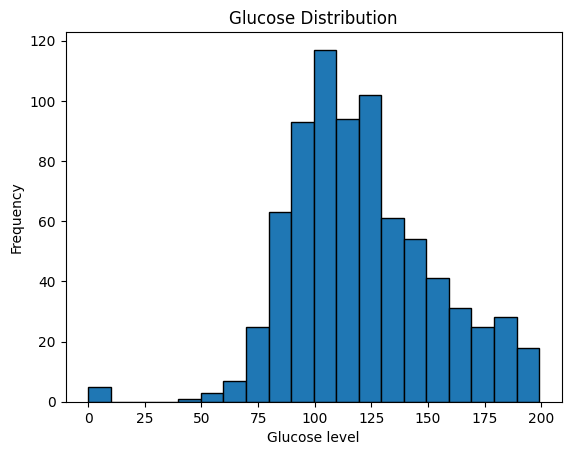

In [20]:
# Plot a histogram of the 'Glucose' column
PIDD['Glucose'].hist(bins=20, edgecolor='black')  # 'bins' determine the number of bars in the histogram
plt.xlabel('Glucose level')
plt.ylabel('Frequency')
plt.title('Glucose Distribution')
plt.grid(False)
plt.show()

According to the displayed histogram, the peak glucose level falls within the range of 100-110 milligrams per deciliter (mg/dL).

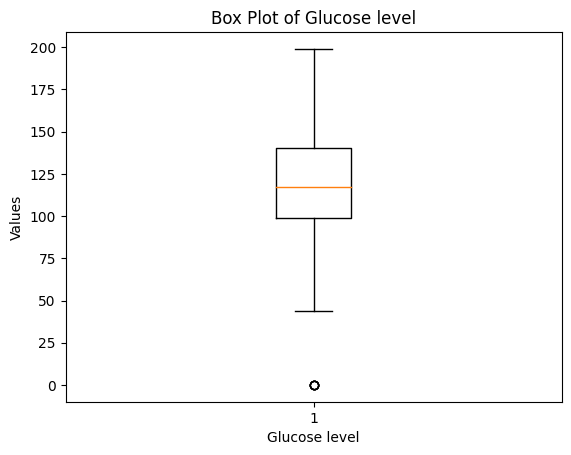

In [21]:
# Create a box plot
plt.boxplot(PIDD["Glucose"])

# Add labels and title
plt.xlabel('Glucose level')
plt.ylabel('Values')
plt.title('Box Plot of Glucose level')

# Show the plot
plt.show()

Based on the provided boxplot, the zero entries in the glucose column are indicative of outliers.

### Blood Pressure Feature

In [22]:
# checks for unique values in blood pressure feature
PIDD["BloodPressure"].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114], dtype=int64)

In [23]:
# checks for number of uniques values in blood pressure feature
PIDD["BloodPressure"].nunique()

47

In [24]:
# Counts of number of Blood pressure by percentage

# Calculate the value counts
value_counts2 = PIDD["BloodPressure"].value_counts()

# Calculate the percentages
percentages2 = (value_counts2 / len(PIDD)) * 100

# Create a DataFrame to display both counts and percentages
result_df2 = pd.DataFrame({'Counts': value_counts2, 'Percentages': percentages2})

# Sort the DataFrame by the 'blood pressure' values
result_df2 = result_df2.sort_index()

# Display the result
print(result_df2)

     Counts  Percentages
0        35     4.557292
24        1     0.130208
30        2     0.260417
38        1     0.130208
40        1     0.130208
44        4     0.520833
46        2     0.260417
48        5     0.651042
50       13     1.692708
52       11     1.432292
54       11     1.432292
55        2     0.260417
56       12     1.562500
58       21     2.734375
60       37     4.817708
61        1     0.130208
62       34     4.427083
64       43     5.598958
65        7     0.911458
66       30     3.906250
68       45     5.859375
70       57     7.421875
72       44     5.729167
74       52     6.770833
75        8     1.041667
76       39     5.078125
78       45     5.859375
80       40     5.208333
82       30     3.906250
84       23     2.994792
85        6     0.781250
86       21     2.734375
88       25     3.255208
90       22     2.864583
92        8     1.041667
94        6     0.781250
95        1     0.130208
96        4     0.520833
98        3     0.390625


Based on the available data, there are 35 zero entries (accounts for approximately 4.56%) in the 'blood pressure' column. These zero values signify instances of missing data. 

In [25]:
# Investigate records having zero entries in Blood pressure feature 
PIDD[PIDD["BloodPressure"]==0]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
7             10      115              0              0        0  35.3   
15             7      100              0              0        0  30.0   
49             7      105              0              0        0   0.0   
60             2       84              0              0        0   0.0   
78             0      131              0              0        0  43.2   
81             2       74              0              0        0   0.0   
172            2       87              0             23        0  28.9   
193           11      135              0              0        0  52.3   
222            7      119              0              0        0  25.2   
261            3      141              0              0        0  30.0   
266            0      138              0              0        0  36.3   
269            2      146              0              0        0  27.5   
300            0      167              0              0        0  32.3   
332            1      180              0              0        0  43.3   
336            0      117              0              0        0  33.8   
347            3      116              0              0        0  23.5   
357           13      129              0             30        0  39.9   
426            0       94              0              0        0   0.0   
430            2       99              0              0        0  22.2   
435            0      141              0              0        0  42.4   
453            2      119              0              0        0  19.6   
468            8      120              0              0        0  30.0   
484            0      145              0              0        0  44.2   
494            3       80              0              0        0   0.0   
522            6      114              0              0        0   0.0   
533            6       91              0              0        0  29.8   
535            4      132              0              0        0  32.9   
589            0       73              0              0        0  21.1   
601            6       96              0              0        0  23.7   
604            4      183              0              0        0  28.4   
619            0      119              0              0        0  32.4   
643            4       90              0              0        0  28.0   
697            0       99              0              0        0  25.0   
703            2      129              0              0        0  38.5   
706           10      115              0              0        0   0.0   

     DiabetesPedigreeFunction  Age  Outcome  
7                       0.134   29        0  
15                      0.484   32        1  
49                      0.305   24        0  
60                      0.304   21        0  
78                      0.270   26        1  
81                      0.102   22        0  
172                     0.773   25        0  
193                     0.578   40        1  
222                     0.209   37        0  
261                     0.761   27        1  
266                     0.933   25        1  
269                     0.240   28        1  
300                     0.839   30        1  
332                     0.282   41        1  
336                     0.932   44        0  
347                     0.187   23        0  
357                     0.569   44        1  
426                     0.256   25        0  
430                     0.108   23        0  
435                     0.205   29        1  
453                     0.832   72        0  
468                     0.183   38        1  
484                     0.630   31        1  
494                     0.174   22        0  
522                     0.189   26        0  
533                     0.501   31        0  
535                     0.302   23        1  
589                     0.342   25        0  
601   

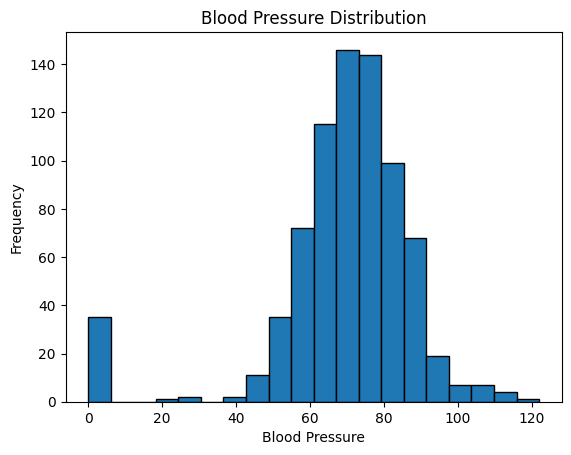

In [26]:
# Plot a histogram of the 'Blood Pressure' column
PIDD['BloodPressure'].hist(bins=20, edgecolor='black')  # 'bins' determine the number of bars in the histogram
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.title('Blood Pressure Distribution')
plt.grid(False)
plt.show()

According to the displayed histogram, the peak blood pressure level falls within the range of 67-74 millimeters of mercury (mmHg).

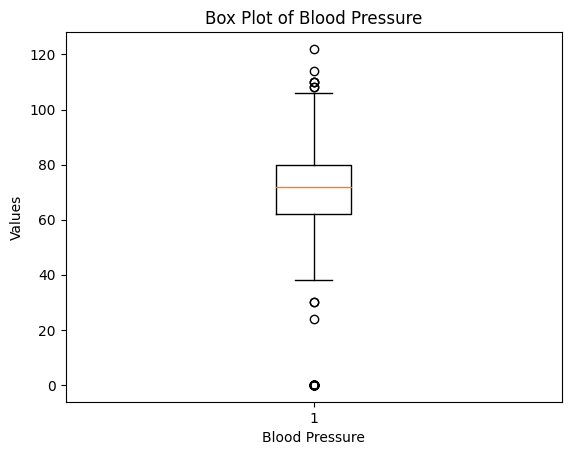

In [27]:
# Create a box plot
plt.boxplot(PIDD["BloodPressure"])

# Add labels and title
plt.xlabel('Blood Pressure')
plt.ylabel('Values')
plt.title('Box Plot of Blood Pressure')

# Show the plot
plt.show()

According to the provided boxplot, outliers are evident in the blood pressure column.

### Skin Thickness Feature

In [28]:
# checks for unique values in Skin Thickness feature
PIDD["SkinThickness"].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99],
      dtype=int64)

In [29]:
# checks for number of uniques values in Skin Thickness feature
PIDD["SkinThickness"].nunique()

51

In [30]:
# Counts of number of Skin Thickness by percentage

# Calculate the value counts
value_counts3 = PIDD["SkinThickness"].value_counts()

# Calculate the percentages
percentages3 = (value_counts3 / len(PIDD)) * 100

# Create a DataFrame to display both counts and percentages
result_df3 = pd.DataFrame({'Counts': value_counts3, 'Percentages': percentages3})

# Sort the DataFrame by the 'Glucose' values
result_df3 = result_df3.sort_index()

# Display the result
print(result_df3)

    Counts  Percentages
0      227    29.557292
7        2     0.260417
8        2     0.260417
10       5     0.651042
11       6     0.781250
12       7     0.911458
13      11     1.432292
14       6     0.781250
15      14     1.822917
16       6     0.781250
17      14     1.822917
18      20     2.604167
19      18     2.343750
20      13     1.692708
21      10     1.302083
22      16     2.083333
23      22     2.864583
24      12     1.562500
25      16     2.083333
26      16     2.083333
27      23     2.994792
28      20     2.604167
29      17     2.213542
30      27     3.515625
31      19     2.473958
32      31     4.036458
33      20     2.604167
34       8     1.041667
35      15     1.953125
36      14     1.822917
37      16     2.083333
38       7     0.911458
39      18     2.343750
40      16     2.083333
41      15     1.953125
42      11     1.432292
43       6     0.781250
44       5     0.651042
45       6     0.781250
46       8     1.041667
47       4     0

Based on the available data, there are 227 zero entries (accounts for approximately 29.56%) in the 'blood pressure' column. These zero values signify instances of missing data. 

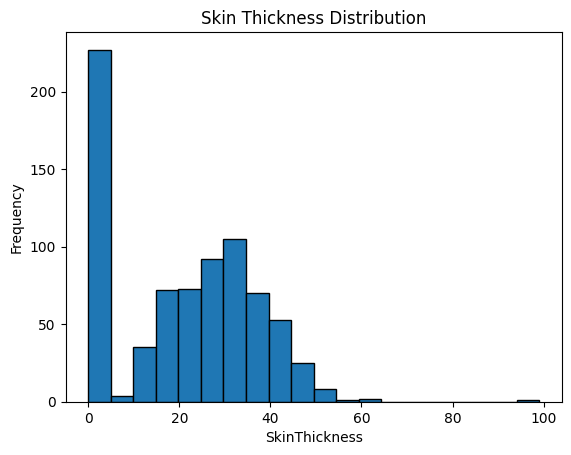

In [31]:
# Plot a histogram of the 'Skin Thickness' column
PIDD['SkinThickness'].hist(bins=20, edgecolor='black')  # 'bins' determine the number of bars in the histogram
plt.xlabel('SkinThickness')
plt.ylabel('Frequency')
plt.title('Skin Thickness Distribution')
plt.grid(False)
plt.show()

Based on the displayed histogram, the peak skin thickness level corresponds to zero values, accounting for approximately 29.56% of the dataset. 

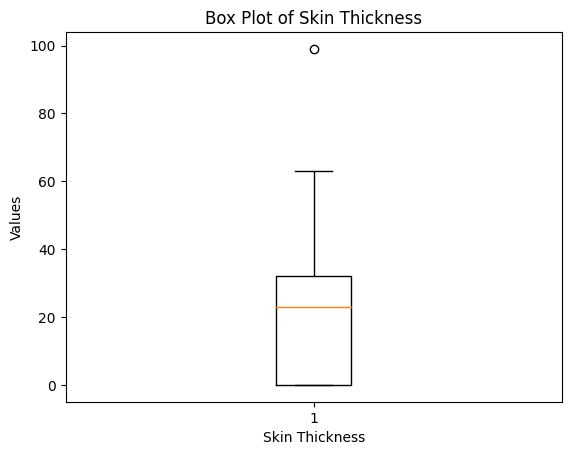

In [32]:
# Create a box plot
plt.boxplot(PIDD["SkinThickness"])

# Add labels and title
plt.xlabel('Skin Thickness')
plt.ylabel('Values')
plt.title('Box Plot of Skin Thickness')

# Show the plot
plt.show()

Based on the provided boxplot, there is an outlier observed at 99 millimeters (mm) in the skin thickness column.

### Insulin Feature

In [33]:
# checks for unique values in Insulin feature
PIDD["Insulin"].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [34]:
# checks for number of uniques values in Insulin feature
PIDD["Insulin"].nunique()

186

In [35]:
# Counts of number of Insulin by percentage

# Calculate the value counts
value_counts4 = PIDD["Insulin"].value_counts()

# Calculate the percentages
percentages4 = (value_counts4 / len(PIDD)) * 100

# Create a DataFrame to display both counts and percentages
result_df4 = pd.DataFrame({'Counts': value_counts4, 'Percentages': percentages4})

# Sort the DataFrame by the 'Insulin' values
result_df4 = result_df4.sort_index()

# Display the result
print(result_df4)

     Counts  Percentages
0       374    48.697917
14        1     0.130208
15        1     0.130208
16        1     0.130208
18        2     0.260417
..      ...          ...
579       1     0.130208
600       1     0.130208
680       1     0.130208
744       1     0.130208
846       1     0.130208

[186 rows x 2 columns]


Based on the provided information, there are 374 zero values, constituting approximately 48.7%, in the insulin column, and these zero values correspond to the modal value.

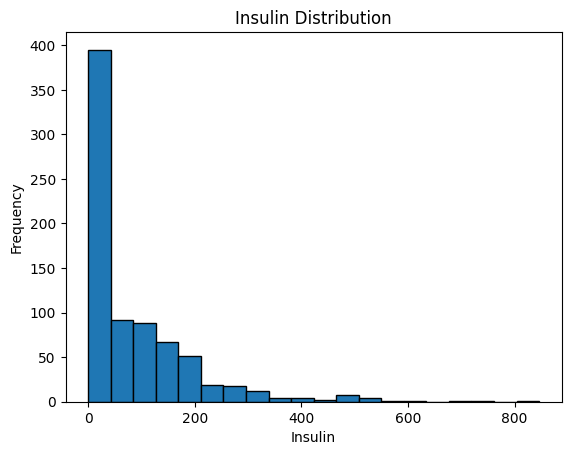

In [36]:
# Plot a histogram of the 'Insulin' column
PIDD['Insulin'].hist(bins=20, edgecolor='black')  # 'bins' determine the number of bars in the histogram
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.title('Insulin Distribution')
plt.grid(False)
plt.show()

According to the presented histogram, the peak insulin level corresponds to zero values, constituting approximately half of the entire dataset.

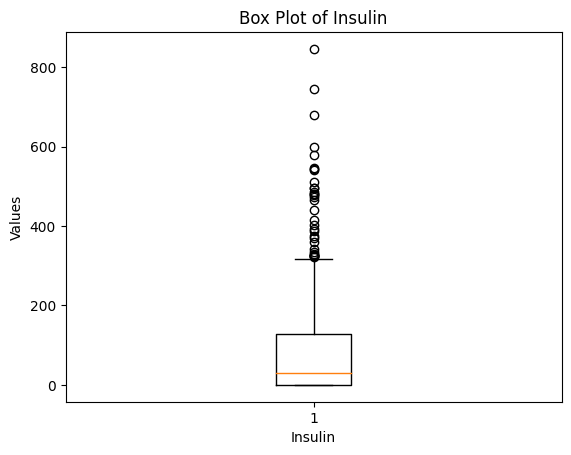

In [37]:
# Create a box plot
plt.boxplot(PIDD["Insulin"])

# Add labels and title
plt.xlabel('Insulin')
plt.ylabel('Values')
plt.title('Box Plot of Insulin')

# Show the plot
plt.show()

According to the provided boxplot, multiple outliers are observed in the insulin column.

### BMI Feature

In [38]:
# checks for unique values in BMI feature
PIDD["BMI"].unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [39]:
# checks for number of uniques values in BMI feature
PIDD["BMI"].nunique()

248

In [40]:
# Counts of number of BMI by percentage

# Calculate the value counts
value_counts5 = PIDD["BMI"].value_counts()

# Calculate the percentages
percentages5 = (value_counts5 / len(PIDD)) * 100

# Create a DataFrame to display both counts and percentages
result_df5 = pd.DataFrame({'Counts': value_counts5, 'Percentages': percentages5})

# Sort the DataFrame by the 'BMI' values
result_df5 = result_df5.sort_index()

# Display the result
print(result_df5)

      Counts  Percentages
0.0       11     1.432292
18.2       3     0.390625
18.4       1     0.130208
19.1       1     0.130208
19.3       1     0.130208
...      ...          ...
53.2       1     0.130208
55.0       1     0.130208
57.3       1     0.130208
59.4       1     0.130208
67.1       1     0.130208

[248 rows x 2 columns]


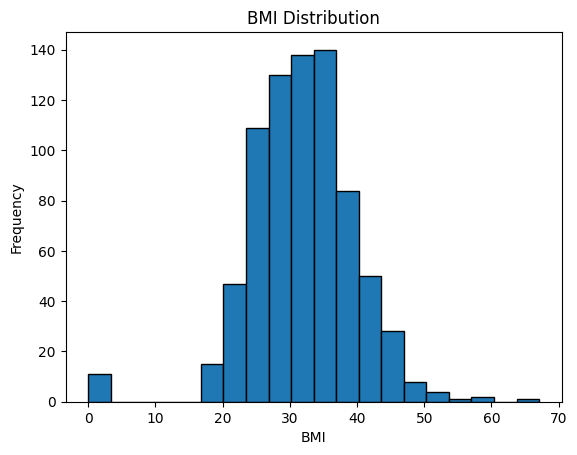

In [41]:
# Plot a histogram of the 'BMI' column
PIDD['BMI'].hist(bins=20, edgecolor='black')  # 'bins' determine the number of bars in the histogram
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.grid(False)
plt.show()

Based on the displayed histogram, the peak insulin level is observed within the range of 33-37 kilograms per square meter (kg/m²).

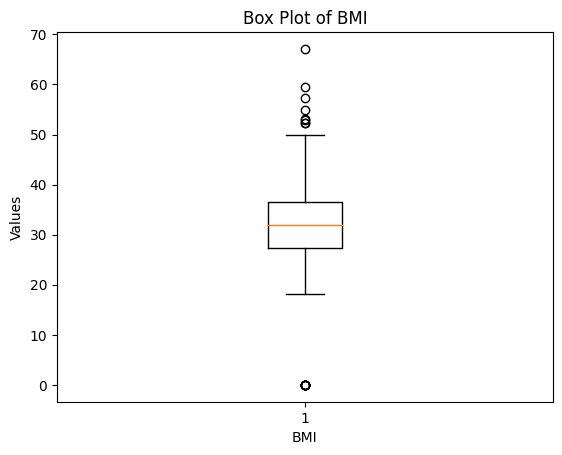

In [42]:
# Create a box plot
plt.boxplot(PIDD["BMI"])

# Add labels and title
plt.xlabel('BMI')
plt.ylabel('Values')
plt.title('Box Plot of BMI')

# Show the plot
plt.show()

Based on the provided boxplot, multiple outliers are observed in the BMI column.

### Diabetes Pedigree Function Feature

In [43]:
# checks for unique values in Diabetes Pedigree Function feature
PIDD["DiabetesPedigreeFunction"].unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

In [44]:
# checks for number of uniques values in Diabetes Pedigree Function feature
PIDD["DiabetesPedigreeFunction"].nunique()

517

In [45]:
# Counts of number of Diabetes Pedigree Function by percentage

# Calculate the value counts
value_counts6 = PIDD["DiabetesPedigreeFunction"].value_counts()

# Calculate the percentages
percentages6 = (value_counts6 / len(PIDD)) * 100

# Create a DataFrame to display both counts and percentages
result_df6 = pd.DataFrame({'Counts': value_counts6, 'Percentages': percentages6})

# Sort the DataFrame by the 'DiabetesPedigreeFunction' values
result_df6 = result_df6.sort_index()

# Display the result
print(result_df6)

       Counts  Percentages
0.078       1     0.130208
0.084       1     0.130208
0.085       2     0.260417
0.088       2     0.260417
0.089       1     0.130208
...       ...          ...
1.893       1     0.130208
2.137       1     0.130208
2.288       1     0.130208
2.329       1     0.130208
2.420       1     0.130208

[517 rows x 2 columns]


In [46]:
# Investigate records having zero entries in Diabetes Pedigree Function feature 
PIDD[PIDD["DiabetesPedigreeFunction"]==0]

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

Based on our findings, there are no zero values in diabetes pedigree function column. 

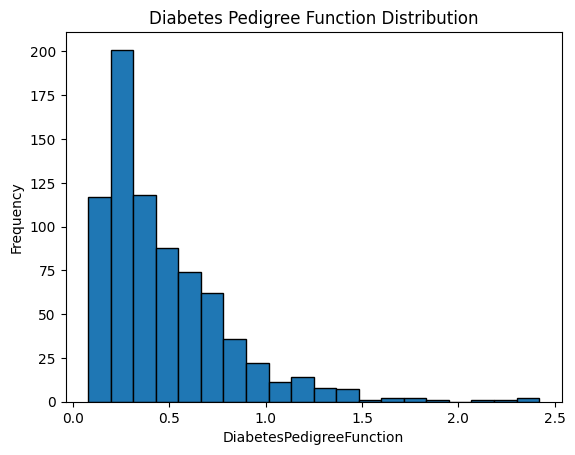

In [47]:
# Plot a histogram of the 'Diabetes Pedigree Function' column
PIDD['DiabetesPedigreeFunction'].hist(bins=20, edgecolor='black')  # 'bins' determine the number of bars in the histogram
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Frequency')
plt.title('Diabetes Pedigree Function Distribution')
plt.grid(False)
plt.show()

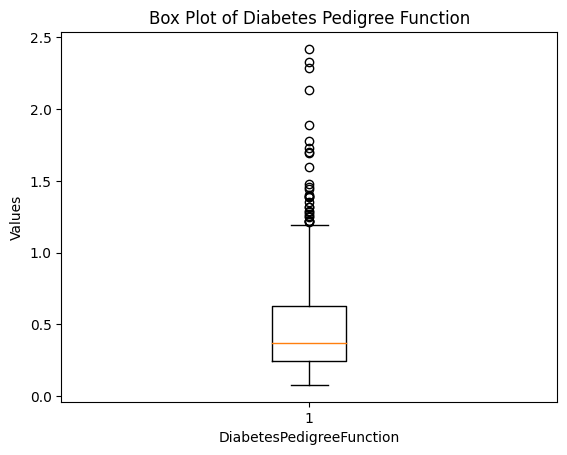

In [48]:
# Create a box plot
plt.boxplot(PIDD["DiabetesPedigreeFunction"])

# Add labels and title
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Values')
plt.title('Box Plot of Diabetes Pedigree Function')

# Show the plot
plt.show()

According to the provided boxplot, several outliers are evident in the Diabetes Pedigree Function column.

### Age Feature

In [49]:
# checks for unique values in Age feature
PIDD["Age"].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

In [50]:
# checks for number of uniques values in Age feature
PIDD["Age"].nunique()

52

In [51]:
# Counts of number of Age by percentage

# Calculate the value counts
value_counts7 = PIDD["Age"].value_counts()

# Calculate the percentages
percentages7 = (value_counts7 / len(PIDD)) * 100

# Create a DataFrame to display both counts and percentages
result_df7 = pd.DataFrame({'Counts': value_counts7, 'Percentages': percentages7})

# Sort the DataFrame by the 'Age' values
result_df7 = result_df7.sort_index()

# Display the result
print(result_df7)

    Counts  Percentages
21      63     8.203125
22      72     9.375000
23      38     4.947917
24      46     5.989583
25      48     6.250000
26      33     4.296875
27      32     4.166667
28      35     4.557292
29      29     3.776042
30      21     2.734375
31      24     3.125000
32      16     2.083333
33      17     2.213542
34      14     1.822917
35      10     1.302083
36      16     2.083333
37      19     2.473958
38      16     2.083333
39      12     1.562500
40      13     1.692708
41      22     2.864583
42      18     2.343750
43      13     1.692708
44       8     1.041667
45      15     1.953125
46      13     1.692708
47       6     0.781250
48       5     0.651042
49       5     0.651042
50       8     1.041667
51       8     1.041667
52       8     1.041667
53       5     0.651042
54       6     0.781250
55       4     0.520833
56       3     0.390625
57       5     0.651042
58       7     0.911458
59       3     0.390625
60       5     0.651042
61       2     0

According to the available data, the mode of females' age is 22, representing 72 females (approximately 9.38%) in the age column.

In [52]:
# Investigate records having zero entries in Age feature 
PIDD[PIDD["Age"]==0]

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

According to the provided information, there are no instances of zero values in the age column.

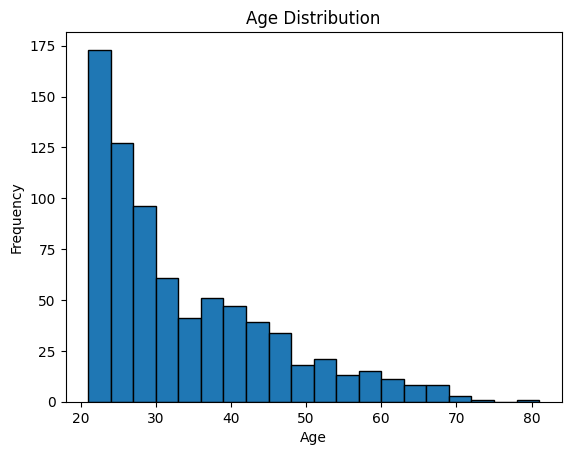

In [53]:
# Plot a histogram of the 'Age' column
PIDD['Age'].hist(bins=20, edgecolor='black')  # 'bins' determine the number of bars in the histogram
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(False)
plt.show()

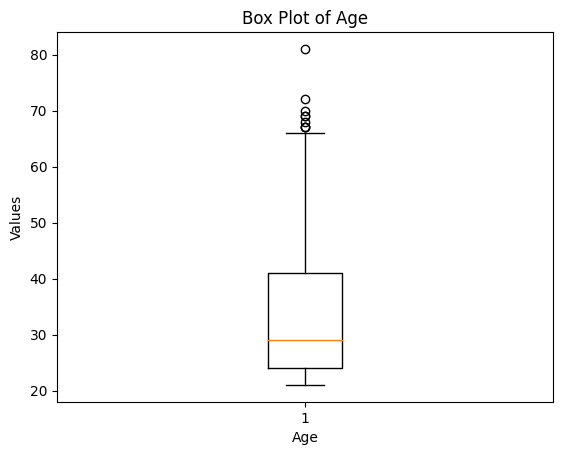

In [54]:
# Create a box plot
plt.boxplot(PIDD["Age"])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Values')
plt.title('Box Plot of Age')

# Show the plot
plt.show()

According to the presented boxplot, several outliers are noticeable in the age column.

### Outcome Feature

In [55]:
# checks for unique values in Outcome feature
PIDD["Outcome"].unique()

array([1, 0], dtype=int64)

According to the provided information, the outcome column consists of two classes: 0, representing 'Non-diabetic patient,' and 1, representing 'Diabetic patient.'

In [56]:
# checks for number of uniques values in Outcome feature
PIDD["Outcome"].nunique()

2

In [57]:
# Counts of number of Outcome by percentage

# Calculate the value counts
value_counts8 = PIDD["Outcome"].value_counts()

# Calculate the percentages
percentages8 = (value_counts8 / len(PIDD)) * 100

# Create a DataFrame to display both counts and percentages
result_df8 = pd.DataFrame({'Counts': value_counts8, 'Percentages': percentages8})

# Sort the DataFrame by the 'Outcome' values
result_df8 = result_df8.sort_index()

# Display the result
print(result_df8)

   Counts  Percentages
0     500    65.104167
1     268    34.895833


According to the provided information, there are 500 females (approximately 65%) classified as non-diabetic patients and 268 females (approximately 35%) classified as diabetic patients.

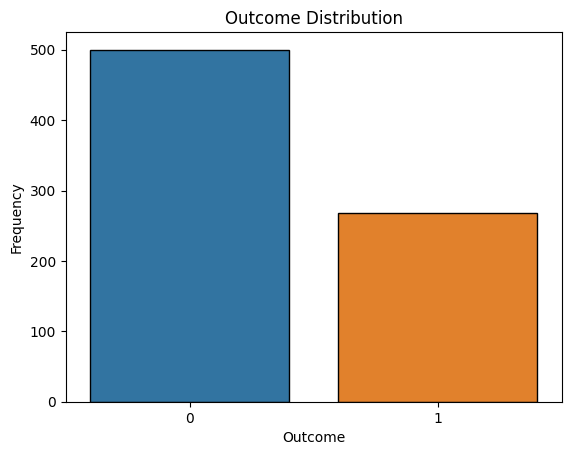

In [58]:
# Create a countplot for the 'Outcome' column
sns.countplot(data=PIDD, x='Outcome', edgecolor='black')

plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Outcome Distribution')
plt.grid(False)
plt.show()

Based on the presented countplot, there is an imbalance in the classes of the outcome column 

### Bivariate Visualization

Bivariate plots of each features by the target 'outcome'. 

In [59]:
# Group by 'Outcome' and calculate the mode for each column
result = PIDD.groupby('Outcome').apply(lambda x: x.mode().iloc[0])
result

0        Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Outcome                                                                      
0                1.0     99.0           74.0            0.0      0.0   0.0   
1                0.0    125.0           70.0            0.0      0.0  32.9   

0        DiabetesPedigreeFunction   Age  Outcome  
Outcome                                           
0                           0.207  22.0      0.0  
1                           0.254  25.0      1.0

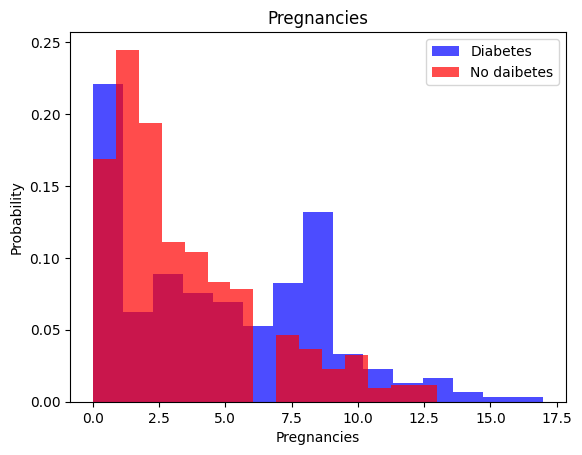

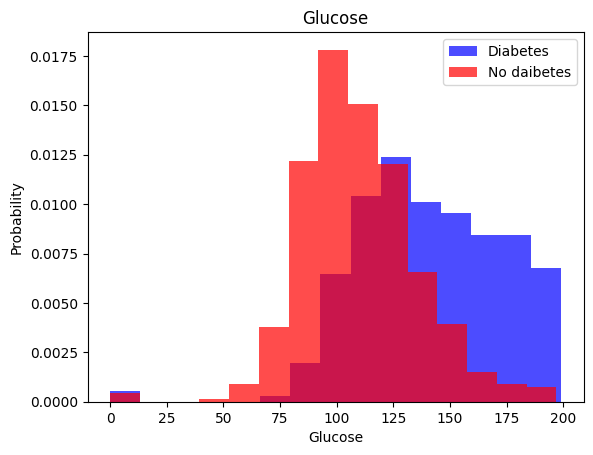

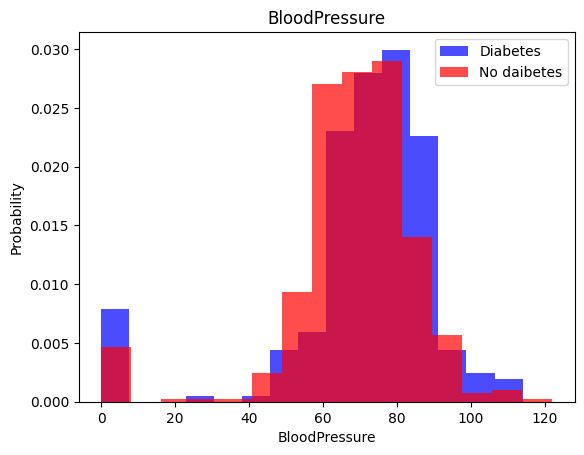

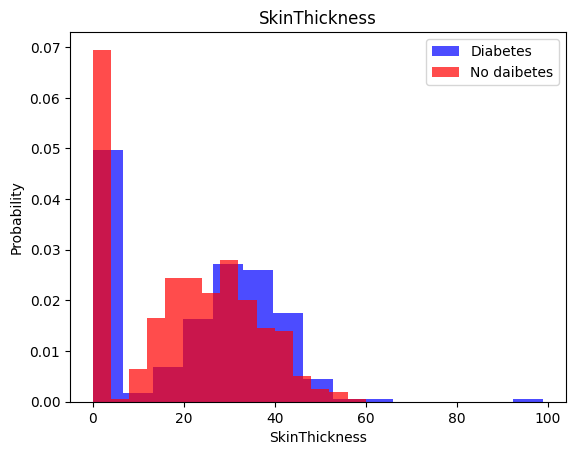

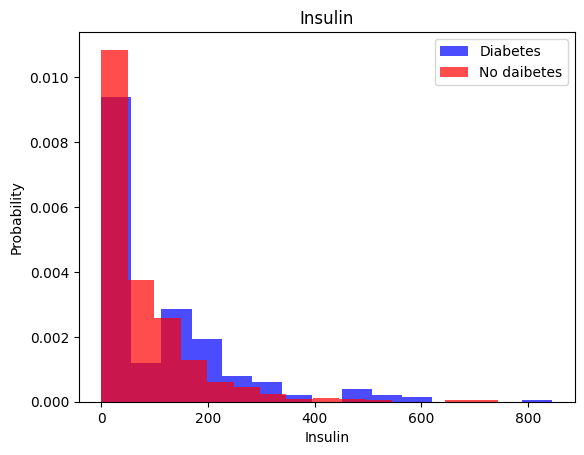

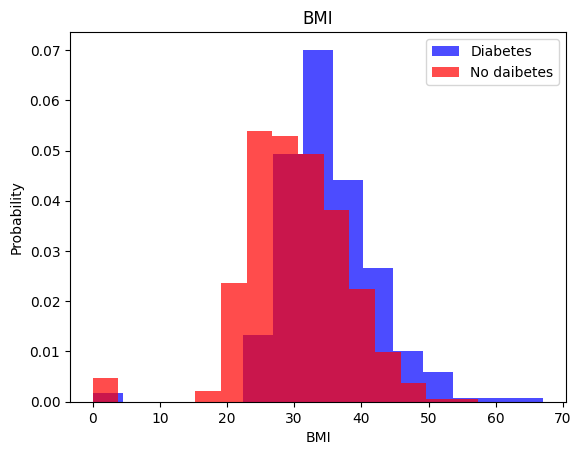

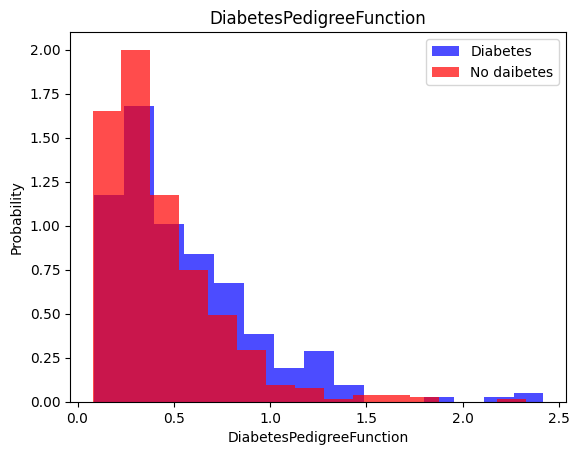

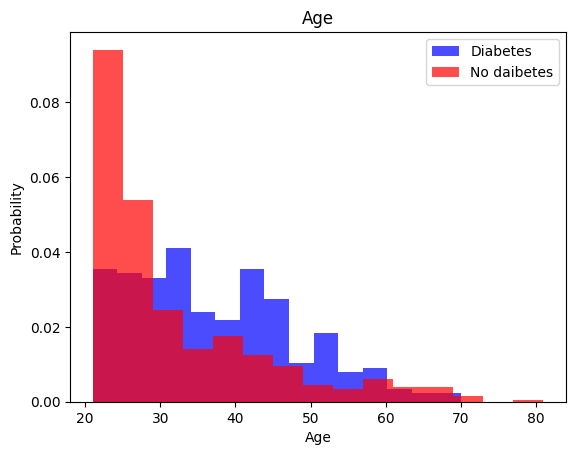

In [60]:
for i in range(len(PIDD.columns[:-1])):
    label = PIDD.columns[i]
    plt.hist(PIDD[PIDD["Outcome"]==1][label], color="blue", label="Diabetes", alpha=0.7, density=True, bins=15)
    plt.hist(PIDD[PIDD["Outcome"]==0][label], color="red", label="No daibetes", alpha=0.7, density=True, bins=15)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

Analysis of the chart of the PID (raw) dataset reveals the following distinctive patterns between diabetic and non-diabetic patients. 
    

- Pregnancies: Most diabetic patients have not had pregnancies, while non-diabetic patients predominantly show a history of only one pregnancy.

- Glucose Level: Diabetic patients commonly exhibit a glucose level around 125, contrasting with non-diabetic patients who often have a glucose level around 99.

- Blood Pressure: The majority of diabetic patients have a blood pressure of 70 mmHg, while non-diabetic patients tend to have a blood pressure of 74.

- Skin Thickness: Diabetic patients typically present a skin thickness of 0, and non-diabetic patients also often have a skin thickness of 0.

- Insulin Level: Most diabetic patients have an insulin level of 0, similar to non-diabetic patients.

- BMI (Body Mass Index): Diabetic patients commonly have a BMI of 32.9, whereas non-diabetic patients often have a BMI of 0.

- Diabetes Pedigree Function: Diabetic patients typically show a diabetes pedigree function of 0.254, while non-diabetic patients often have a value around 0.207.

- Age: The majority of diabetic patients are around 25 years old, while non-diabetic patients are often around 22 years old.



## Data Preprocessing

### Data Imputation

Here, we will adopt two approaches in addressing zero entries in the PID dataset. These include:

#### 1. Replace zero entries (missing data) in the Glucose, Blood Pressure, Skin Thickness, Insulin, and BMI columns with their respective median values to ensure data consistency and accuracy. This approach is chosen because the median remains robust to outliers and is a reliable measure of central tendency.

#### 2. Exclude rows with zero entries (handling missing data) in the PID dataset to . This apporach is chosen to improve the quality of the data, reduce the impact of missing data on the analysis, and ensure the reliability of the results.

### 1. Preprocessing by Replacing the Zero Entries with the Median Values (Median Imputation)

In [61]:
# make a copy 
PIDD_median = PIDD.copy()

In [62]:
# Replace zero entries in Glucose column with np.nan
PIDD_median["Glucose"].replace(0, np.nan, inplace=True) 

# Replace the np.nan entries with the median value
PIDD_median["Glucose"].replace(np.nan, PIDD_median["Glucose"].median(), inplace=True)

In [63]:
# Replace zero entries in BloodPressure column with np.nan 
PIDD_median["BloodPressure"].replace(0, np.nan, inplace=True)

# Replace the np.nan entries with the median value
PIDD_median["BloodPressure"].replace(np.nan, PIDD_median["BloodPressure"].median(), inplace=True)

In [64]:
# Replace zero entries in SkinThickness column with np.nan
PIDD_median["SkinThickness"].replace(0, np.nan, inplace=True)

# Replace the np.nan entries with the median value
PIDD_median["SkinThickness"].replace(np.nan, PIDD_median["SkinThickness"].median(), inplace=True)

In [65]:
# Replace zero entries in Insulin column with np.nan
PIDD_median["Insulin"].replace(0, np.nan, inplace=True)

# Replace the np.nan entries with the median value
PIDD_median["Insulin"].replace(np.nan, PIDD_median["Insulin"].median(), inplace=True)

In [66]:
# Replace zero entries in BMI column with np.nan 
PIDD_median["BMI"].replace(0, np.nan, inplace=True)

# Replace the np.nan entries with the median value
PIDD_median["BMI"].replace(np.nan, PIDD_median["BMI"].median(), inplace=True)

In [67]:
# save the new PIDD 
PIDD_median.to_csv('PIDD_median.csv', index=False) 

### Checking the Distribution (Cleaned Dataset by Median Imputation)

In [68]:
# Summary statistics of the (cleaned) dataset
PIDD_median.describe().T

count        mean        std     min        25%  \
Pregnancies               768.0    3.845052   3.369578   0.000    1.00000   
Glucose                   768.0  121.656250  30.438286  44.000   99.75000   
BloodPressure             768.0   72.386719  12.096642  24.000   64.00000   
SkinThickness             768.0   29.108073   8.791221   7.000   25.00000   
Insulin                   768.0  140.671875  86.383060  14.000  121.50000   
BMI                       768.0   32.455208   6.875177  18.200   27.50000   
DiabetesPedigreeFunction  768.0    0.471876   0.331329   0.078    0.24375   
Age                       768.0   33.240885  11.760232  21.000   24.00000   
Outcome                   768.0    0.348958   0.476951   0.000    0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              29.0000   32.00000   99.00  
Insulin                   125.0000  127.25000  846.00  
BMI                        32.3000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

The presented summary statistics reveal the following:

- The minimum number of pregnancies is 0, the maximum is 17, and the mean is approximately 3.8.
- The minimum glucose level is 44, the maximum is 199, and the mean is approximately 121.7.
- The minimum blood pressure is 24, the maximum is 122, and the mean is approximately 72.4.
- The minimum skin thickness is 7, the maximum is 99, and the mean is approximately 29.1.
- The minimum insulin level is 14, the maximum is 846, and the mean is approximately 140.7.
- The minimum BMI is 18.2, the maximum is 67.1, and the mean is approximately 32.5.
- The minimum diabetes pedigree function value is 0.078, the maximum is 2.42, and the mean is approximately 0.47.
- The minimum age is 21, the maximum is 81, and the mean age is approximately 33.
- The minimum outcome value is 0, the maximum is 1, and the mean is approximately 0.35.

<Figure size 768x576 with 0 Axes>

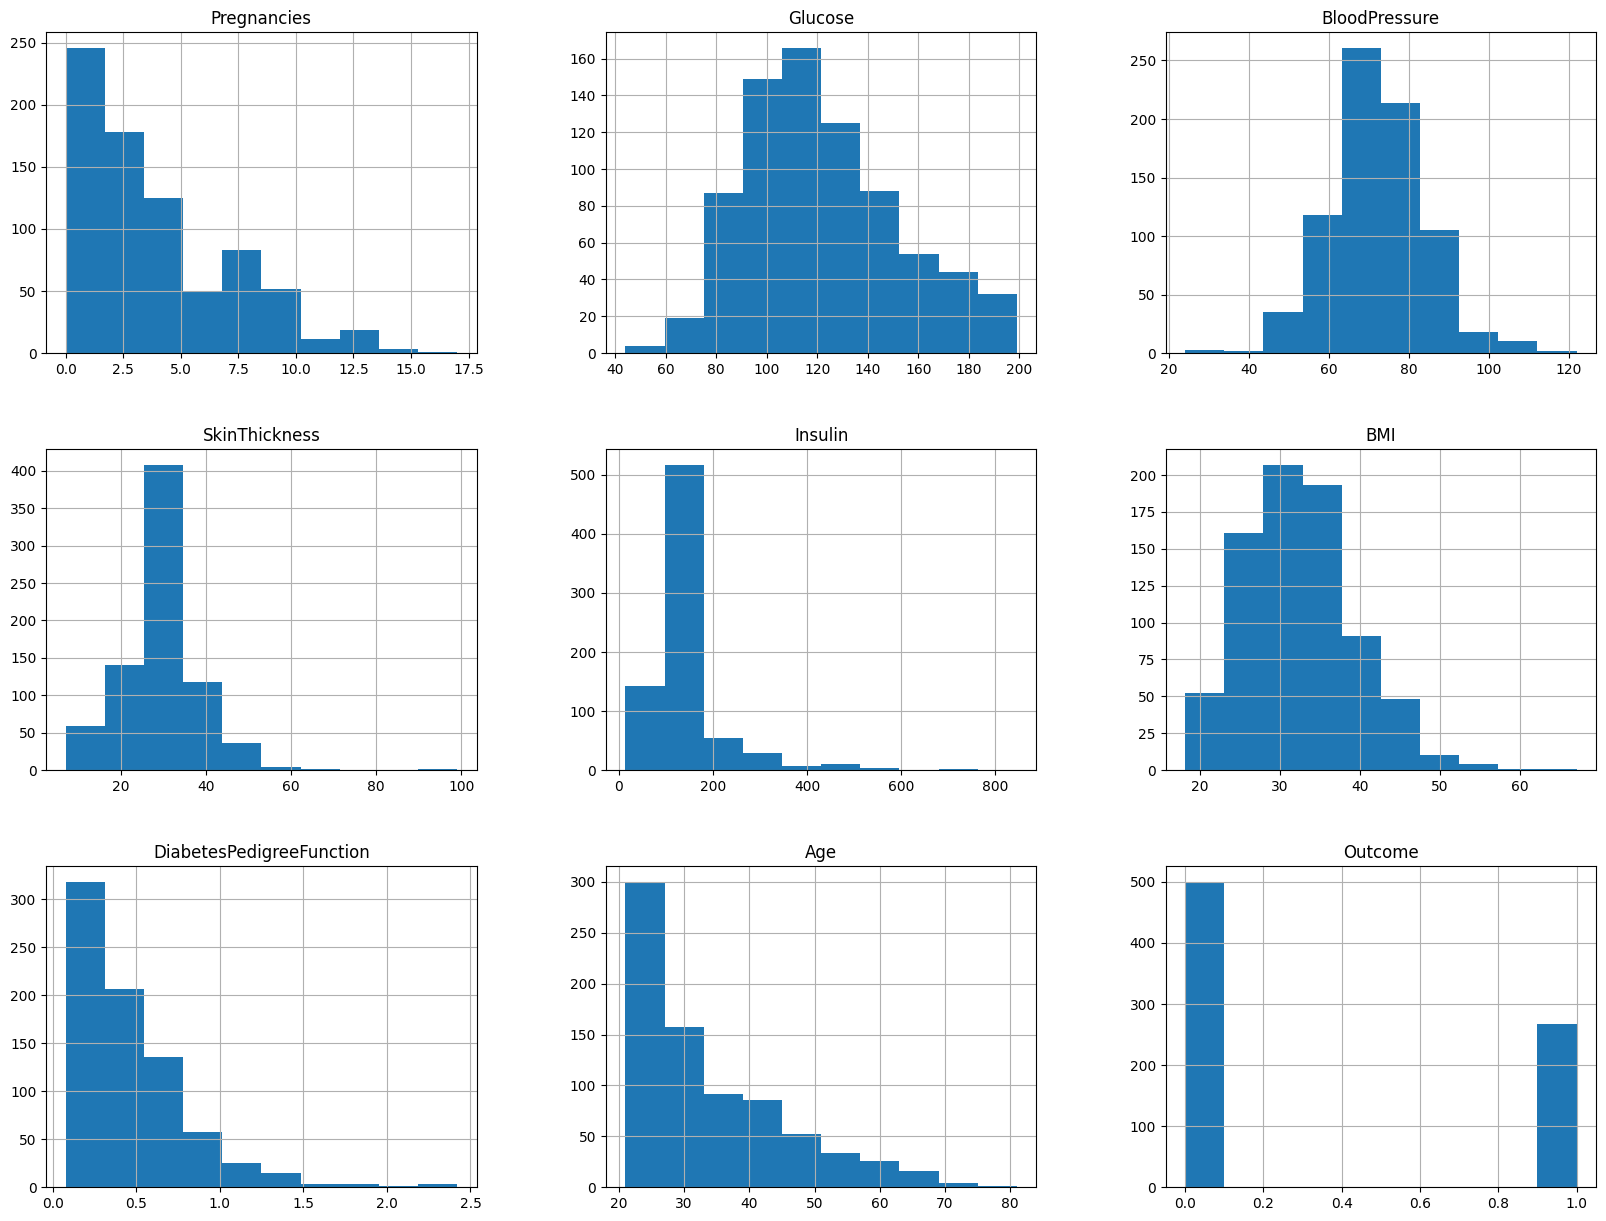

In [69]:
# Displays all the numerical datatypes in the dataset (Cleaned dataset)
plt.figure(dpi = 120)
PIDD_median.hist(figsize = (20, 15))
plt.show()

<Axes: >

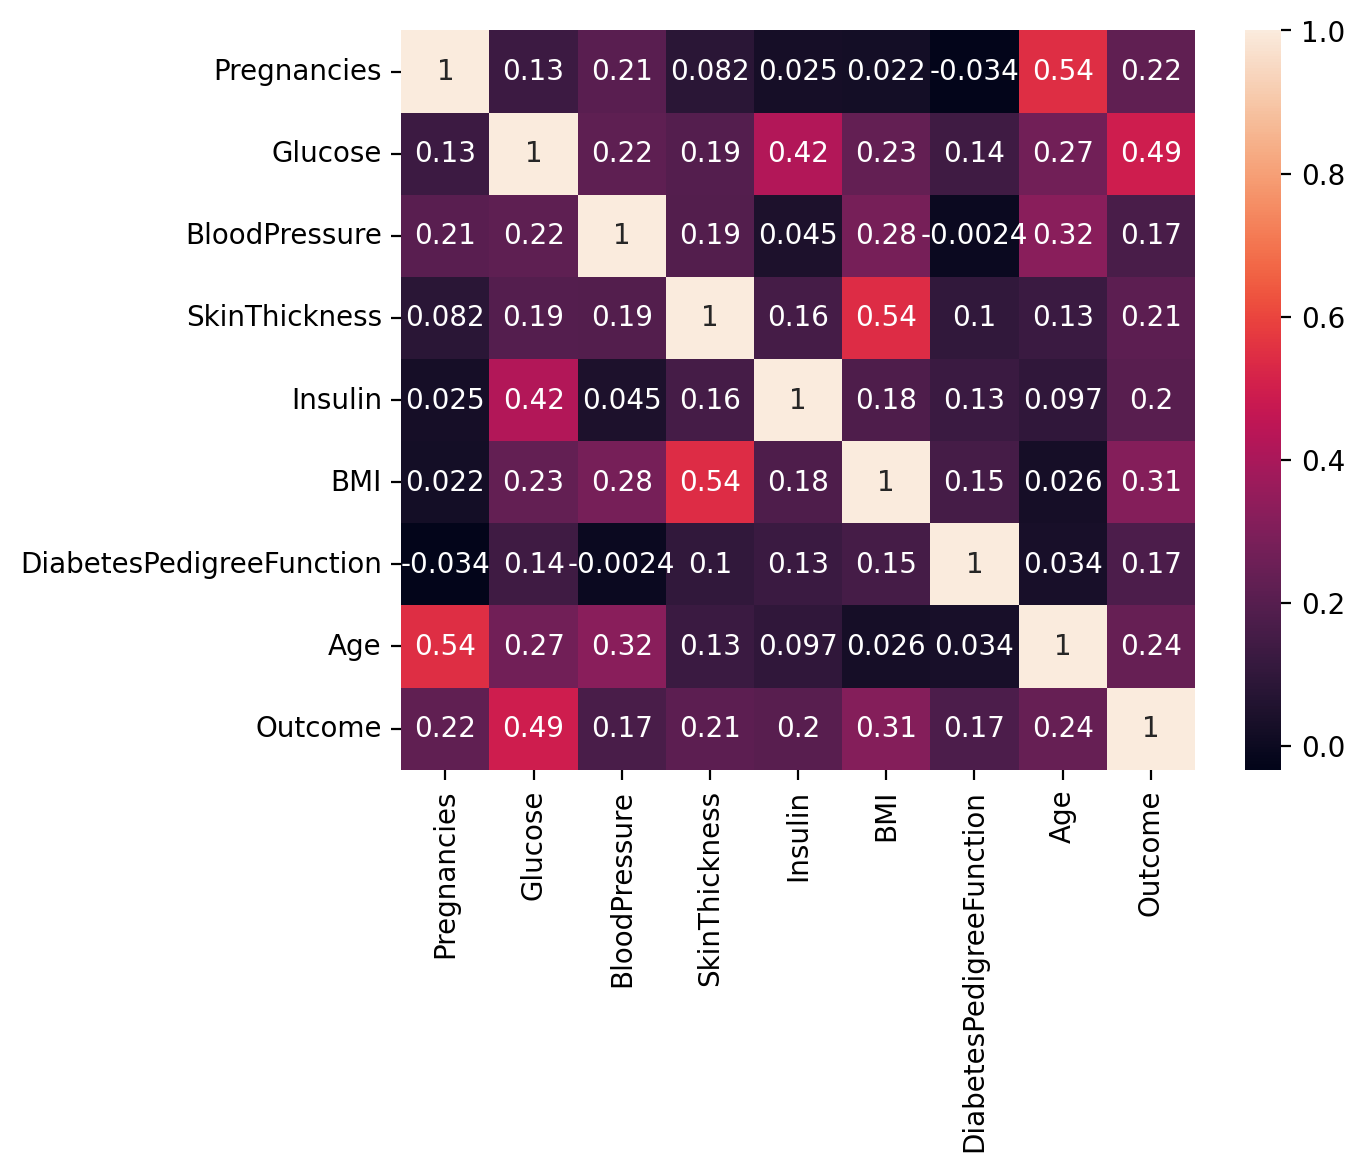

In [70]:
# heatmap of the PID (Raw) dataset
plt.figure(dpi=200)
sns.heatmap(PIDD_median.corr(), annot = True)

According to the provided heatmap, it is evident that Glucose exhibits a moderately positive correlation of 0.49 with the target variable 'Outcome,' when compared to the other variables. Additionally, noteworthy correlations include Skin Thickness and BMI, which have a moderate correlation of 0.55, and Age and Pregnancies with a moderate correlation of 0.54.

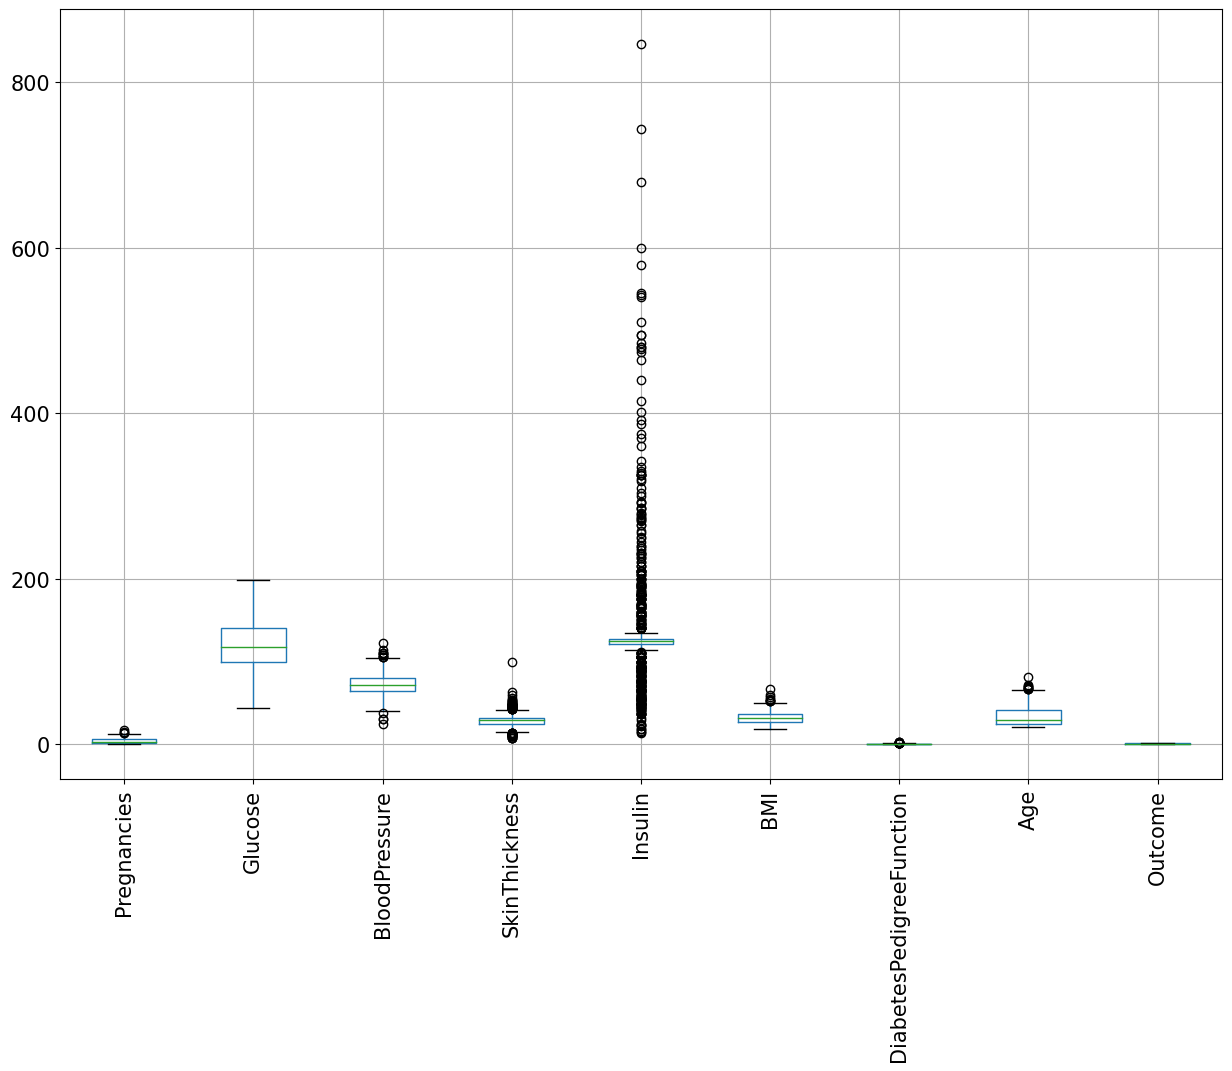

In [71]:
# display a boxplot (raw dataset)
PIDD_median.boxplot(figsize = (15,10), fontsize = 15, rot = 90)
plt.show() # shows the plot of all numerical variables 

The boxplot shows that some of the variables exert dominance over the others hence the need for
scaling.

## Bivariate Data Visualization: All Features by Target 'Outcome'

In [72]:
# Group by 'Outcome' and calculate the mode for each column
result = PIDD_median.groupby('Outcome').apply(lambda x: x.mode().iloc[0])
result

0        Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Outcome                                                                      
0                1.0     99.0           72.0           29.0    125.0  32.3   
1                0.0    125.0           72.0           29.0    125.0  32.9   

0        DiabetesPedigreeFunction   Age  Outcome  
Outcome                                           
0                           0.207  22.0      0.0  
1                           0.254  25.0      1.0

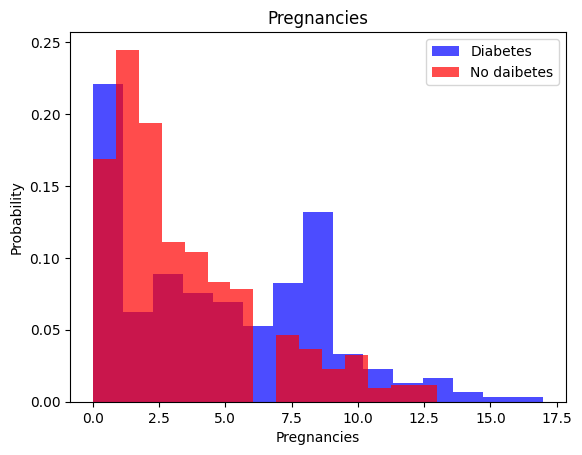

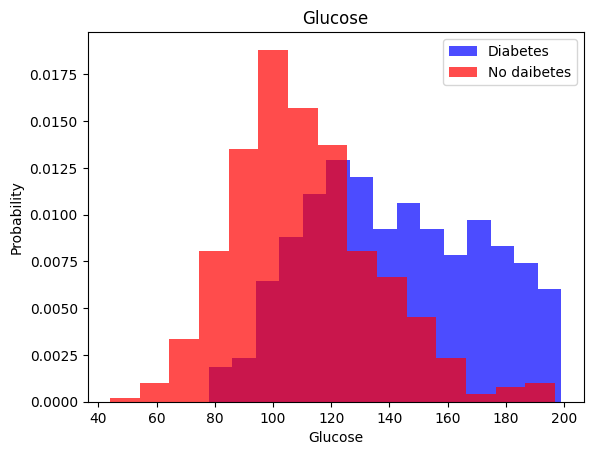

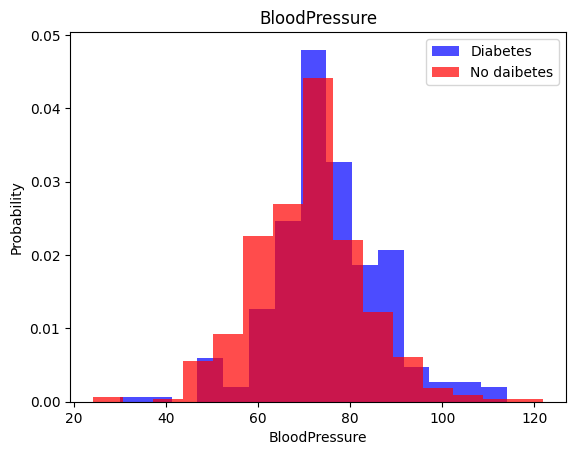

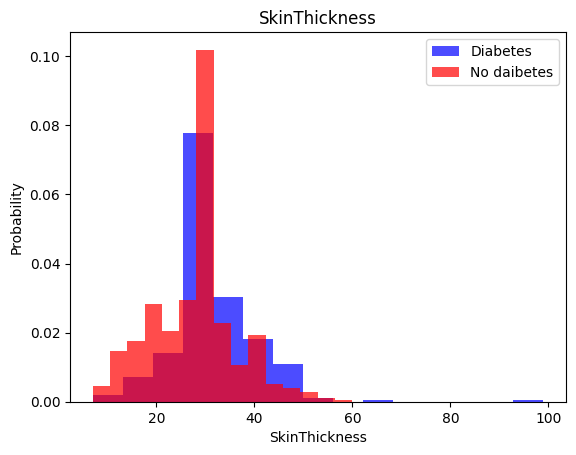

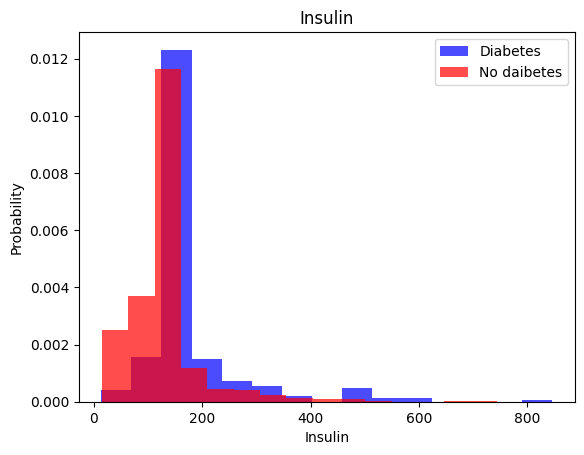

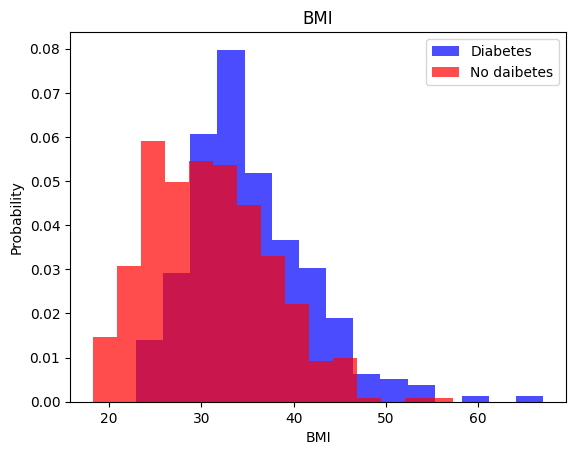

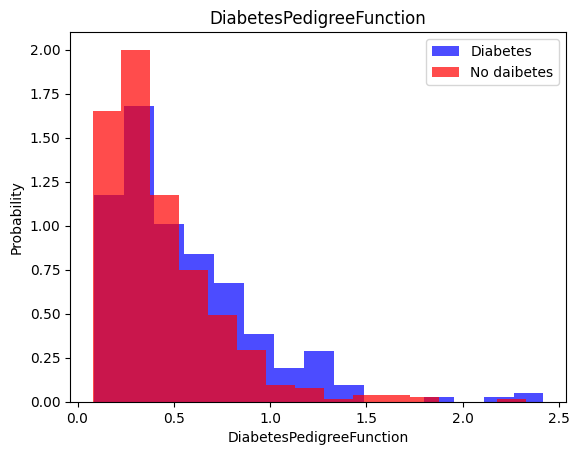

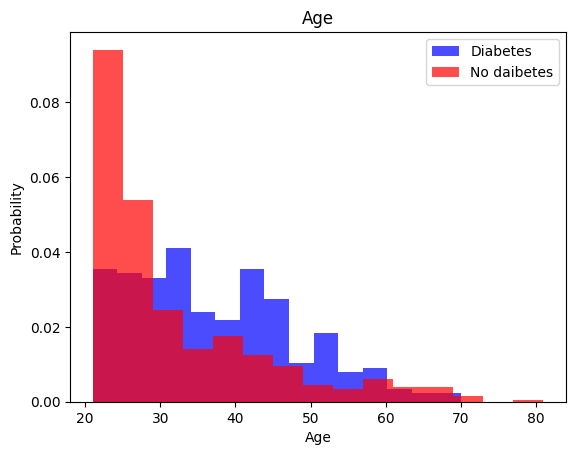

In [73]:
for i in range(len(PIDD_median.columns[:-1])):
    label = PIDD_median.columns[i]
    plt.hist(PIDD_median[PIDD_median["Outcome"]==1][label], color="blue", label="Diabetes", alpha=0.7, density=True, bins=15)
    plt.hist(PIDD_median[PIDD_median["Outcome"]==0][label], color="red", label="No daibetes", alpha=0.7, density=True, bins=15)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

Analysis of the PID dataset, preprocessed with median imputation, reveals distinct patterns between diabetic and non-diabetic patients:
    

- Pregnancies: Most diabetic patients have not had pregnancies, while non-diabetic patients predominantly show a history of only one pregnancy.

- Glucose Level: Diabetic patients commonly exhibit a glucose level around 125, in contrast to non-diabetic patients who often have a glucose level around 99.

- Blood Pressure: The majority of diabetic patients have a blood pressure of 72, while non-diabetic patients also tend to have a blood pressure of 72.

- Skin Thickness: Diabetic patients typically present a skin thickness of 29, similar to non-diabetic patients.

- Insulin Level: Most diabetic patients have an insulin level of 125, similar to non-diabetic patients.

- BMI (Body Mass Index): Diabetic patients commonly have a BMI of 32.9, whereas non-diabetic patients often have a BMI of 32.3.

- Diabetes Pedigree Function: Diabetic patients typically show a diabetes pedigree function of 0.254, while non-diabetic patients often have a value around 0.207.

- Age: The majority of diabetic patients are around 25 years old, while non-diabetic patients are often around 22 years old.


## Developing Traditional Machine Learning Classifiers on the PID Dataset: Preprocessed with Median Imputation, Excluding Feature Engineering such as Feature Selection using Random Forest Feature Importance and Extraction by Linear Discriminant Analysis.

Here we shall build the traditional machine learning classifiers, such as LR, SVM, RF, extreme gradient boosting (XGBoost), adaptive boosting (AdaBoost)

## Data Splitting (Train-Test-Split)

We will divide the dataset into training and testing sets using a 80:20 ratio.

In [74]:
# Split data into input and output variables

# The independent variables (part of the dataset to be used for prediction)
X = PIDD_median.drop(['Outcome'], axis=1)  

# Value to be predicted (target variable)
y = PIDD_median['Outcome'] 

In [75]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0, shuffle = True)

# Here we split the training and testing set in ratio 80:20

In [76]:
# View the independent variables
X_train

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
22             7    196.0           90.0           29.0    125.0  39.8   
497            2     81.0           72.0           15.0     76.0  30.1   
395            2    127.0           58.0           24.0    275.0  27.7   
381            0    105.0           68.0           22.0    125.0  20.0   
258            1    193.0           50.0           16.0    375.0  25.9   
..           ...      ...            ...            ...      ...   ...   
456            1    135.0           54.0           29.0    125.0  26.7   
435            0    141.0           72.0           29.0    125.0  42.4   
398            3     82.0           70.0           29.0    125.0  21.1   
48             7    103.0           66.0           32.0    125.0  39.1   
294            0    161.0           50.0           29.0    125.0  21.9   

     DiabetesPedigreeFunction  Age  
22                      0.451   41  
497                     0.547   25  
395                     1.600   25  
381                     0.236   22  
258                     0.655   24  
..                        ...  ...  
456                     0.687   62  
435                     0.205   29  
398                     0.389   25  
48                      0.344   31  
294                     0.254   65  

[614 rows x 8 columns]

In [77]:
# view counts of dependent variable 'target'
y_train.value_counts()

0    400
1    214
Name: Outcome, dtype: int64

Based on the provided information, there are 400 instances in the '0' class, representing 'Non-diabetic patients,' and 214 instances in the '1' class, representing 'Diabetic patients.'

## Data Standardization

In [78]:
# Here we standardize the dataset using StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train a Logistic Regression Classifier

In [79]:
# Create a Logistic Regression Classifier for predicting PIDD 
PIDD_lr_classifier = LogisticRegression()

In [80]:
# Fit the Logistic Regression Classifier on the training data
PIDD_lr_classifier.fit(X_train_scaled, y_train)

LogisticRegression()

### Make Predictions

In [81]:
# Perform predictions using the Logistic Regression Classifier on the training data
PIDD_lr_pred = PIDD_lr_classifier.predict(X_train_scaled)

### Evaluate the model

In [82]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_train, PIDD_lr_pred)
precision = precision_score(y_train, PIDD_lr_pred)
recall = recall_score(y_train, PIDD_lr_pred)
f1 = f1_score(y_train, PIDD_lr_pred)

# Classification Report
classification_rep = classification_report(y_train, PIDD_lr_pred)

# ROC AUC Score 
roc_auc = roc_auc_score(y_train, PIDD_lr_pred)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7703583061889251
Precision: 0.7159763313609467
Recall: 0.5654205607476636
F1 Score: 0.6318537859007833
ROC AUC Score: 0.7227102803738317


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       400
           1       0.72      0.57      0.63       214

    accuracy                           0.77       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.77      0.76       614



According to the classification report, the logistic regression classifier achieved an accuracy of 0.77, precision of 0.72, recall of 0.57, F1-score of 0.63, and ROC AUC score of 0.72 on the training set.

Precision: 0.7159763313609467


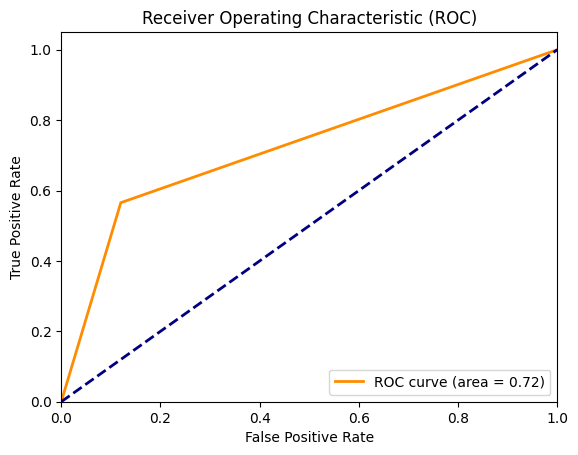

In [83]:
# Calculate precision
precision = precision_score(y_train, PIDD_lr_pred)
print("Precision:", precision)

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_train, PIDD_lr_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Based on the presented chart, the ROC curve exhibits an area under the curve (AUC) of 0.72 on the training set, indicating a moderate level of discriminative ability for the classification model in this case. In other words, the classifier demonstrates a moderate ability to distinguish between positive and negative instances.

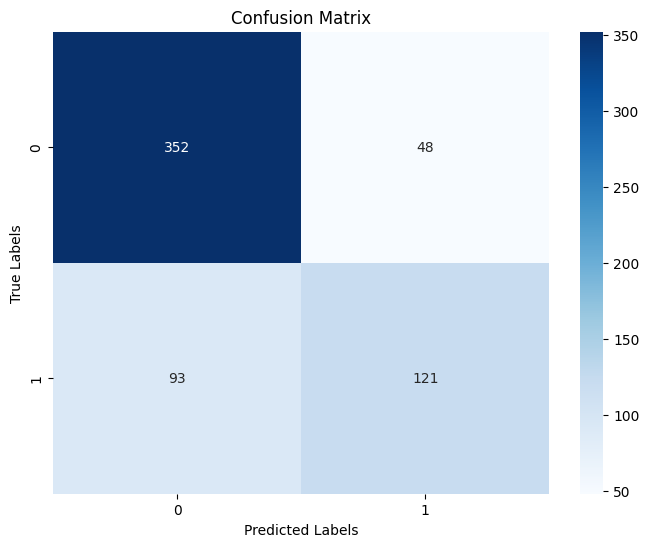

In [84]:
# Confusion Matrix
cm = confusion_matrix(y_train, PIDD_lr_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, the logistic regression classifier correctly classified 352 instances out of 400 for the '0' class and correctly classified 121 instances out of 214 for the '1' class on the training set.

### Make Predictions

In [85]:
# Perform predictions using the Logistic Regression Classifier on the testing data 
PIDD_lr_pred2 = PIDD_lr_classifier.predict(X_test_scaled)

### Evaluate the model

In [86]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, PIDD_lr_pred2)
precision = precision_score(y_test, PIDD_lr_pred2)
recall = recall_score(y_test, PIDD_lr_pred2)
f1 = f1_score(y_test, PIDD_lr_pred2)

# Classification Report
classification_rep = classification_report(y_test, PIDD_lr_pred2)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, PIDD_lr_pred2)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7727272727272727
Precision: 0.7435897435897436
Recall: 0.5370370370370371
F1 Score: 0.6236559139784946
ROC AUC Score: 0.7185185185185187


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       100
           1       0.74      0.54      0.62        54

    accuracy                           0.77       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



According to the classification report, the logistic regression model achieved an accuracy of 0.77, precision of 0.74, recall of 0.54, F1-score of 0.62, and ROC AUC score of 0.72 on the testing set.

Precision: 0.7435897435897436


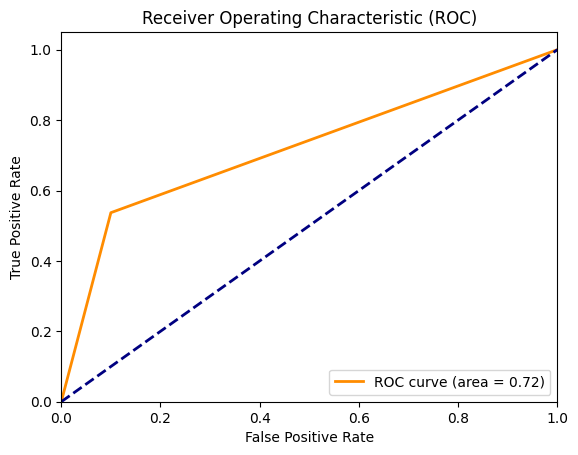

In [87]:
# Calculate precision
precision = precision_score(y_test, PIDD_lr_pred2)
print("Precision:", precision)

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, PIDD_lr_pred2)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Based on the presented chart, the ROC curve exhibits an area under the curve (AUC) of 0.72 on the testing set, indicating a moderate level of discriminative ability for the classification model in this case. In other words, the classifier demonstrates a moderate ability to distinguish between positive and negative instances.

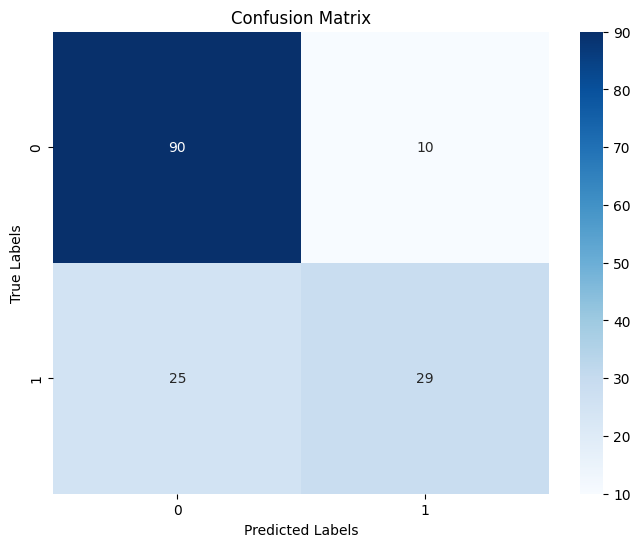

In [88]:
# Confusion Matrix
cm = confusion_matrix(y_test, PIDD_lr_pred2)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, the logistic regression classifier correctly classified 90 instances out of 100 for the '0' class and correctly classified 29 instances out of 54 for the '1' class on the testing set.

### Applying Syntethic Minority Over-Sampling Technique (SMOTE)

SMOTE, an acronym for Synthetic Minority Over-sampling Technique, is a machine learning technique designed to alleviate class imbalance, particularly in scenarios with imbalanced datasets. The primary goal of SMOTE is to rectify the imbalance observed in the '1' class denoting 'Diabetic patients,' which has notably fewer instances than the '0' class representing 'Non-diabetic patients.' Through the generation of synthetic instances for the minority class, SMOTE aims to rebalance these classes, thereby enhancing the model's capacity to learn effectively from both categories.

In [89]:
# Create an instance of the SMOTE class
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [90]:
# View the dimension of the resampled X_train
X_train_resampled.shape

(800, 8)

In [91]:
# View the dimension of the resampled y_train
y_train_resampled.shape

(800,)

In [92]:
# View the counts of unique values in the resampled target (y_train_resampled)
y_train_resampled.value_counts()

1    400
0    400
Name: Outcome, dtype: int64

In [93]:
# Standardize the features
scaler2 = StandardScaler()
X_train_scaled2 = scaler2.fit_transform(X_train_resampled)
X_test_scaled2 = scaler2.transform(X_test)

### Retrain the Logistic Regression Classifier

In [94]:
# Create and train the Logistic Regression model on the resampled data
PIDD_lr_classifier2 = LogisticRegression()
PIDD_lr_classifier2.fit(X_train_scaled2, y_train_resampled)

LogisticRegression()

### Make Predictions

In [95]:
# Perform predictions using the Logistic Regression Classifier on the resampled training data
PIDD_lr_pred3 = PIDD_lr_classifier2.predict(X_train_scaled2)

### Evaluate the model

In [96]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_train_resampled, PIDD_lr_pred3)
precision = precision_score(y_train_resampled, PIDD_lr_pred3)
recall = recall_score(y_train_resampled, PIDD_lr_pred3)
f1 = f1_score(y_train_resampled, PIDD_lr_pred3)

# Classification Report
classification_rep = classification_report(y_train_resampled, PIDD_lr_pred3)

# ROC AUC Score
roc_auc = roc_auc_score(y_train_resampled, PIDD_lr_pred3)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.74375
Precision: 0.7572559366754618
Recall: 0.7175
F1 Score: 0.7368421052631581
ROC AUC Score: 0.74375


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       400
           1       0.76      0.72      0.74       400

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.74      0.74      0.74       800



According to the classification report, post-application of SMOTE, the logistic regression classifier achieved an accuracy of 0.74, precision of 0.76, recall of 0.72, F1-score of 0.74, and ROC AUC score of 0.74 on the training data

Precision: 0.7572559366754618


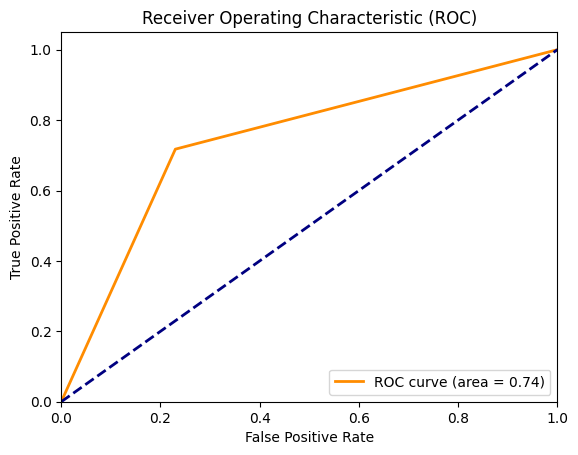

In [97]:
# Calculate precision
precision = precision_score(y_train_resampled, PIDD_lr_pred3)
print("Precision:", precision)

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_train_resampled, PIDD_lr_pred3)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Based on the presented chart, post-application of SMOTE, the ROC curve exhibits an area under the curve (AUC) of 0.74 on the training set, indicating a moderate level of discriminative ability for the classification model in this case. In other words, the classifier demonstrates a moderate ability to distinguish between positive and negative instances.

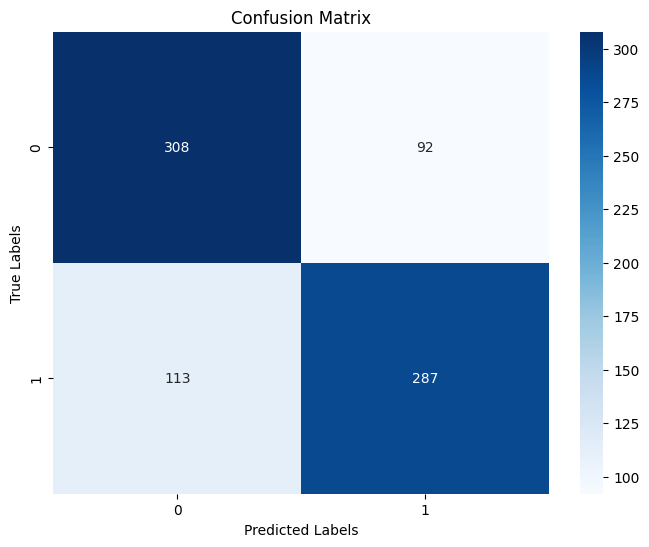

In [98]:
# Confusion Matrix
cm = confusion_matrix(y_train_resampled, PIDD_lr_pred3)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, post-application of SMOTE, the logistic regression classifier correctly classified 308 instances out of 400 for the '0' class and correctly classified 287 instances out of 400 for the '1' class on the training set.

### Make Predictions

In [99]:
# Perform predictions using the Logistic Regression Classifier on the test data
PIDD_lr_pred4 = PIDD_lr_classifier2.predict(X_test_scaled2)

### Evaluate the model

In [100]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, PIDD_lr_pred4)
precision = precision_score(y_test, PIDD_lr_pred4)
recall = recall_score(y_test, PIDD_lr_pred4)
f1 = f1_score(y_test, PIDD_lr_pred4)

# Classification Report
classification_rep = classification_report(y_test, PIDD_lr_pred4)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, PIDD_lr_pred4)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7922077922077922
Precision: 0.671875
Recall: 0.7962962962962963
F1 Score: 0.728813559322034
ROC AUC Score: 0.7931481481481482


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       100
           1       0.67      0.80      0.73        54

    accuracy                           0.79       154
   macro avg       0.77      0.79      0.78       154
weighted avg       0.81      0.79      0.80       154



According to the classification report, post-application of SMOTE, the logistic regression classifier achieved an accuracy of 0.79, precision of 0.67, recall of 0.80, F1-score of 0.73, and ROC AUC score of 0.79 on the testing set. 

Precision: 0.671875


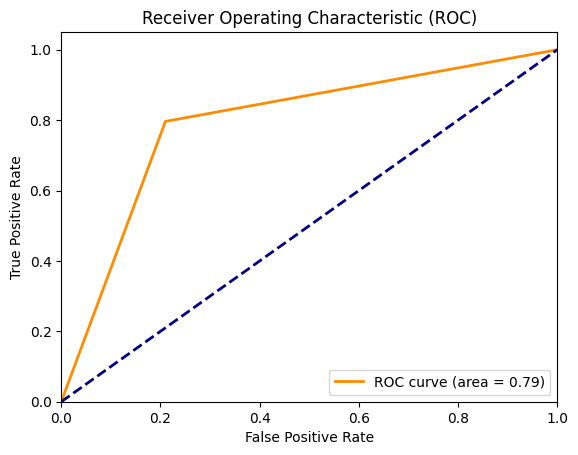

In [101]:
# Calculate precision
precision = precision_score(y_test, PIDD_lr_pred4)
print("Precision:", precision)

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, PIDD_lr_pred4)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Based on the presented chart, post-application of SMOTE, the ROC curve exhibits an area under the curve (AUC) of 0.79 on the testing set, indicating a good level of discriminative ability for the classification model in this case. In other words, the classifier demonstrates a good ability to distinguish between positive and negative instances.

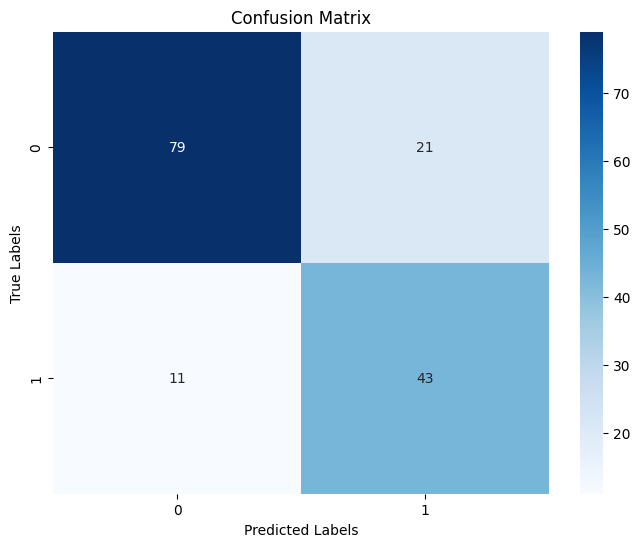

In [102]:
# Confusion Matrix
cm = confusion_matrix(y_test, PIDD_lr_pred4)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, post-application of SMOTE, the logistic regression classifier correctly classified 79 instances out of 100 for the '0' class and correctly classified 43 instances out of 54 for the '1' class on the testing set.

## Training and Predictions with a Support Vector Machine Classifier

In [103]:
# Create an SVM model
PIDD_svm_classifier = SVC()

In [104]:
# Fit the model to the training data
PIDD_svm_classifier.fit(X_train_scaled2, y_train_resampled)

SVC()

### Make predictions

In [105]:
# Perform predictions using the SVM Classifier on the testing data
PIDD_svc_pred = PIDD_svm_classifier.predict(X_test_scaled2)

### Evaluate the model

In [106]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, PIDD_svc_pred)
precision = precision_score(y_test, PIDD_svc_pred)
recall = recall_score(y_test, PIDD_svc_pred)
f1 = f1_score(y_test, PIDD_svc_pred)

# Classification Report
classification_rep = classification_report(y_test, PIDD_svc_pred)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, PIDD_svc_pred)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7987012987012987
Precision: 0.6949152542372882
Recall: 0.7592592592592593
F1 Score: 0.7256637168141593
ROC AUC Score: 0.7896296296296297


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       100
           1       0.69      0.76      0.73        54

    accuracy                           0.80       154
   macro avg       0.78      0.79      0.78       154
weighted avg       0.80      0.80      0.80       154



According to the classification report, post-application of SMOTE, the Support Vector Machine classifier achieved an accuracy of 0.80, precision of 0.69, recall of 0.76, F1-score of 0.73, and ROC AUC score of 0.79 on the testing set. 

Precision: 0.6949152542372882


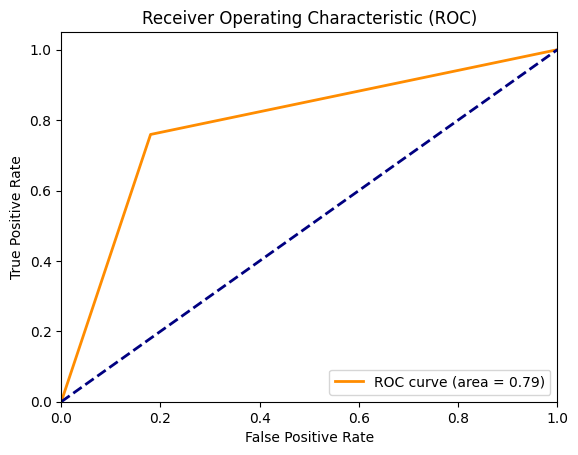

In [107]:
# Calculate precision
precision = precision_score(y_test, PIDD_svc_pred)
print("Precision:", precision)

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, PIDD_svc_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Based on the presented chart, post-application of SMOTE, the ROC curve exhibits an area under the curve (AUC) of 0.79 on the testing set, indicating a good level of discriminative ability for the classification model in this case. In other words, the classifier demonstrates a good ability to distinguish between positive and negative instances.

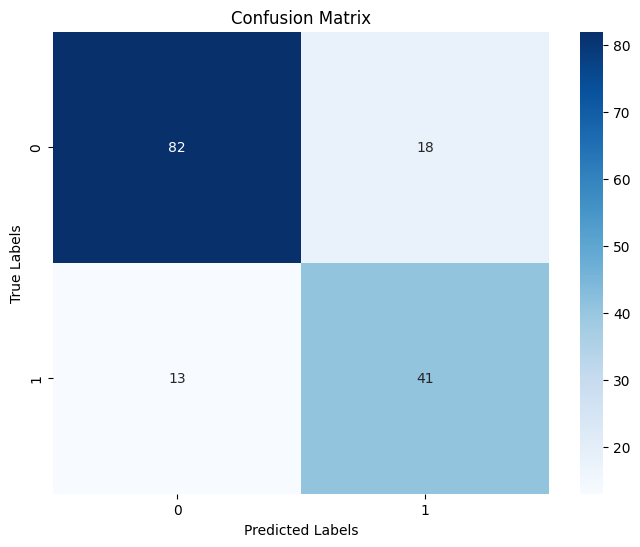

In [108]:
# Confusion Matrix
cm = confusion_matrix(y_test, PIDD_svc_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, post-application of SMOTE, the Support Vector Machine classifier correctly classified 82 instances out of 100 for the '0' class and correctly classified 41 instances out of 54 for the '1' class on the testing set.

## Training and Predictions with a Random Forest Classifier

In [109]:
# Create an RF model
PIDD_rf_classifier = RandomForestClassifier()

In [110]:
# Fit the model to the resampled training data
PIDD_rf_classifier.fit(X_train_scaled2, y_train_resampled)

RandomForestClassifier()

### Make predictions

In [111]:
# Perform predictions using the RF Classifier on the test data
PIDD_rf_pred = PIDD_rf_classifier.predict(X_test_scaled2)

### Evaluate the model

In [112]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, PIDD_rf_pred)
precision = precision_score(y_test, PIDD_rf_pred)
recall = recall_score(y_test, PIDD_rf_pred)
f1 = f1_score(y_test, PIDD_rf_pred)

# Classification Report
classification_rep = classification_report(y_test, PIDD_rf_pred)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, PIDD_rf_pred)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8051948051948052
Precision: 0.74
Recall: 0.6851851851851852
F1 Score: 0.7115384615384615
ROC AUC Score: 0.7775925925925926


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       100
           1       0.74      0.69      0.71        54

    accuracy                           0.81       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.80      0.81      0.80       154



According to the classification report, post-application of SMOTE, the Random Forest classifier achieved an accuracy of 0.77, precision of 0.67, recall of 0.65, F1-score of 0.66, and ROC AUC score of 0.74 on the testing set. 

Precision: 0.74


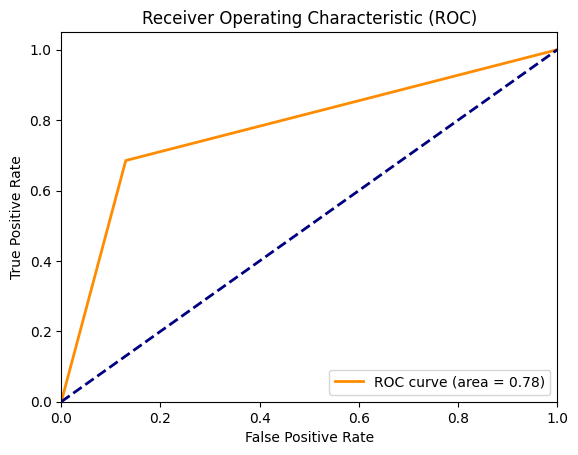

In [113]:
# Calculate precision
precision = precision_score(y_test, PIDD_rf_pred)
print("Precision:", precision)

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, PIDD_rf_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Based on the presented chart, post-application of SMOTE, the ROC curve exhibits an area under the curve (AUC) of 0.74 on the testing set, indicating a moderate level of discriminative ability for the classification model in this case. In other words, the classifier demonstrates a moderate ability to distinguish between positive and negative instances.

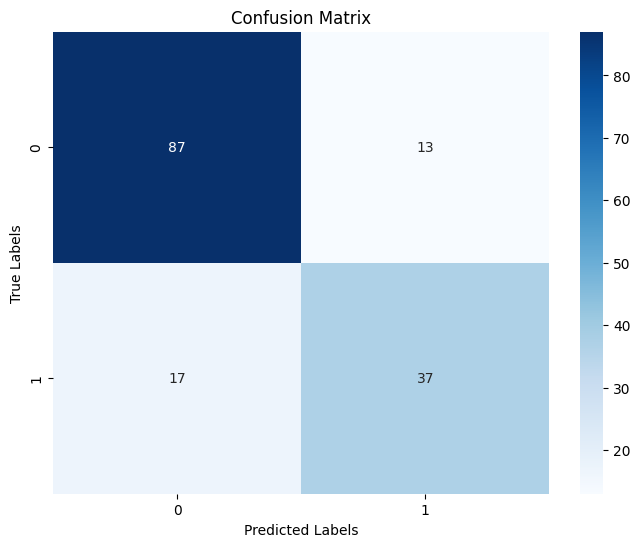

In [114]:
# Confusion Matrix
cm = confusion_matrix(y_test, PIDD_rf_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, post-application of SMOTE, the Random Forest model correctly classified 83 instances out of 100 for the '0' class and correctly classified 35 instances out of 54 for the '1' class on the testing set.

## Training and Predictions with an XGBoost Classifier

In [115]:
# Create an XGBoost model
PIDD_xgboost_classifier = XGBClassifier()

In [116]:
# Fit the model to the resampled training data
PIDD_xgboost_classifier.fit(X_train_scaled2, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Make predictions

In [117]:
# Perform predictions using the XGBoost Classifier on the test data
PIDD_xgboost_pred = PIDD_xgboost_classifier.predict(X_test_scaled2)

### Evaluate the model

In [118]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, PIDD_xgboost_pred)
precision = precision_score(y_test, PIDD_xgboost_pred)
recall = recall_score(y_test, PIDD_xgboost_pred)
f1 = f1_score(y_test, PIDD_xgboost_pred)

# Classification Report
classification_rep = classification_report(y_test, PIDD_xgboost_pred)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, PIDD_xgboost_pred)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7922077922077922
Precision: 0.6896551724137931
Recall: 0.7407407407407407
F1 Score: 0.7142857142857143
ROC AUC Score: 0.7803703703703704


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       100
           1       0.69      0.74      0.71        54

    accuracy                           0.79       154
   macro avg       0.77      0.78      0.78       154
weighted avg       0.80      0.79      0.79       154



According to the classification report, post-application of SMOTE, the XGBoost classifier achieved an accuracy of 0.79, precision of 0.69, recall of 0.74, F1-score of 0.71, and ROC AUC score of 0.78 on the testing set. 

Precision: 0.6896551724137931


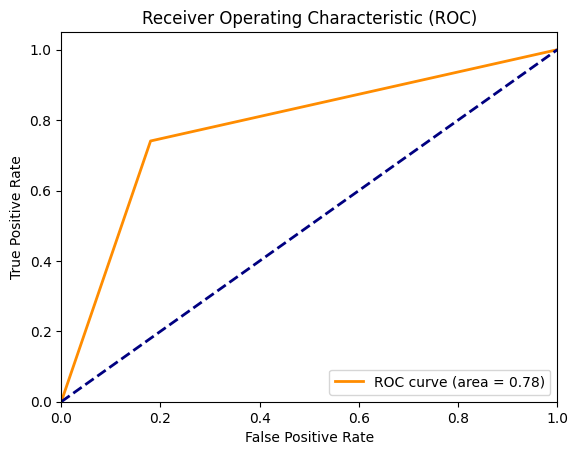

In [119]:
# Calculate precision
precision = precision_score(y_test, PIDD_xgboost_pred)
print("Precision:", precision)

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, PIDD_xgboost_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Based on the presented chart, post-application of SMOTE, the ROC curve exhibits an area under the curve (AUC) of 0.78 on the testing set, indicating a good level of discriminative ability for the classification model in this case. In other words, the classifier demonstrates a good ability to distinguish between positive and negative instances.

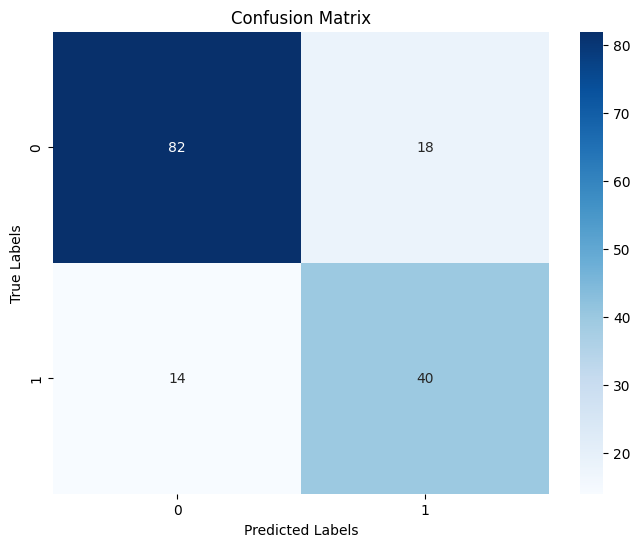

In [120]:
# Confusion Matrix
cm = confusion_matrix(y_test, PIDD_xgboost_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, post-application of SMOTE, the XGBoost model correctly classified 82 instances out of 100 for the '0' class and correctly classified 40 instances out of 54 for the '1' class on the testing set.

## Training and Predictions with an AdaBoost Classifier

In [121]:
# Create an AdaBoost model
PIDD_adaboost_classifier = AdaBoostClassifier()

In [122]:
# Fit the model to the resampled training data
PIDD_adaboost_classifier.fit(X_train_scaled2, y_train_resampled)

AdaBoostClassifier()

### Make predictions

In [123]:
# Perform predictions using the AdaBoost Classifier on the test data
PIDD_adaboost_pred = PIDD_adaboost_classifier.predict(X_test_scaled2)

### Evaluate the model

In [124]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, PIDD_adaboost_pred)
precision = precision_score(y_test, PIDD_adaboost_pred)
recall = recall_score(y_test, PIDD_adaboost_pred)
f1 = f1_score(y_test, PIDD_adaboost_pred)

# Classification Report
classification_rep = classification_report(y_test, PIDD_adaboost_pred)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, PIDD_adaboost_pred)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7597402597402597
Precision: 0.6491228070175439
Recall: 0.6851851851851852
F1 Score: 0.6666666666666666
ROC AUC Score: 0.7425925925925926


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       100
           1       0.65      0.69      0.67        54

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



According to the classification report, post-application of SMOTE, the AdaBoost classifier achieved an accuracy of 0.76, precision of 0.65, recall of 0.69, F1-score of 0.67, and ROC AUC score of 0.74 on the testing set. 

Precision: 0.6491228070175439


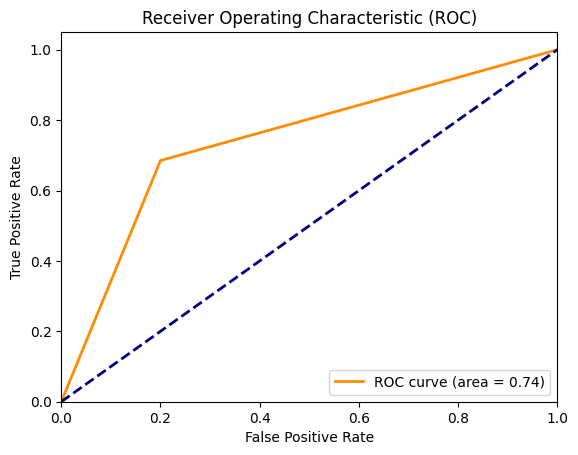

In [125]:
# Calculate precision
precision = precision_score(y_test, PIDD_adaboost_pred)
print("Precision:", precision)

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, PIDD_adaboost_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Based on the presented chart, post-application of SMOTE, the ROC curve exhibits an area under the curve (AUC) of 0.74 on the testing set, indicating a moderate level of discriminative ability for the classification model in this case. In other words, the classifier demonstrates a moderate ability to distinguish between positive and negative instances.

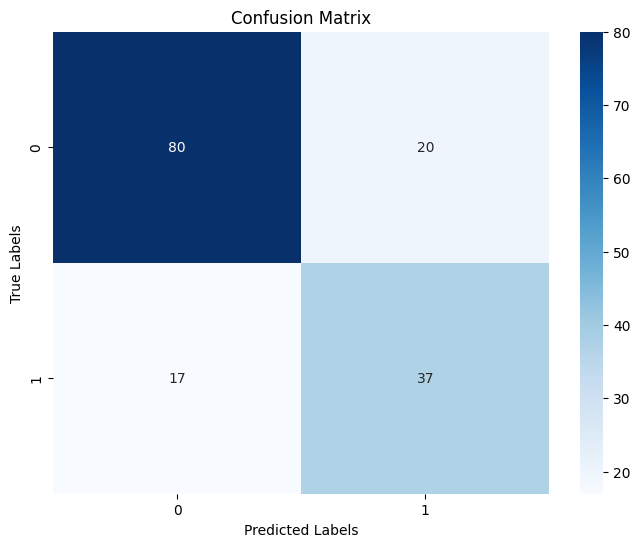

In [126]:
# Confusion Matrix
cm = confusion_matrix(y_test, PIDD_adaboost_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, post-application of SMOTE, the AdaBoost classifier correctly classified 80 instances out of 100 for the '0' class and correctly classified 37 instances out of 54 for the '1' class on the testing set.

## Developing Traditional Machine Learning Classifiers on the PID Dataset, Preprocessed by Median Imputation, with the Use of Feature Selection, Specifically Random Forest Feature Importance, and Feature Extraction, Such as Linear Discriminant Analysis.

## Feature Selection: Random Forest Feature Importance 

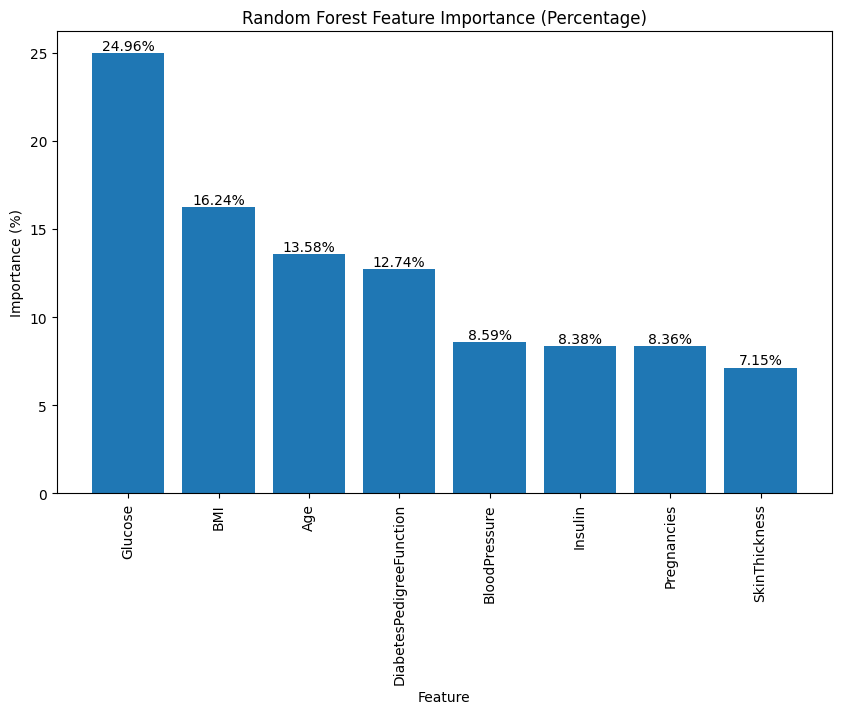

In [127]:
# Import necessary librarie# Initialize a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to your scaled dataset
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Convert feature importances to percentages
feature_importances_percentage = feature_importances * 100

# Sort indices based on feature importance
sorted_indices = feature_importances.argsort()[::-1]

# Check if X_train is a Pandas DataFrame
if isinstance(X_train, pd.DataFrame):
    # If X_train is a DataFrame, use the actual column names as feature names
    feature_names = X_train.columns
else:
    # If X_train is not a DataFrame (e.g., a NumPy array), create default feature names
    feature_names = ["Feature_" + str(i) for i in range(X_train.shape[1])]

# Plot feature importances as percentages with annotations
plt.figure(figsize=(10, 6))
bars = plt.bar(range(X_train_scaled.shape[1]), feature_importances_percentage[sorted_indices])
plt.xticks(range(X_train_scaled.shape[1]), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance (%)')
plt.title('Random Forest Feature Importance (Percentage)')

# Annotate each bar with its percentage
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.show()


According to the feature importance chart, Glucose is identified as the most influential factor in predicting the presence of diabetes among patients, contributing 24.96% to the predictive model. The other significant features and their respective contributions are BMI (16.24%), Age (13.58%), Diabetes Pedigree Function (12.74%), Blood Pressure (8.59%), Insulin (8.38%), Pregnancies (8.36%), and Skin Thickness (7.15%). This analysis highlights the importance of Glucose as the top predictor in the model.

## Feature Extraction: Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis (LDA) will be applied to the top four features, namely Glucose, BMI, Age, and Diabetes Pedigree Function. LDA serves to transform these selected features into a new space, maximizing class separability while preserving the original number of selected features.

In [128]:
# Get the top four feature indices
top_feature_indices = sorted_indices[:4]

# Select the top four features from the original dataset
X_train_top_features = X_train.iloc[:, top_feature_indices]

# Split data into training and testing sets
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_train_top_features, y_train, test_size = 0.2, stratify = y_train, random_state = 0, shuffle = True)

# Initialize and fit LDA using only the top four features
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_lda, y_train_lda)

# Transform the training and testing sets using LDA
X_train_lda_transformed = lda.transform(X_train_lda)
X_test_lda_transformed = lda.transform(X_test_lda)

## Train a Logistic Regression Classifier (with LDA)

In [129]:
# Create a Logistic Regression Classifier for predicting PIDD 
PIDD_lda_lr_classifier = LogisticRegression()

In [130]:
# Fit the Logistic Regression Classifier on the LDA-transformed training datasets
PIDD_lda_lr_classifier.fit(X_train_lda_transformed, y_train_lda)

LogisticRegression()

### Make Predictions

In [131]:
# Make predictions on the training set
PIDD_pred_lr_lda = PIDD_lda_lr_classifier.predict(X_train_lda_transformed)

### Evaluate the model

In [132]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_train_lda, PIDD_pred_lr_lda)
precision = precision_score(y_train_lda, PIDD_pred_lr_lda)
recall = recall_score(y_train_lda, PIDD_pred_lr_lda)
f1 = f1_score(y_train_lda, PIDD_pred_lr_lda)

# Classification Report
classification_rep = classification_report(y_train_lda, PIDD_pred_lr_lda)

# ROC AUC Score 
roc_auc = roc_auc_score(y_train_lda, PIDD_pred_lr_lda)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7759674134419552
Precision: 0.7194244604316546
Recall: 0.5847953216374269
F1 Score: 0.6451612903225806
ROC AUC Score: 0.7314601608187135


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       320
           1       0.72      0.58      0.65       171

    accuracy                           0.78       491
   macro avg       0.76      0.73      0.74       491
weighted avg       0.77      0.78      0.77       491



Based on the classification report, the Logistic Regression classifier, enhanced with Linear Discriminant Analysis (LDA), achieved an accuracy of 0.78, precision of 0.72, recall of 0.58, F1-score of 0.65, and ROC AUC score of 0.73 on the training set.

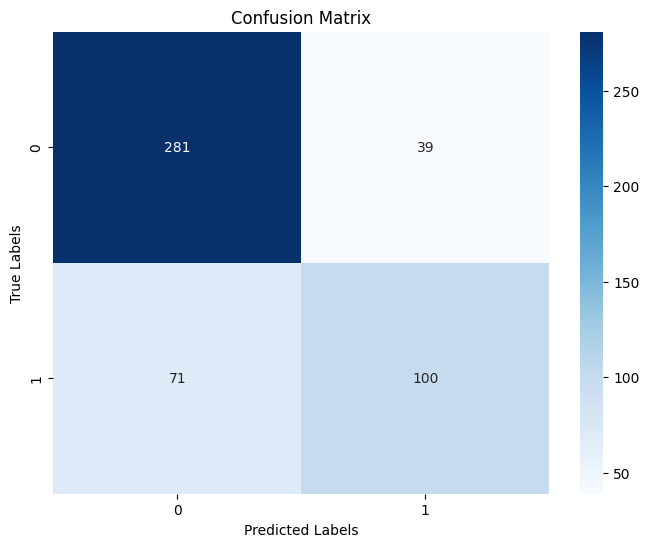

In [133]:
# Confusion Matrix
cm = confusion_matrix(y_train_lda, PIDD_pred_lr_lda)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, the Logistic Regression classifier, enhanced with LDA correctly classified 281 instances out of 320 for the '0' class and correctly classified 100 instances out of 171 for the '1' class on the training set.

### Make Predictions

In [134]:
# Make predictions on the testing set
PIDD_pred_lr_lda2 = PIDD_lda_lr_classifier.predict(X_test_lda_transformed)

### Evaluate the model

In [135]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test_lda, PIDD_pred_lr_lda2)
precision = precision_score(y_test_lda, PIDD_pred_lr_lda2)
recall = recall_score(y_test_lda, PIDD_pred_lr_lda2)
f1 = f1_score(y_test_lda, PIDD_pred_lr_lda2)

# Classification Report
classification_rep = classification_report(y_test_lda, PIDD_pred_lr_lda2)

# ROC AUC Score
roc_auc = roc_auc_score(y_test_lda, PIDD_pred_lr_lda2)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7154471544715447
Precision: 0.6333333333333333
Recall: 0.4418604651162791
F1 Score: 0.5205479452054794
ROC AUC Score: 0.6521802325581395


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.86      0.80        80
           1       0.63      0.44      0.52        43

    accuracy                           0.72       123
   macro avg       0.69      0.65      0.66       123
weighted avg       0.70      0.72      0.70       123



Based on the classification report, the Logistic Regression classifier, enhanced with Linear Discriminant Analysis (LDA), achieved an accuracy of 0.72, precision of 0.63, recall of 0.44, F1-score of 0.52, and ROC AUC score of 0.65 on the testing set.

Precision: 0.6333333333333333


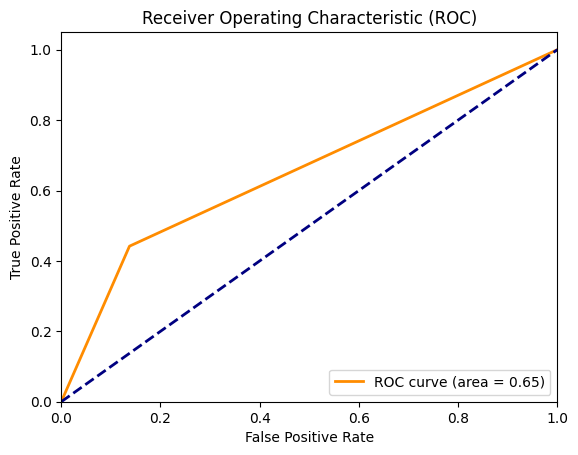

In [136]:
# Calculate precision
precision = precision_score(y_test_lda, PIDD_pred_lr_lda2)
print("Precision:", precision)

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test_lda, PIDD_pred_lr_lda2)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Based on the presented chart, the Logistic Regression classifier, enhanced with Linear Discriminant Analysis (LDA), exhibits an ROC curve with an area under the curve (AUC) of 0.65 on the testing set. In this case, with an AUC of 0.65, the discriminative ability is fair. It indicates that the classifier has some ability to distinguish between positive and negative instances on the testing set. 

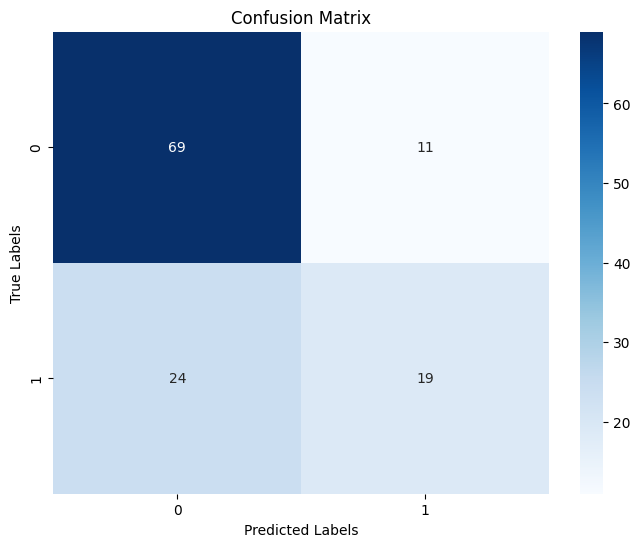

In [137]:
# Confusion Matrix
cm = confusion_matrix(y_test_lda, PIDD_pred_lr_lda2)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, the Logistic Regression classifier, enhanced with LDA correctly classified 69 instances out of 80 for the '0' class and correctly classified 19 instances out of 43 for the '1' class on the testing set.

### Applying SMOTE 

Here, we will apply SMOTE to balance the classes in the training set, which has been transformed using Linear Discriminant Analysis (LDA).

In [138]:
# Apply SMOTE to balance the classes in the LDA-transformed training set

# Create an instance of the SMOTE class
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to the original LDA-transformed training data
X_train_lda_resampled, y_train_lda_resampled = smote.fit_resample(X_train_lda_transformed, y_train_lda)

In [139]:
# View the dimension of X-train of lda-resampled training dataset
X_train_lda_resampled.shape

(640, 1)

In [140]:
# View the dimension of the y_train of the lda-resampled training dataset 'target'
y_train_lda_resampled.shape

(640,)

In [141]:
# View the counts of the balanced 'target' class
y_train_lda_resampled.value_counts()

0    320
1    320
Name: Outcome, dtype: int64

In [142]:
# Standardize the features

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the resampled data
X_train_lda_resampled_scaled = scaler.fit_transform(X_train_lda_resampled)
X_test_lda_scaled = scaler.transform(X_test_lda_transformed)

### Retrain the Logistic Regression Classifier

In [143]:
# Create an instance of Logistic Regression
PIDD_lda_lr_classifier2 = LogisticRegression()

# Retrain the Logistic Regression model on the resampled and scaled data
PIDD_lda_lr_classifier2.fit(X_train_lda_resampled_scaled, y_train_lda_resampled)

LogisticRegression()

### Make Predictions

In [144]:
# Make predictions on the training set
PIDD_pred_lr_lda3 = PIDD_lda_lr_classifier2.predict(X_train_lda_resampled_scaled)

### Evaluate the model

In [145]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_train_lda_resampled, PIDD_pred_lr_lda3)
precision = precision_score(y_train_lda_resampled, PIDD_pred_lr_lda3)
recall = recall_score(y_train_lda_resampled, PIDD_pred_lr_lda3)
f1 = f1_score(y_train_lda_resampled, PIDD_pred_lr_lda3)

# Classification Report
classification_rep = classification_report(y_train_lda_resampled, PIDD_pred_lr_lda3)

# ROC AUC Score
roc_auc = roc_auc_score(y_train_lda_resampled, PIDD_pred_lr_lda3)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7484375
Precision: 0.7556270096463023
Recall: 0.734375
F1 Score: 0.7448494453248812
ROC AUC Score: 0.7484374999999999


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       320
           1       0.76      0.73      0.74       320

    accuracy                           0.75       640
   macro avg       0.75      0.75      0.75       640
weighted avg       0.75      0.75      0.75       640



Based on the classification report, post-application of SMOTE, the Logistic Regression classifier, enhanced with Linear Discriminant Analysis (LDA), achieved an accuracy of 0.75, precision of 0.76, recall of 0.73, F1-score of 0.74, and ROC AUC score of 0.75 on the training set.

Precision: 0.7556270096463023


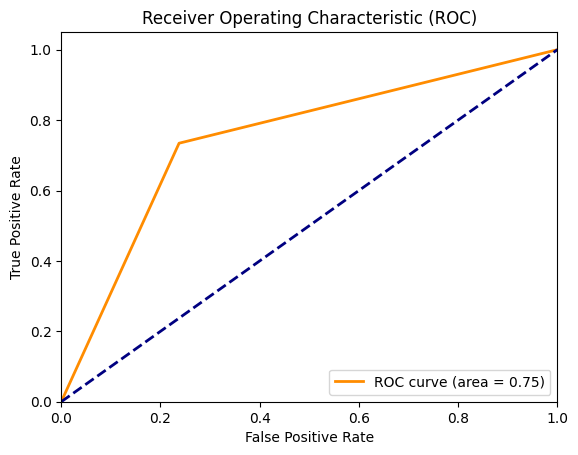

In [146]:
# Calculate precision
precision = precision_score(y_train_lda_resampled, PIDD_pred_lr_lda3)
print("Precision:", precision)

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_train_lda_resampled, PIDD_pred_lr_lda3)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Based on the presented chart, post-application of SMOTE, the Logistic Regression classifier, enhanced with Linear Discriminant Analysis (LDA), exhibits an ROC curve with an area under the curve (AUC) of 0.75 on the training set. In this case, with an AUC of 0.75, the discriminative ability is good. It indicates that the classifier has a solid ability to distinguish between positive and negative instances on the training set. 

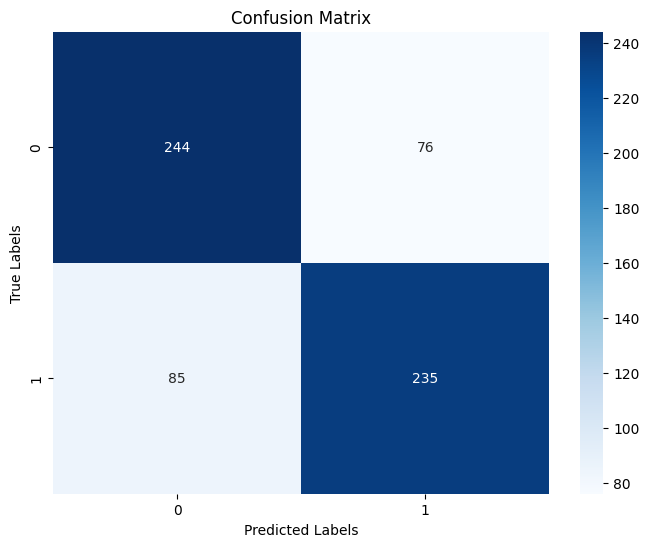

In [147]:
# Confusion Matrix
cm = confusion_matrix(y_train_lda_resampled, PIDD_pred_lr_lda3)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, post-application of SMOTE, the Logistic Regression classifier, enhanced with LDA correctly classified 244 instances out of 320 for the '0' class and correctly classified 235 instances out of 320 for the '1' class on the training set.

### Make Predictions

In [148]:
# Make predictions on the testing set
PIDD_pred_lr_lda4 = PIDD_lda_lr_classifier2.predict(X_test_lda_scaled)

### Evaluate the model

In [149]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test_lda, PIDD_pred_lr_lda4)
precision = precision_score(y_test_lda, PIDD_pred_lr_lda4)
recall = recall_score(y_test_lda, PIDD_pred_lr_lda4)
f1 = f1_score(y_test_lda, PIDD_pred_lr_lda4)

# Classification Report
classification_rep = classification_report(y_test_lda, PIDD_pred_lr_lda4)

# ROC AUC Score
roc_auc = roc_auc_score(y_test_lda, PIDD_pred_lr_lda4)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7235772357723578
Precision: 0.6097560975609756
Recall: 0.5813953488372093
F1 Score: 0.5952380952380952
ROC AUC Score: 0.6906976744186047


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        80
           1       0.61      0.58      0.60        43

    accuracy                           0.72       123
   macro avg       0.70      0.69      0.69       123
weighted avg       0.72      0.72      0.72       123



Based on the classification report, post-application of SMOTE, the Logistic Regression classifier, enhanced with Linear Discriminant Analysis (LDA), achieved an accuracy of 0.72, precision of 0.61, recall of 0.58, F1-score of 0.60, and ROC AUC score of 0.69 on the testing set.

Precision: 0.6097560975609756


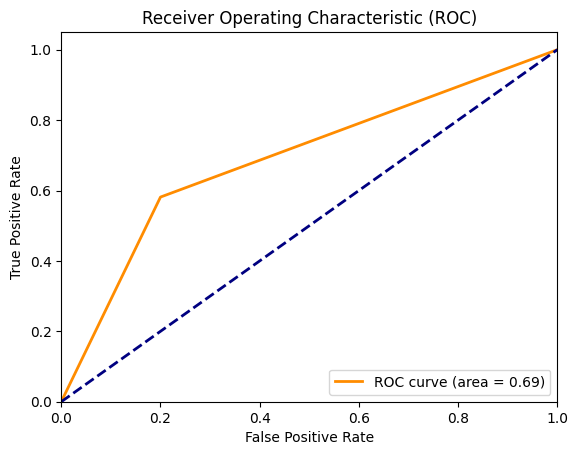

In [150]:
# Calculate precision
precision = precision_score(y_test_lda, PIDD_pred_lr_lda4)
print("Precision:", precision)

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test_lda, PIDD_pred_lr_lda4)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Based on the presented chart, post-application of SMOTE, the Logistic Regression classifier, enhanced with Linear Discriminant Analysis (LDA), exhibits an ROC curve with an area under the curve (AUC) of 0.69 on the testing set. In this case, with an AUC of 0.69, the discriminative ability is fair. It indicates that the classifier has some ability to distinguish between positive and negative instances on the testing set. 

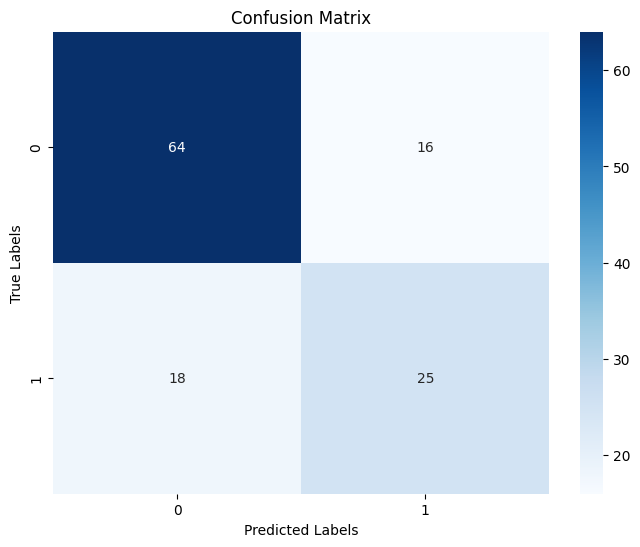

In [151]:
# Confusion Matrix
cm = confusion_matrix(y_test_lda, PIDD_pred_lr_lda4)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, post-application of SMOTE, the Logistic Regression classifier, enhanced with LDA correctly classified 64 instances out of 80 for the '0' class and correctly classified 25 instances out of 43 for the '1' class on the testing set.

## Training and Predictions with a Support Vector Machine Classifier

In [152]:
# Create an SVM model
PIDD_lda_svm_classifier = SVC()

In [153]:
# Fit the model to the resampled and scaled data
PIDD_lda_svm_classifier.fit(X_train_lda_resampled_scaled, y_train_lda_resampled)

SVC()

In [154]:
# Perform predictions using the SVM Classifier on the LDA-scaled testing data
PIDD_pred_svm_lda = PIDD_lda_svm_classifier.predict(X_test_lda_scaled)

### Evaluate the model

In [155]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test_lda, PIDD_pred_svm_lda)
precision = precision_score(y_test_lda, PIDD_pred_svm_lda)
recall = recall_score(y_test_lda, PIDD_pred_svm_lda)
f1 = f1_score(y_test_lda, PIDD_pred_svm_lda)

# Classification Report
classification_rep = classification_report(y_test_lda, PIDD_pred_svm_lda)

# ROC AUC Score
roc_auc = roc_auc_score(y_test_lda, PIDD_pred_svm_lda)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7398373983739838
Precision: 0.627906976744186
Recall: 0.627906976744186
F1 Score: 0.627906976744186
ROC AUC Score: 0.713953488372093


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        80
           1       0.63      0.63      0.63        43

    accuracy                           0.74       123
   macro avg       0.71      0.71      0.71       123
weighted avg       0.74      0.74      0.74       123



Based on the classification report, post-application of SMOTE, the Support Vector Machine classifier, enhanced with Linear Discriminant Analysis (LDA), achieved an accuracy of 0.74, precision of 0.63, recall of 0.63, F1-score of 0.63, and ROC AUC score of 0.71 on the testing set.

Precision: 0.627906976744186


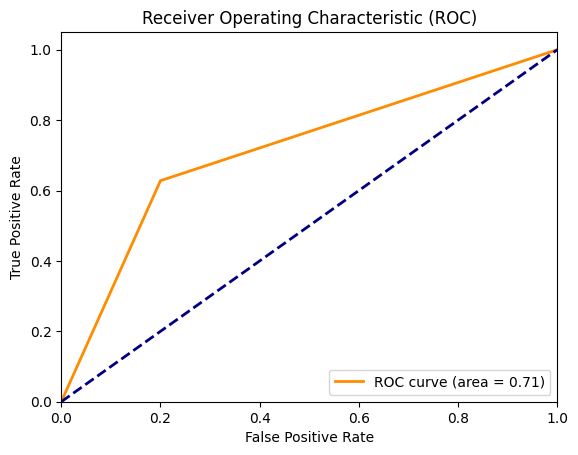

In [156]:
# Calculate precision
precision = precision_score(y_test_lda, PIDD_pred_svm_lda)
print("Precision:", precision)

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test_lda, PIDD_pred_svm_lda)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Based on the presented chart, post-application of SMOTE, the Support Vector Machine classifier, enhanced with Linear Discriminant Analysis (LDA), exhibits an ROC curve with an area under the curve (AUC) of 0.71 on the testing set. In this case, with an AUC of 0.71, an ROC AUC (Receiver Operating Characteristic Area Under the Curve) score of 0.71 indicates a fair to good level of discriminative ability for the classification model. It suggests that it has a reasonable ability to distinguish between positive and negative instances. 

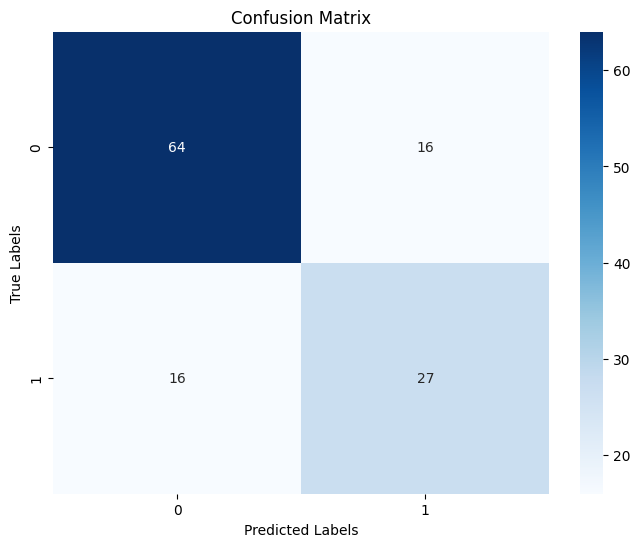

In [157]:
# Confusion Matrix
cm = confusion_matrix(y_test_lda, PIDD_pred_svm_lda)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, post-application of SMOTE, the Support Vector Machine classifier, enhanced with LDA correctly classified 64 instances out of 80 for the '0' class and correctly classified 27 instances out of 43 for the '1' class on the testing set.

## Training and Predictions with a Random Forest Classifier

In [158]:
# Create an RF model
PIDD_lda_rf_classifier = RandomForestClassifier()

In [159]:
# Fit the model to the resampled and scaled data
PIDD_lda_rf_classifier.fit(X_train_lda_resampled_scaled, y_train_lda_resampled)

RandomForestClassifier()

In [160]:
# Perform predictions using the RF Classifier on the LDA-scaled test data
PIDD_pred_rf_lda = PIDD_lda_rf_classifier.predict(X_test_lda_scaled)

### Evaluate the model

In [161]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test_lda, PIDD_pred_rf_lda)
precision = precision_score(y_test_lda, PIDD_pred_rf_lda)
recall = recall_score(y_test_lda, PIDD_pred_rf_lda)
f1 = f1_score(y_test_lda, PIDD_pred_rf_lda)

# Classification Report
classification_rep = classification_report(y_test_lda, PIDD_pred_rf_lda)

# ROC AUC Score
roc_auc = roc_auc_score(y_test_lda, PIDD_pred_rf_lda)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.6747967479674797
Precision: 0.5348837209302325
Recall: 0.5348837209302325
F1 Score: 0.5348837209302325
ROC AUC Score: 0.6424418604651163


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        80
           1       0.53      0.53      0.53        43

    accuracy                           0.67       123
   macro avg       0.64      0.64      0.64       123
weighted avg       0.67      0.67      0.67       123



Based on the classification report, post-application of SMOTE, the Random Forest classifier, enhanced with Linear Discriminant Analysis (LDA), achieved an accuracy of 0.67, precision of 0.53, recall of 0.53, F1-score of 0.53, and ROC AUC score of 0.64 on the testing set.

Precision: 0.5348837209302325


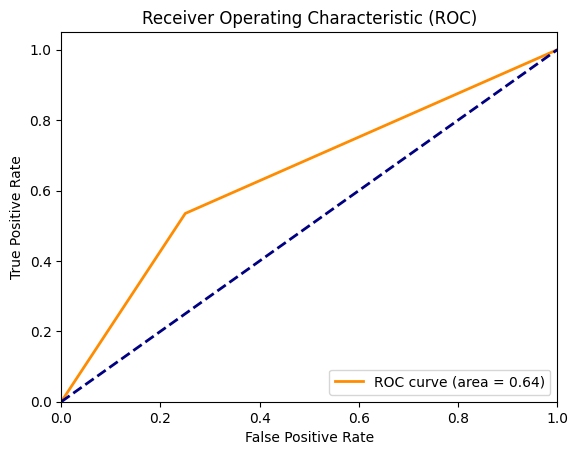

In [162]:
# Calculate precision
precision = precision_score(y_test_lda, PIDD_pred_rf_lda)
print("Precision:", precision)

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test_lda, PIDD_pred_rf_lda)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Based on the presented chart, post-application of SMOTE, the Random Forest classifier, enhanced with Linear Discriminant Analysis (LDA), exhibits an ROC curve with an area under the curve (AUC) of 0.64 on the testing set. In this case, with an AUC of 0.64, indicates a fair but modest level of discriminative ability for the classification model. It suggests that it has some ability to distinguish between positive and negative instances, but there may be room for improvement. 

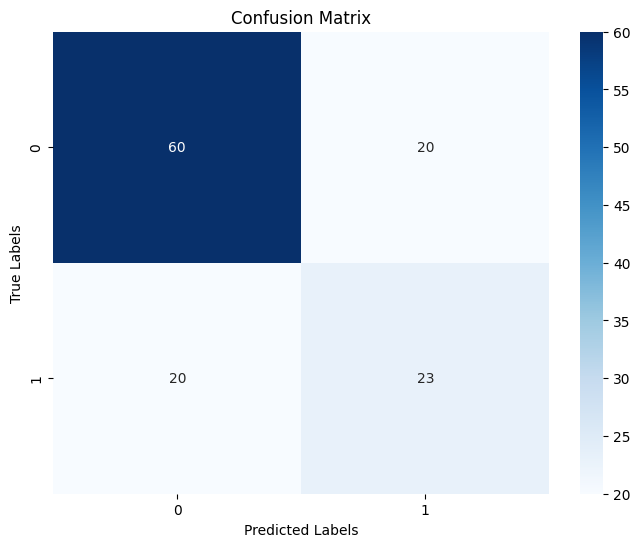

In [163]:
# Confusion Matrix
cm = confusion_matrix(y_test_lda, PIDD_pred_rf_lda)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, post-application of SMOTE, the Random Forest classifier, enhanced with LDA correctly classified 60 instances out of 80 for the '0' class and correctly classified 23 instances out of 43 for the '1' class on the testing set.

## Training and Predictions with an XGBoost Classifier

In [164]:
# Create an instance of the XGBClassifier
PIDD_lda_xgb_classifier = XGBClassifier()

In [165]:
# Fit the model to the resampled and scaled data
PIDD_lda_xgb_classifier.fit(X_train_lda_resampled_scaled, y_train_lda_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [166]:
# Perform predictions using the XGB Classifier on the LDA-scaled test data
PIDD_pred_xgb_lda = PIDD_lda_xgb_classifier.predict(X_test_lda_scaled)

### Evaluate the model

In [167]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test_lda, PIDD_pred_xgb_lda)
precision = precision_score(y_test_lda, PIDD_pred_xgb_lda)
recall = recall_score(y_test_lda, PIDD_pred_xgb_lda)
f1 = f1_score(y_test_lda, PIDD_pred_xgb_lda)

# Classification Report
classification_rep = classification_report(y_test_lda, PIDD_pred_xgb_lda)

# ROC AUC Score
roc_auc = roc_auc_score(y_test_lda, PIDD_pred_xgb_lda)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.6829268292682927
Precision: 0.54
Recall: 0.627906976744186
F1 Score: 0.5806451612903226
ROC AUC Score: 0.6702034883720931


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.71      0.75        80
           1       0.54      0.63      0.58        43

    accuracy                           0.68       123
   macro avg       0.66      0.67      0.66       123
weighted avg       0.70      0.68      0.69       123



Based on the classification report, post-application of SMOTE, the XGBoost classifier, enhanced with Linear Discriminant Analysis (LDA), achieved an accuracy of 0.68, precision of 0.54, recall of 0.63, F1-score of 0.58, and ROC AUC score of 0.67 on the testing set.

Precision: 0.54


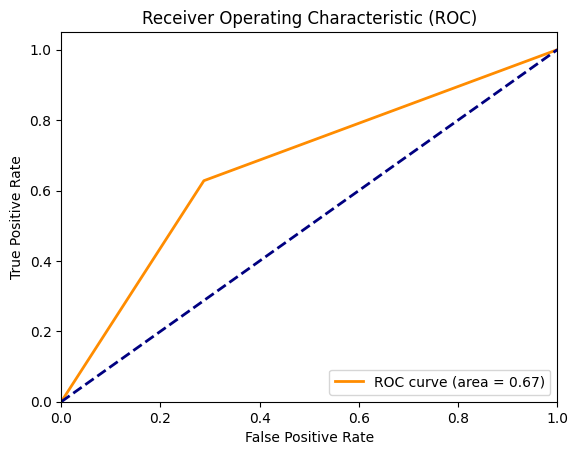

In [168]:
# Calculate precision
precision = precision_score(y_test_lda, PIDD_pred_xgb_lda)
print("Precision:", precision)

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test_lda, PIDD_pred_xgb_lda)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Based on the presented chart, post-application of SMOTE, the XGBoost classifier, enhanced with Linear Discriminant Analysis (LDA), exhibits an ROC curve with an area under the curve (AUC) of 0.67 on the testing set. In this case, with an AUC of 0.67, indicates a fair discriminative ability for the classification model. It suggests that it has some ability to distinguish between positive and negative instances. 

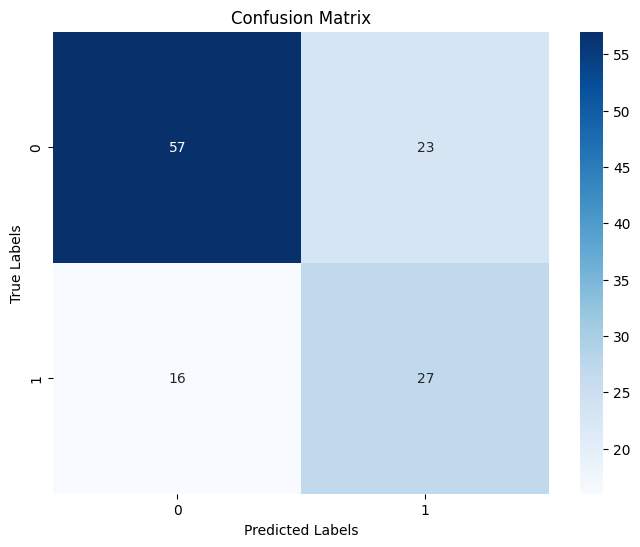

In [169]:
# Confusion Matrix
cm = confusion_matrix(y_test_lda, PIDD_pred_xgb_lda)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, post-application of SMOTE, the XGBoost classifier, enhanced with LDA correctly classified 57 instances out of 80 for the '0' class and correctly classified 27 instances out of 43 for the '1' class on the testing set.

## Training and Predictions with an AdaBoost Classifier

In [170]:
# Create an instance of the XGBClassifier
PIDD_lda_adaboost_classifier = AdaBoostClassifier()

In [171]:
# Fit the model to the resampled and scaled data
PIDD_lda_adaboost_classifier.fit(X_train_lda_resampled_scaled, y_train_lda_resampled)

AdaBoostClassifier()

In [172]:
# Perform predictions using the XGB Classifier on the LDA-scaled test data
PIDD_pred_adaboost_lda = PIDD_lda_adaboost_classifier.predict(X_test_lda_scaled)

### Evaluate the model

In [173]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test_lda, PIDD_pred_adaboost_lda)
precision = precision_score(y_test_lda, PIDD_pred_adaboost_lda)
recall = recall_score(y_test_lda, PIDD_pred_adaboost_lda)
f1 = f1_score(y_test_lda, PIDD_pred_adaboost_lda)

# Classification Report
classification_rep = classification_report(y_test_lda, PIDD_pred_adaboost_lda)

# ROC AUC Score
roc_auc = roc_auc_score(y_test_lda, PIDD_pred_adaboost_lda)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7235772357723578
Precision: 0.6
Recall: 0.627906976744186
F1 Score: 0.6136363636363636
ROC AUC Score: 0.7014534883720931


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        80
           1       0.60      0.63      0.61        43

    accuracy                           0.72       123
   macro avg       0.70      0.70      0.70       123
weighted avg       0.73      0.72      0.72       123



Based on the classification report, post-application of SMOTE, the AdaBoost classifier, enhanced with Linear Discriminant Analysis (LDA), achieved an accuracy of 0.72, precision of 0.60, recall of 0.63, F1-score of 0.61 and ROC AUC score of 0.70 on the testing set.

Precision: 0.6


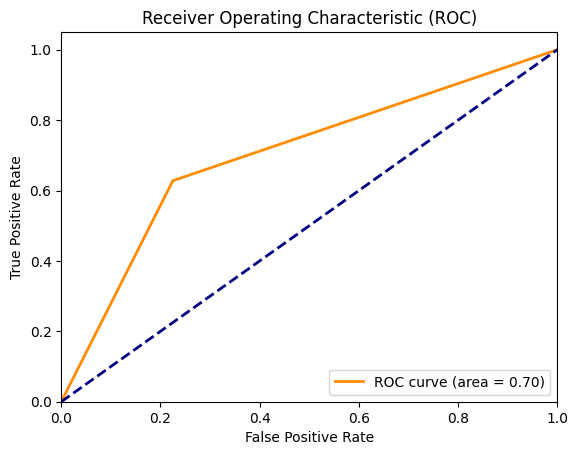

In [174]:
# Calculate precision
precision = precision_score(y_test_lda, PIDD_pred_adaboost_lda)
print("Precision:", precision)

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test_lda, PIDD_pred_adaboost_lda)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Based on the presented chart, post-application of SMOTE, the AdaBoost classifier, enhanced with Linear Discriminant Analysis (LDA), exhibits an ROC curve with an area under the curve (AUC) of 0.70 on the testing set. In this case, with an AUC of 0.70, indicates a good level of discriminative ability for the classification model. It suggests that it has a solid ability to distinguish between positive and negative instances. 

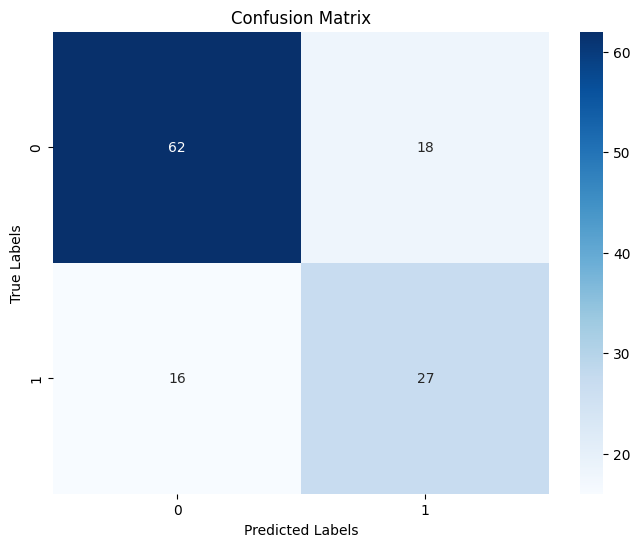

In [175]:
# Confusion Matrix
cm = confusion_matrix(y_test_lda, PIDD_pred_adaboost_lda)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, post-application of SMOTE, the AdaBoost classifier, enhanced with LDA correctly classified 62 instances out of 80 for the '0' class and correctly classified 27 instances out of 43 for the '1' class on the testing set.

**Interpretation**

After a comprehensive analysis of the evaluation metrics, it is evident that the Support Vector Machine (SVM) classifier stands out as the top-performing classifier in our evaluation. With an accuracy of 0.74, precision of 0.63, recall of 0.63, F1 Score of 0.63, and a ROC AUC Score of 0.71, the SVM classifier demonstrates a compelling balance between precision and recall, ensuring robust performance across different aspects. The high accuracy and ROC AUC score further affirm the classifier's effectiveness in distinguishing between the classes. Considering these results, the SVM classifier emerges as the most suitable choice for the given task, showcasing its ability to achieve a harmonious trade-off between precision and recall while maintaining overall high predictive performance.

## Hyperparameter Tuning

Here, we will employ Grid Search with Cross Validation to identify the optimal hyperparameters for each classifier. 

**GridSearch with cross-validation is a technique used for hyperparameter tuning in machine learning models. It combines Grid Search, which systematically searches through a predefined hyperparameter grid, with cross-validation, which assesses the model's performance on multiple subsets of the training data**

Cross-Validation = 5

In [176]:
# Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
}

model_lr = LogisticRegression(solver='lbfgs')
grid_search_lr = GridSearchCV(model_lr, param_grid=param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train_lda_resampled_scaled, y_train_lda_resampled)

# Support Vector Classifier
param_grid_svc = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
}

model_svc = SVC()
grid_search_svc = GridSearchCV(model_svc, param_grid=param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svc.fit(X_train_lda_resampled_scaled, y_train_lda_resampled)

# Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model_rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(model_rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_lda_resampled_scaled, y_train_lda_resampled)

# XGBoost
param_grid_xgb = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
}

model_xgb = XGBClassifier()
grid_search_xgb = GridSearchCV(model_xgb, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train_lda_resampled_scaled, y_train_lda_resampled)

# AdaBoost
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 1]
}

model_ada = AdaBoostClassifier()
grid_search_ada = GridSearchCV(model_ada, param_grid=param_grid_ada, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_ada.fit(X_train_lda_resampled_scaled, y_train_lda_resampled)

# Print the results
print(f"Best hyperparameters for Logistic Regression: {grid_search_lr.best_params_}")
print(f"Accuracy for Logistic Regression: {grid_search_lr.best_score_}")
print("\n")
print(f"Best hyperparameters for SVC: {grid_search_svc.best_params_}")
print(f"Accuracy for SVC: {grid_search_svc.best_score_}")
print("\n")
print(f"Best hyperparameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Accuracy for Random Forest: {grid_search_rf.best_score_}")
print("\n")
print(f"Best hyperparameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Accuracy for XGBoost: {grid_search_xgb.best_score_}")
print("\n")
print(f"Best hyperparameters for AdaBoost: {grid_search_ada.best_params_}")
print(f"Accuracy for AdaBoost: {grid_search_ada.best_score_}")


Best hyperparameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}
Accuracy for Logistic Regression: 0.7484375


Best hyperparameters for SVC: {'C': 0.1, 'kernel': 'rbf'}
Accuracy for SVC: 0.75


Best hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy for Random Forest: 0.725


Best hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Accuracy for XGBoost: 0.7515625


Best hyperparameters for AdaBoost: {'learning_rate': 0.01, 'n_estimators': 200}
Accuracy for AdaBoost: 0.7453125


### Evaluation of the Model's Performance on the Test Set

In [177]:
# Logistic Regression
best_lr_model = grid_search_lr.best_estimator_
lr_predictions = best_lr_model.predict(X_test_lda_scaled)
lr_accuracy = accuracy_score(y_test_lda, lr_predictions)

# Support Vector Classifier
best_svc_model = grid_search_svc.best_estimator_
svc_predictions = best_svc_model.predict(X_test_lda_scaled)
svc_accuracy = accuracy_score(y_test_lda, svc_predictions)

# Random Forest
best_rf_model = grid_search_rf.best_estimator_
rf_predictions = best_rf_model.predict(X_test_lda_scaled)
rf_accuracy = accuracy_score(y_test_lda, rf_predictions)

# XGBoost
best_xgb_model = grid_search_xgb.best_estimator_
xgb_predictions = best_xgb_model.predict(X_test_lda_scaled)
xgb_accuracy = accuracy_score(y_test_lda, xgb_predictions)

# AdaBoost
best_ada_model = grid_search_ada.best_estimator_
ada_predictions = best_ada_model.predict(X_test_lda_scaled)
ada_accuracy = accuracy_score(y_test_lda, ada_predictions)

# Print the test set accuracies
print(f"Test Accuracy for Logistic Regression: {lr_accuracy}")
print(f"Test Accuracy for SVC: {svc_accuracy}")
print(f"Test Accuracy for Random Forest: {rf_accuracy}")
print(f"Test Accuracy for XGBoost: {xgb_accuracy}")
print(f"Test Accuracy for AdaBoost: {ada_accuracy}")


Test Accuracy for Logistic Regression: 0.7235772357723578
Test Accuracy for SVC: 0.7317073170731707
Test Accuracy for Random Forest: 0.6991869918699187
Test Accuracy for XGBoost: 0.7154471544715447
Test Accuracy for AdaBoost: 0.7317073170731707


### Evaluation of the Model's Performance on the Test Set: Additional Performance Evaluation Metrics

Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        80
           1       0.61      0.58      0.60        43

    accuracy                           0.72       123
   macro avg       0.70      0.69      0.69       123
weighted avg       0.72      0.72      0.72       123

Confusion Matrix:
[[64 16]
 [18 25]]
ROC AUC: 0.8023255813953488


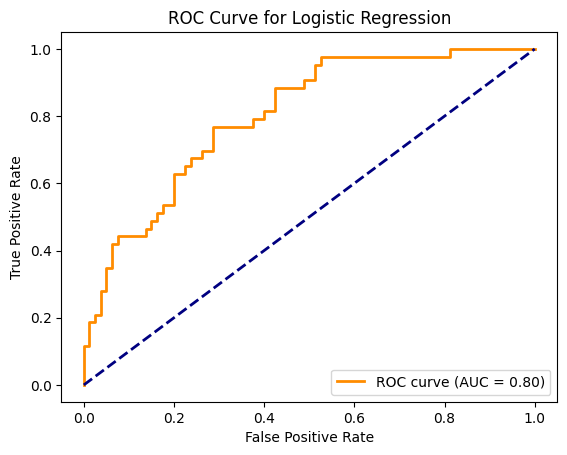

Model: SVC
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        80
           1       0.62      0.60      0.61        43

    accuracy                           0.73       123
   macro avg       0.70      0.70      0.70       123
weighted avg       0.73      0.73      0.73       123

Confusion Matrix:
[[64 16]
 [17 26]]
ROC AUC: 0.7915697674418605


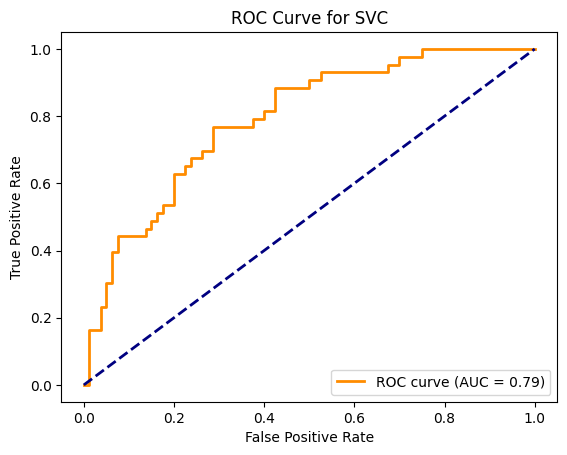

Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77        80
           1       0.57      0.58      0.57        43

    accuracy                           0.70       123
   macro avg       0.67      0.67      0.67       123
weighted avg       0.70      0.70      0.70       123

Confusion Matrix:
[[61 19]
 [18 25]]
ROC AUC: 0.7672965116279069


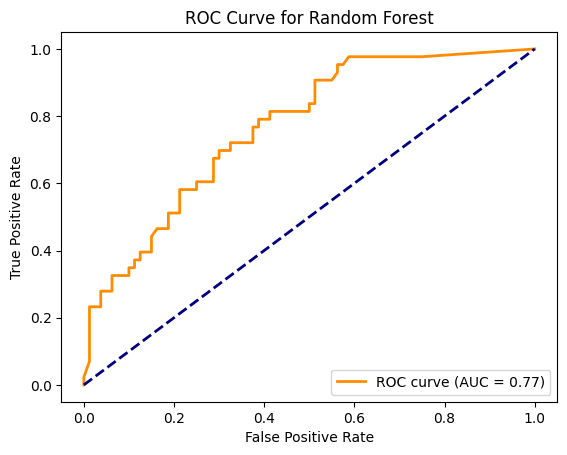

Model: XGBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        80
           1       0.58      0.65      0.62        43

    accuracy                           0.72       123
   macro avg       0.69      0.70      0.69       123
weighted avg       0.72      0.72      0.72       123

Confusion Matrix:
[[60 20]
 [15 28]]
ROC AUC: 0.7906976744186046


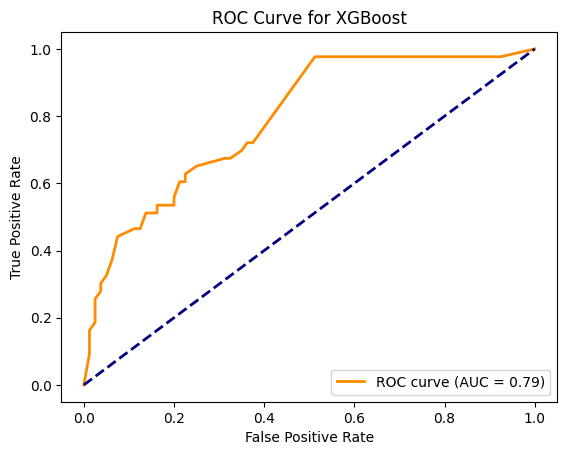

Model: AdaBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        80
           1       0.61      0.63      0.62        43

    accuracy                           0.73       123
   macro avg       0.71      0.71      0.71       123
weighted avg       0.73      0.73      0.73       123

Confusion Matrix:
[[63 17]
 [16 27]]
ROC AUC: 0.7998546511627906


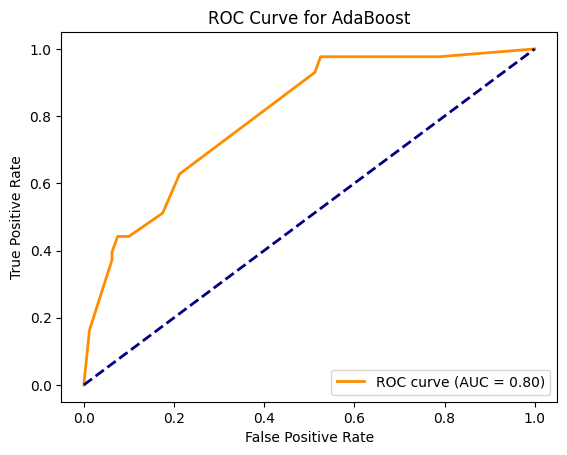

In [178]:
# Logistic Regression
best_lr_model = grid_search_lr.best_estimator_
lr_predictions = best_lr_model.predict(X_test_lda_scaled)
lr_probabilities = best_lr_model.predict_proba(X_test_lda_scaled)[:, 1]

# Support Vector Classifier
best_svc_model = grid_search_svc.best_estimator_
svc_predictions = best_svc_model.predict(X_test_lda_scaled)
svc_probabilities = best_svc_model.decision_function(X_test_lda_scaled)

# Random Forest
best_rf_model = grid_search_rf.best_estimator_
rf_predictions = best_rf_model.predict(X_test_lda_scaled)
rf_probabilities = best_rf_model.predict_proba(X_test_lda_scaled)[:, 1]

# XGBoost
best_xgb_model = grid_search_xgb.best_estimator_
xgb_predictions = best_xgb_model.predict(X_test_lda_scaled)
xgb_probabilities = best_xgb_model.predict_proba(X_test_lda_scaled)[:, 1]

# AdaBoost
best_ada_model = grid_search_ada.best_estimator_
ada_predictions = best_ada_model.predict(X_test_lda_scaled)
ada_probabilities = best_ada_model.predict_proba(X_test_lda_scaled)[:, 1]

# Function to print classification report, confusion matrix, and ROC AUC
def evaluate_model_performance(y_true, y_pred, y_prob, model_name):
    print(f"Model: {model_name}")
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    
    # Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    
    # ROC AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = roc_auc_score(y_true, y_prob)
    print(f"ROC AUC: {roc_auc}")
    
    # Plot ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"ROC Curve for {model_name}")
    plt.legend(loc="lower right")
    plt.show()

# Evaluate each model
evaluate_model_performance(y_test_lda, lr_predictions, lr_probabilities, "Logistic Regression")
evaluate_model_performance(y_test_lda, svc_predictions, svc_probabilities, "SVC")
evaluate_model_performance(y_test_lda, rf_predictions, rf_probabilities, "Random Forest")
evaluate_model_performance(y_test_lda, xgb_predictions, xgb_probabilities, "XGBoost")
evaluate_model_performance(y_test_lda, ada_predictions, ada_probabilities, "AdaBoost")


**Interpretation:**

**AdaBoost:**

Accuracy: 0.73
Precision (Class 1): 0.61
Recall (Class 1): 0.63
F1-score (Class 1): 0.62
ROC AUC: 0.7999


**SVC:**

Accuracy: 0.73
Precision (Class 1): 0.62
Recall (Class 1): 0.60
F1-score (Class 1): 0.61
ROC AUC: 0.7916


**XGBoost:**

Accuracy: 0.72
Precision (class 1): 0.58
Recall (class 1): 0.65
F1-score (class 1): 0.62
ROC AUC: 0.7907


**Logistic Regression:**

Accuracy: 0.72
Precision (class 1): 0.61
Recall (class 1): 0.58
F1-score (class 1): 0.60
ROC AUC: 0.8023


**Random Forest:**

Accuracy: 0.72
Precision (class 1): 0.59
Recall (class 1): 0.60
F1-score (class 1): 0.60
ROC AUC: 0.7653


**Comparison:**

- SVC and Adaboost have the same accuracy (73%).
- AdaBoost has a slightly higher precision, recall, and F1-score for Class 1 compared to SVC.
- The ROC AUC score for AdaBoost is also slightly higher than that of SVC (79.99% vs. 79.16%).

**Conclusion:**

Based on the provided metrics, AdaBoost appears to perform slightly better than SVC for the given problem. It has higher precision, recall, and F1-score for the positive class (Class 1), as well as a slightly higher ROC AUC score. The ranking is Adaboost, SVC, Xgboost, Logistic Regression, and Random Forest. 

## Evaluate Overall Best Model: Additional Cross-Validation (CV = 5)

In [179]:
# Define the classifier
best_model = AdaBoostClassifier(learning_rate= 0.01, n_estimators=200)  # define hyperparameters

# Specify the number of folds (k)
num_folds = 5

# Define the cross-validation strategy 
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)  

# Perform cross-validation and calculate accuracy scores
accuracy_scores = cross_val_score(best_model, X_train_lda_resampled_scaled, y_train_lda_resampled, cv=cv, scoring='accuracy')

# Display the accuracy scores for each fold
print("Accuracy Scores for Each Fold:", accuracy_scores)

# Calculate and display the mean and standard deviation of the accuracy scores
mean_accuracy = accuracy_scores.mean()
std_accuracy = accuracy_scores.std()
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)


Accuracy Scores for Each Fold: [0.7421875 0.734375  0.765625  0.7265625 0.765625 ]
Mean Accuracy: 0.746875
Standard Deviation of Accuracy: 0.016086922095292187


**Interpretation:**

The 5-fold cross-validation of the AdaBoost classifier suggest that it performs consistently well across different subsets of the data. The average accuracy, represented by the mean accuracy of 0.7469, indicates that, on average, the classifier correctly classifies about 74.69% of instances during the cross-validation process. The standard deviation of 0.0161, being relatively low, suggests that the classifier's performance is stable and reliable across various folds. In summary, based on the cross-validation results, the classifier demonstrates good overall performance and consistency in predicting the target variable. 

## Evaluate Overall Best Model: Additional Cross-Validation (CV = 10)

In [180]:
# Define the classifier
best_model = AdaBoostClassifier(learning_rate= 0.01, n_estimators=200)  # define hyperparameters

# Specify the number of folds (k)
num_folds = 10

# Define the cross-validation strategy 
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)  

# Perform cross-validation and calculate accuracy scores
accuracy_scores = cross_val_score(best_model, X_train_lda_resampled_scaled, y_train_lda_resampled, cv=cv, scoring='accuracy')

# Display the accuracy scores for each fold
print("Accuracy Scores for Each Fold:", accuracy_scores)

# Calculate and display the mean and standard deviation of the accuracy scores
mean_accuracy = accuracy_scores.mean()
std_accuracy = accuracy_scores.std()
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)

Accuracy Scores for Each Fold: [0.6875   0.796875 0.78125  0.6875   0.796875 0.734375 0.671875 0.78125
 0.828125 0.703125]
Mean Accuracy: 0.746875
Standard Deviation of Accuracy: 0.05358258812338203


**Interpretation**

The cross-validation results for CV=10, collectively indicate that the Adaboost classifier exhibits a strong and stable performance, with an average accuracy of 0.7469 and a relatively low standard deviation of 0.0536. This suggests that the classifier generalizes well to unseen data and is less prone to overfitting. Overall, these results instill confidence in the classifier's reliability and effectiveness for the given task

## 2. Preprocessing of the PID Dataset by Excluding Rows with Zero Values

Here we will exclude rows with zero entries in the Glucose, Blood Pressure, Skin Thickness, Insulin, BMI columns, and Pregnancies to ensure data consistency and accuracy i.e. exclude any rows with missing data for more than half of the variables

#### Rows with zero values shall be excluded from the Pima Indian Diabetes dataset for several reasons:

- To improve the quality of the data: Missing data can make it difficult to analyze data accurately. By excluding rows with zero values, we shall ensure that the data was as complete and accurate as possible.

- To reduce the impact of missing data on the analysis: We are interested in using the Pima Indian Diabetes dataset to develop a machine learning algorithm to predict diabetes diagnosis. Missing data can make it difficult to develop accurate machine learning algorithms, as it can lead to overfitting.

- To ensure the reliability of the results: We want to make sure that the results of our study is not biased by missing data. By excluding rows with zero values, we will be able to reduce the risk of bias.

In [181]:
# Replacing zero values in all columns with 'np.nan' excluding 'Outcome' column

# Replace zero entries in Pregnanices column with np.nan
PIDD["Pregnancies"].replace(0, np.nan, inplace=True) 

# Replace zero entries in Glucose column with np.nan
PIDD["Glucose"].replace(0, np.nan, inplace=True) 

# Replace zero entries in Blood Pressure column with np.nan
PIDD["BloodPressure"].replace(0, np.nan, inplace=True) 

# Replace zero entries in SkinThickness column with np.nan
PIDD["SkinThickness"].replace(0, np.nan, inplace=True) 

# Replace zero entries in Insulin column with np.nan
PIDD["Insulin"].replace(0, np.nan, inplace=True) 

# Replace zero entries in BMI column with np.nan
PIDD["BMI"].replace(0, np.nan, inplace=True) 

In [182]:
# sanity check
PIDD.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Based on the provided information, there are 111 instances of zero values in pregnancies column, 5 instances in glucose column, 35 instances in blood pressure column, 227 instances in skin thickness, 374 instances in insulin column, and 11 instances in BMI column.

In [183]:
# Drop rows with 'NaN' values
PIDD.dropna(inplace=True)

In [184]:
# Check the dimension of new dataset
PIDD.shape

(336, 9)

After the removal of rows containing zero values in the PID dataset, the dataset now comprises 336 rows and 9 columns.

### Checking the Distribution (new dataset)

In [185]:
# Summary statistics of the (new) dataset
PIDD.describe().T

count        mean         std     min     25%  \
Pregnancies               336.0    3.851190    3.148352   1.000   1.000   
Glucose                   336.0  122.279762   30.784649  56.000  99.000   
BloodPressure             336.0   70.244048   12.363401  24.000  62.000   
SkinThickness             336.0   28.663690   10.249863   7.000  21.000   
Insulin                   336.0  155.348214  118.777281  15.000  76.000   
BMI                       336.0   32.297321    6.368558  18.200  27.800   
DiabetesPedigreeFunction  336.0    0.518702    0.327689   0.085   0.268   
Age                       336.0   31.836310   10.458446  21.000  24.000   
Outcome                   336.0    0.330357    0.471043   0.000   0.000   

                               50%        75%      max  
Pregnancies                 3.0000    6.00000   17.000  
Glucose                   119.0000  144.00000  197.000  
BloodPressure              70.0000   78.00000  110.000  
SkinThickness              28.5000   36.00000   52.000  
Insulin                   125.5000  190.00000  846.000  
BMI                        32.7500   36.25000   57.300  
DiabetesPedigreeFunction    0.4465    0.68825    2.329  
Age                        28.0000   38.00000   81.000  
Outcome                     0.0000    1.00000    1.000

Upon reviewing the summary statistics of our cleaned dataset, it has come to our attention that outliers are present. In light of this, we will implement a fine-tuned approach to address these outliers in order to enhance the robustness and reliability of our analysis. The steps involve reevaluating the outlier identification methods, leveraging domain knowledge to understand the context of outliers, and considering alternative statistical measures that are less sensitive to extreme values

<Figure size 768x576 with 0 Axes>

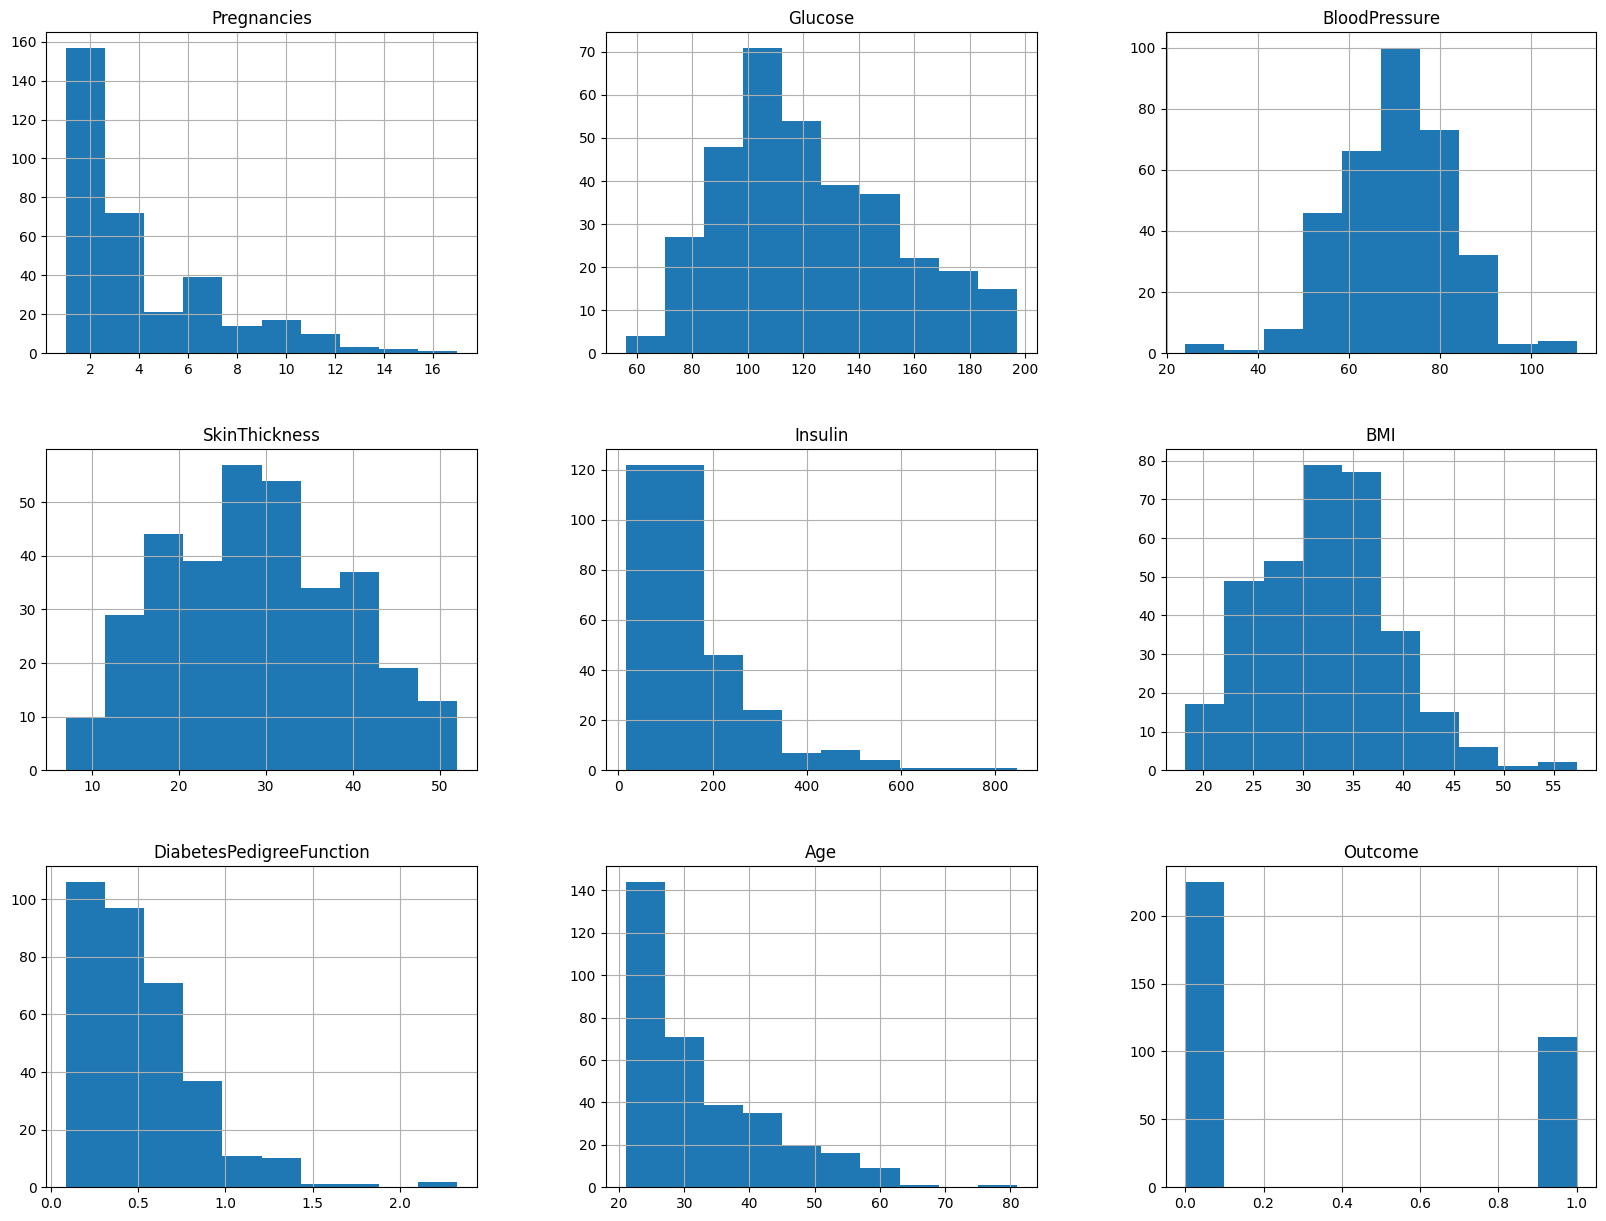

In [186]:
# Displays all the numerical datatypes in the dataset (new dataset)
plt.figure(dpi = 120)
PIDD.hist(figsize = (20, 15))
plt.show()

<Axes: >

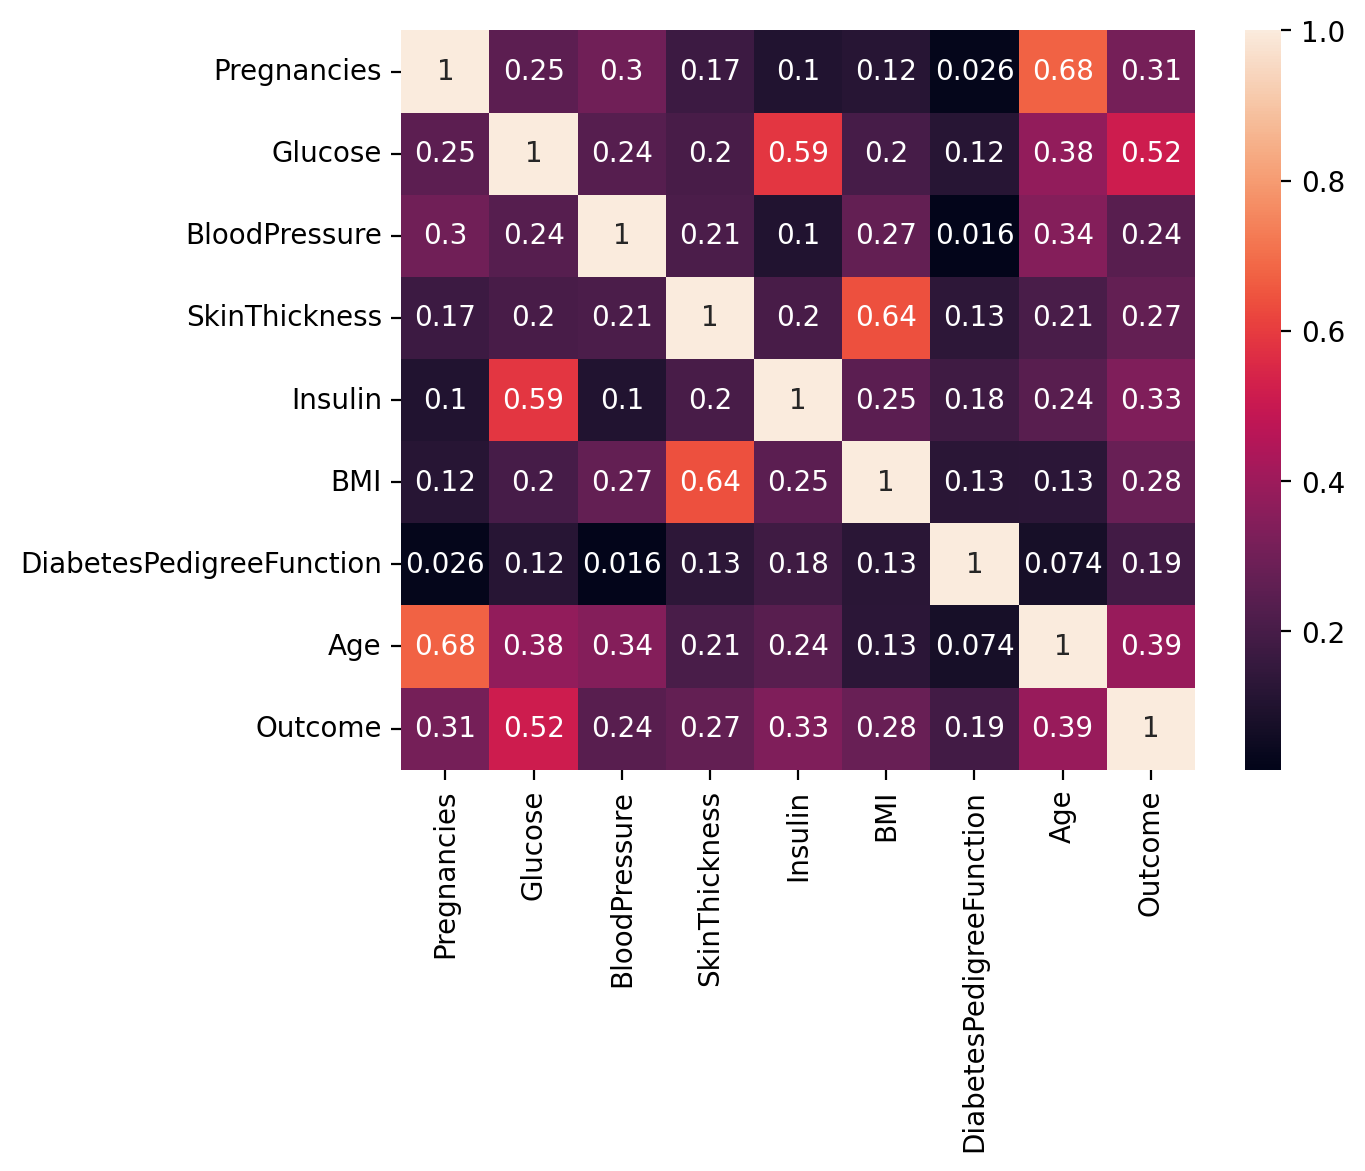

In [187]:
# heatmap of the PID (new) dataset
plt.figure(dpi=200)
sns.heatmap(PIDD.corr(), annot = True)

Examining the heatmap, it is observed that there is a notable correlation between certain pairs of variables. Specifically, the correlation coefficient between 'Pregnancies' and 'Age' is found to be 0.68, indicating a moderate positive correlation. Similarly, the correlation between 'Skin Thickness' and 'BMI' is 0.64, suggesting a substantial positive association. Additionally, the correlation coefficient between 'Glucose' and 'Insulin' is computed as 0.59, indicative of a moderate positive correlation. Lastly, the correlation between 'Glucose' and 'Outcome' is identified as 0.52, implying a moderate positive correlation between these two variables.

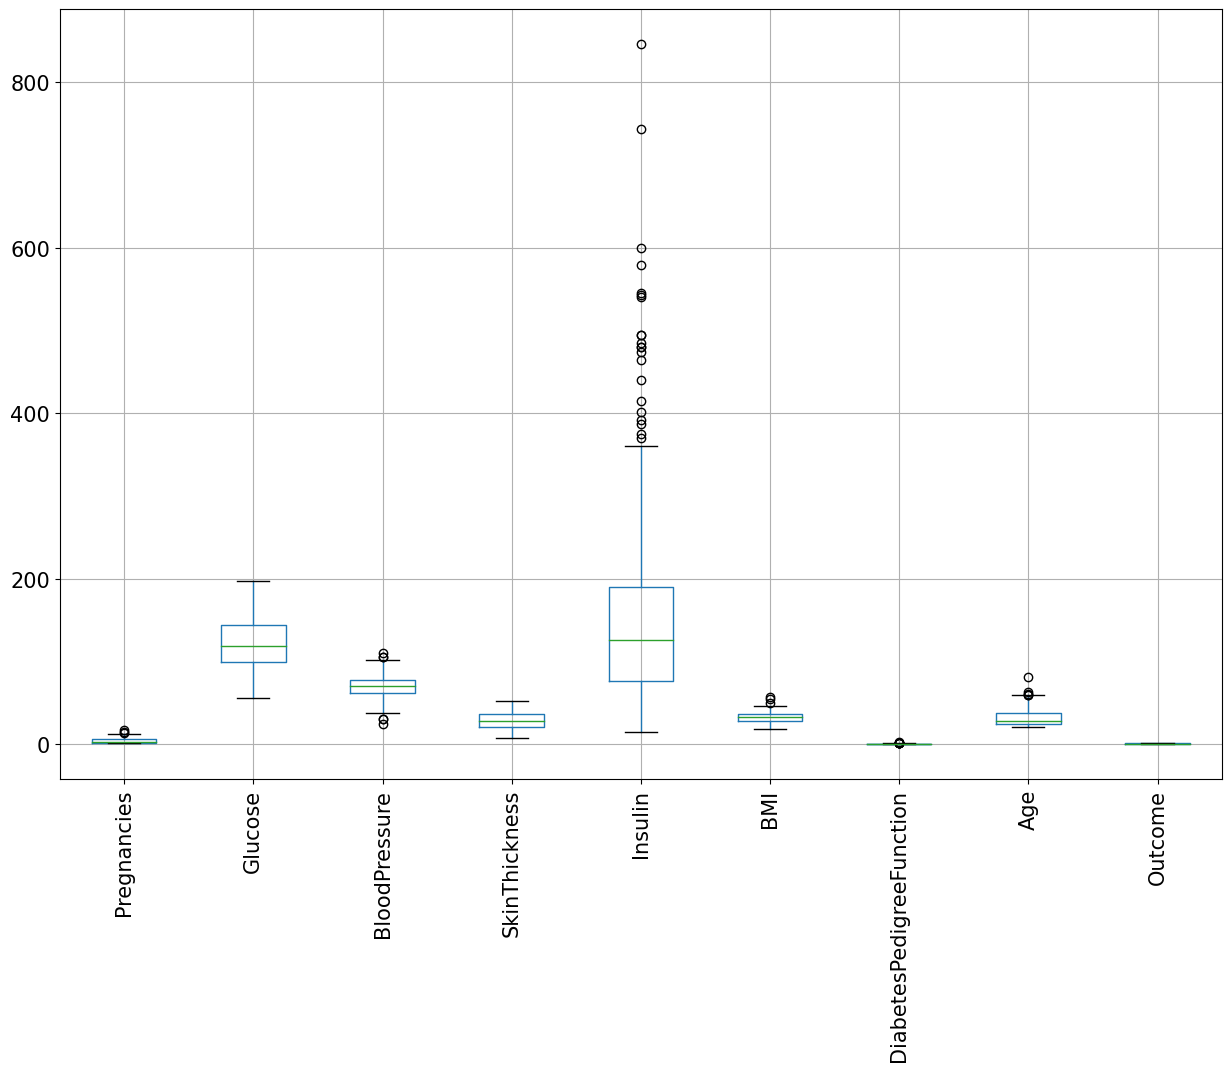

In [188]:
# display a boxplot (new dataset)
PIDD.boxplot(figsize = (15,10), fontsize = 15, rot = 90)
plt.show() # shows the plot of all numerical variables 

The boxplot indicates that certain variables exhibit dominance over others, highlighting the necessity for outlier detection, treatment, and dataset scaling.

### Outlier detection by Interquartile Range (IQR) Method

The IQR is a robust measure of central tendency and dispersion that is less affected by outliers than the mean or standard deviation. 

In [189]:
# Calculate the first quartile (Q1) of the PID dataset
Q1 = PIDD.quantile(0.25)

# Calculate the third quartile (Q3) of the PID dataset
Q3 = PIDD.quantile(0.75)

# Calculate the Interquartile Range (IQR) of the PID dataset
IQR = Q3 - Q1

# Identify potential outliers using the 1.5*IQR rule for each variable
# True represents potential outliers for each row
outliers = ((PIDD < (Q1 - 1.5 * IQR)) | (PIDD > (Q3 + 1.5 * IQR))).any(axis=1)

# Display rows containing potential outliers based on the defined criteria
PIDD[outliers]


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
8            2.0    197.0           70.0           45.0    543.0  30.5   
13           1.0    189.0           60.0           23.0    846.0  30.1   
18           1.0    103.0           30.0           38.0     83.0  43.3   
39           4.0    111.0           72.0           47.0    207.0  37.1   
43           9.0    171.0          110.0           24.0    240.0  45.4   
88          15.0    136.0           70.0           32.0    110.0  37.1   
99           1.0    122.0           90.0           51.0    220.0  49.7   
111          8.0    155.0           62.0           26.0    495.0  34.0   
125          1.0     88.0           30.0           42.0     99.0  55.0   
147          2.0    106.0           64.0           35.0    119.0  30.5   
153          1.0    153.0           82.0           42.0    485.0  40.6   
159         17.0    163.0           72.0           41.0    114.0  40.9   
186          8.0    181.0           68.0           36.0    495.0  30.1   
187          1.0    128.0           98.0           41.0     58.0  32.0   
223          7.0    142.0           60.0           33.0    190.0  28.8   
228          4.0    197.0           70.0           39.0    744.0  36.7   
231          6.0    134.0           80.0           37.0    370.0  46.2   
248          9.0    124.0           70.0           33.0    402.0  35.4   
258          1.0    193.0           50.0           16.0    375.0  25.9   
259         11.0    155.0           76.0           28.0    150.0  33.3   
286          5.0    155.0           84.0           44.0    545.0  38.7   
298         14.0    100.0           78.0           25.0    184.0  36.6   
370          3.0    173.0           82.0           48.0    465.0  38.4   
392          1.0    131.0           64.0           14.0    415.0  23.7   
395          2.0    127.0           58.0           24.0    275.0  27.7   
409          1.0    172.0           68.0           49.0    579.0  42.4   
415          3.0    173.0           84.0           33.0    474.0  35.7   
459          9.0    134.0           74.0           33.0     60.0  25.9   
486          1.0    139.0           62.0           41.0    480.0  40.7   
519          6.0    129.0           90.0            7.0    326.0  19.6   
584          8.0    124.0           76.0           24.0    600.0  28.7   
593          2.0     82.0           52.0           22.0    115.0  28.5   
597          1.0     89.0           24.0           19.0     25.0  27.8   
645          2.0    157.0           74.0           35.0    440.0  39.4   
655          2.0    155.0           52.0           27.0    540.0  38.7   
662          8.0    167.0          106.0           46.0    231.0  37.6   
672         10.0     68.0          106.0           23.0     49.0  35.5   
673          3.0    123.0          100.0           35.0    240.0  57.3   
695          7.0    142.0           90.0           24.0    480.0  30.4   
710          3.0    158.0           64.0           13.0    387.0  31.2   
715          7.0    187.0           50.0           33.0    392.0  33.9   
763         10.0    101.0           76.0           48.0    180.0  32.9   

     DiabetesPedigreeFunction  Age  Outcome  
8                       0.158   53        1  
13                      0.398   59        1  
18                      0.183   33        0  
39                      1.390   56        1  
43                      0.721   54        1  
88                      0.153   43        1  
99                      0.325   31        1  
111                     0.543   46        1  
125                     0.496   26        1  
147                     1.400   34        0  
153                     0.687   23        0  
159                     0.817   47        1  
186                     0.615   60        1  
187                     1.321   33        1  
223                     0.687   61        0  
228                     2.329   31        0  
231                     0.238   46      

In [190]:
# Determine the total number of outliers 
PIDD[outliers].value_counts().sum()

42

The IQR method detected 42 outliers in the PID dataset, comprising both high and low values.

### Outlier Imputation: Replace the outliers with the median values

In the new PID dataset, outliers identified using the Interquartile Range (IQR) method will be handled by replacing their values with the median. The median is chosen as a robust measure of central tendency, resistant to the influence of outliers, ensuring a more stable representation of the data.

In [191]:
# Replacing outliers in the new PID dataset with the median values 
PIDD[outliers] = PIDD[outliers].median()

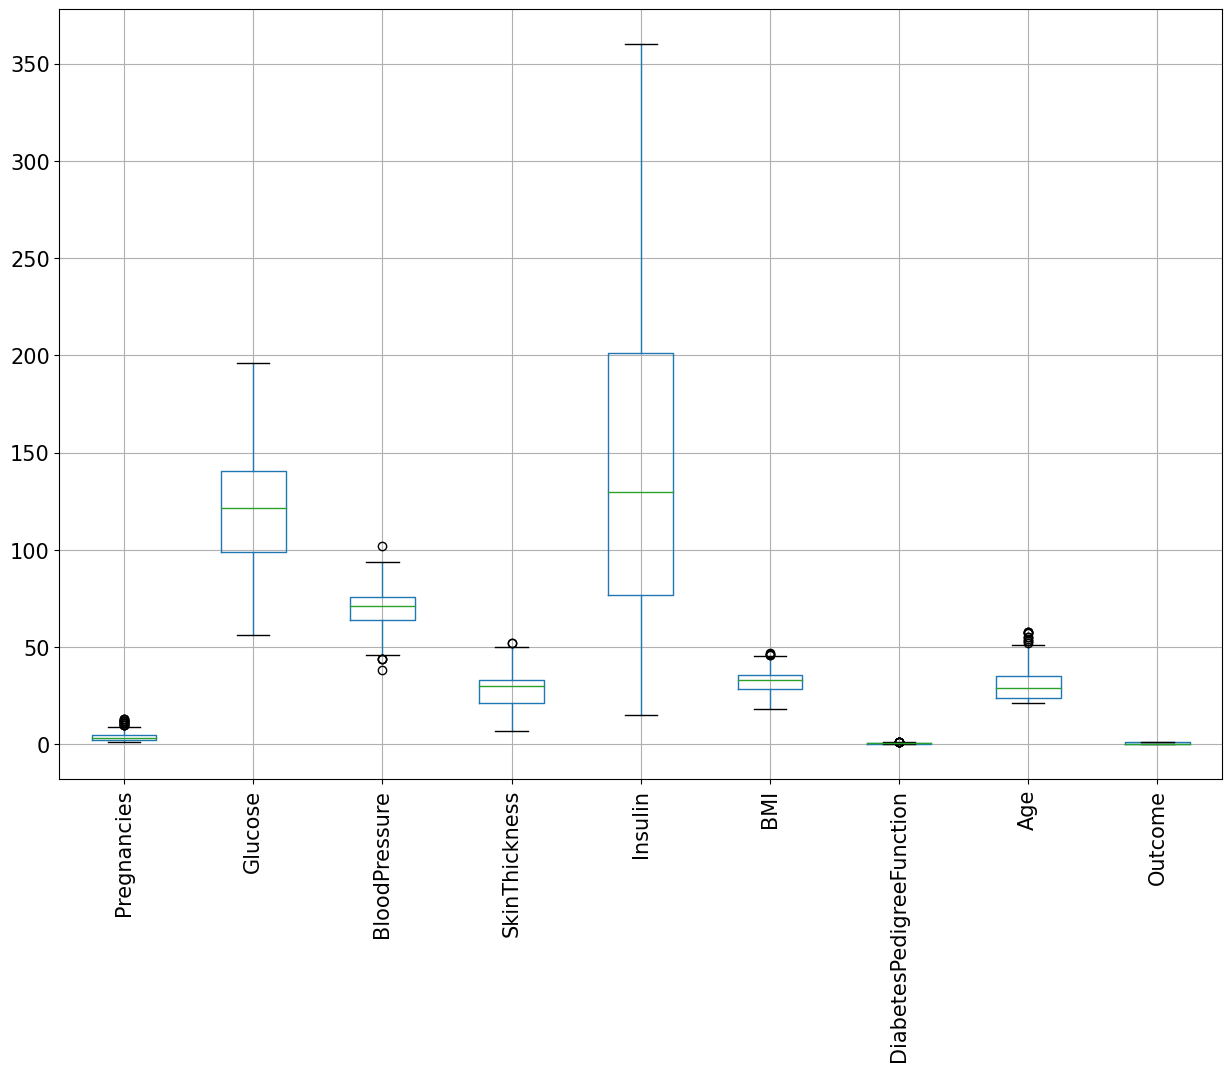

In [192]:
# display a boxplot (cleaned dataset) 
PIDD.boxplot(figsize = (15,10), fontsize = 15, rot = 90)
plt.show() # shows the plot of all numerical variables 

The displayed boxplot visualizes the cleaned dataset without outliers; however, further steps are required for scaling and balancing.

<Figure size 768x576 with 0 Axes>

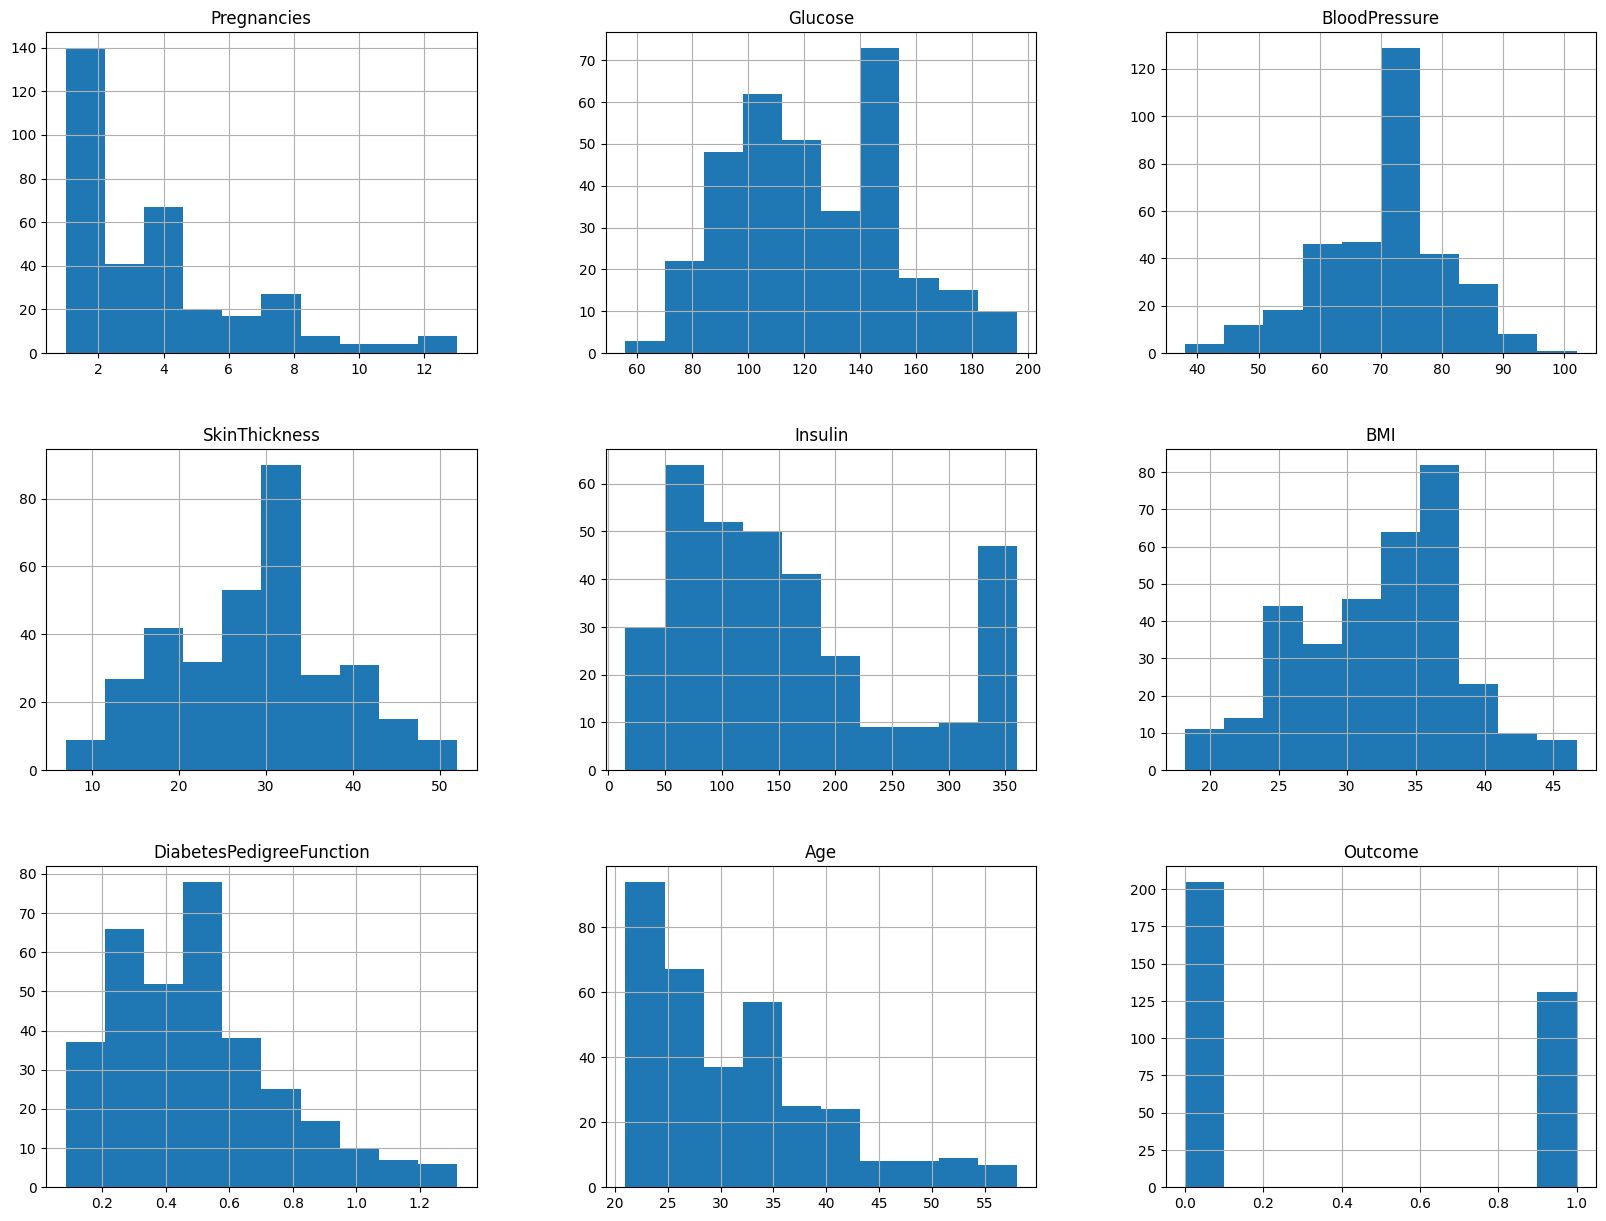

In [193]:
# Displays all the numerical datatypes in the dataset (cleaned dataset)
plt.figure(dpi = 120)
PIDD.hist(figsize = (20, 15))
plt.show()

<Axes: >

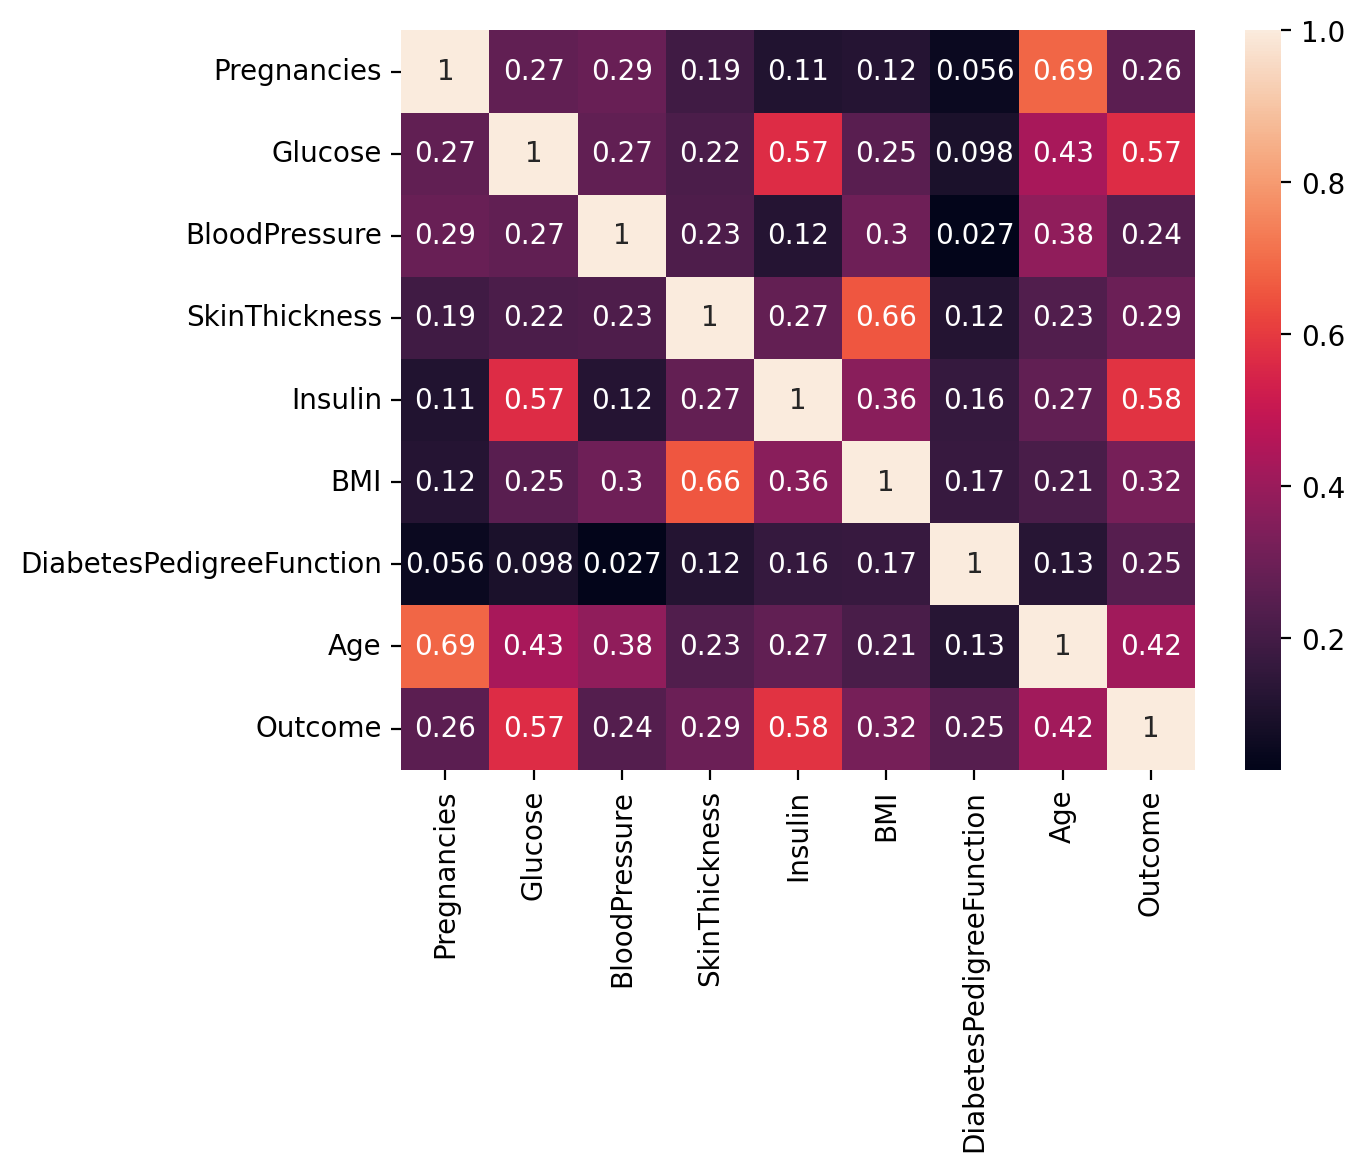

In [194]:
# heatmap of the PID (cleaned) dataset
plt.figure(dpi=200)
sns.heatmap(PIDD.corr(), annot = True)

Analyzing the heatmap reveals significant correlations between various pairs of variables. Notably, the correlation coefficient between 'Pregnancies' and 'Age' stands at 0.69, signifying a moderate positive correlation. Similarly, 'Skin Thickness' and 'BMI' exhibit a substantial positive association with a correlation coefficient of 0.66. Moving on to 'Insulin' and 'Outcome,' their correlation coefficient is calculated to be 0.58, indicating a moderate positive correlation. Furthermore, the correlation between 'Glucose' and 'Insulin' is found to be 0.57, suggestive of a moderate positive correlation between these two variables. Finally, the correlation coefficient between 'Glucose' and 'Outcome' is identified as 0.57, implying a moderate positive correlation between these respective variables. 

## Bivariate Data Visualization: All Features by Target 'Outcome'

In [195]:
# Group by 'Outcome' and calculate the mode for each column
result = PIDD.groupby('Outcome').apply(lambda x: x.mode().iloc[0])
result

0        Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
Outcome                                                                       
0                1.0     99.0           74.0           30.0    140.0  33.20   
1                3.5    140.5           71.0           33.0    348.0  35.45   

0        DiabetesPedigreeFunction   Age  Outcome  
Outcome                                           
0                           0.261  22.0      0.0  
1                           0.551  34.0      1.0

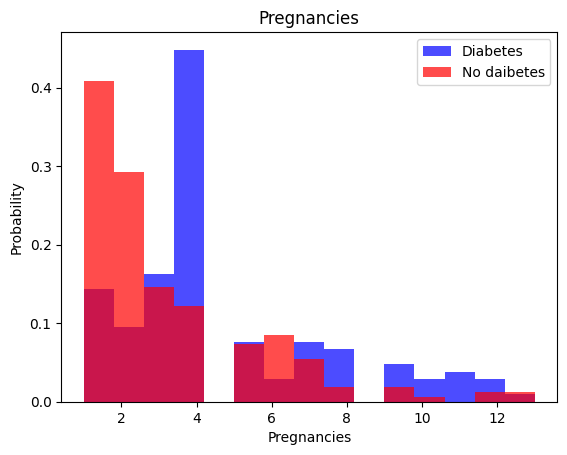

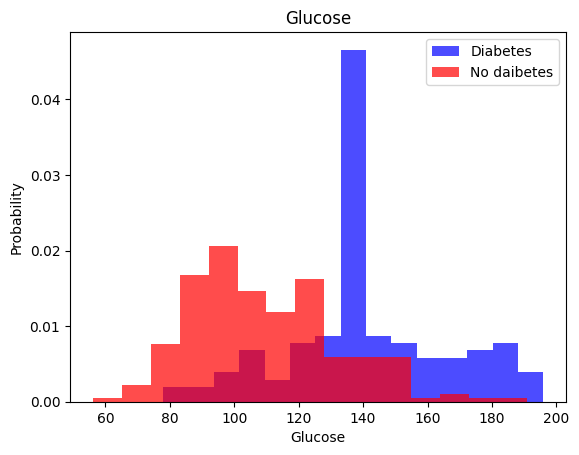

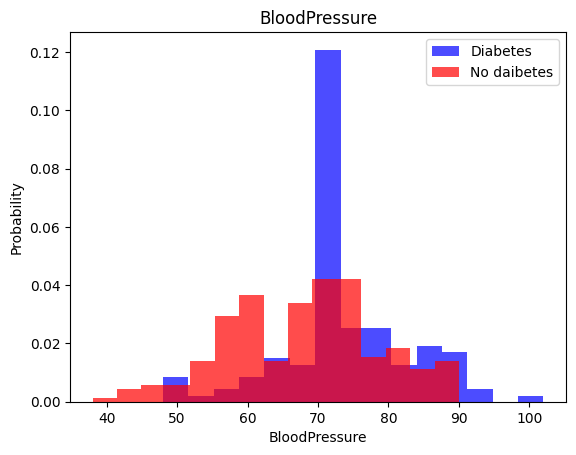

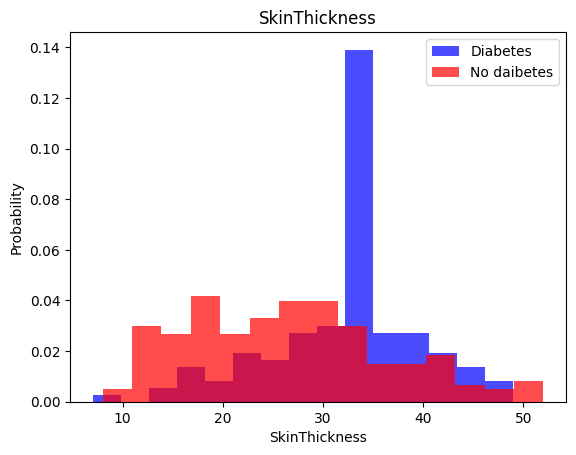

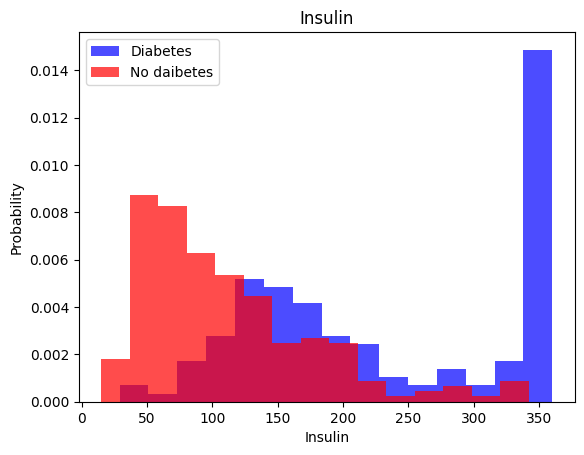

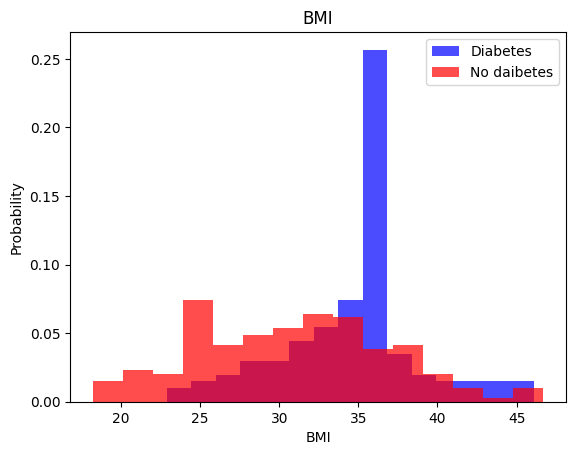

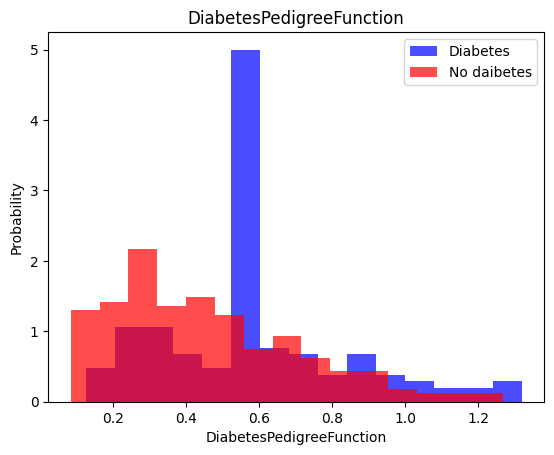

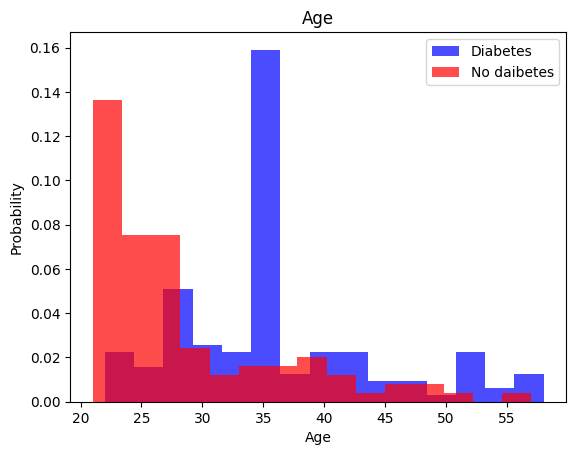

In [196]:
for i in range(len(PIDD.columns[:-1])):
    label = PIDD.columns[i]
    plt.hist(PIDD[PIDD["Outcome"]==1][label], color="blue", label="Diabetes", alpha=0.7, density=True, bins=15)
    plt.hist(PIDD[PIDD["Outcome"]==0][label], color="red", label="No daibetes", alpha=0.7, density=True, bins=15)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()
    

Analysis of the PID dataset, preprocessed by excluding rows with zero values, reveals distinctive patterns between diabetic and non-diabetic patients:

- Pregnancies: Most diabetic patients have had an average of 4 pregnancies, while non-diabetic patients predominantly show a history of only one pregnancy.

- Glucose Level: Diabetic patients commonly exhibit a glucose level around 140.5, in contrast to non-diabetic patients who often have a glucose level around 99.

- Blood Pressure: The majority of diabetic patients have a blood pressure of 71, while non-diabetic patients also have a blood pressure of 74.

- Skin Thickness: Diabetic patients typically present a skin thickness of 33, while non-diabetic patients have a skin thickness of 30.

- Insulin Level: Most diabetic patients have an insulin level of 348, while non-diabetic patients have an insulin level of 140.

- BMI (Body Mass Index): Diabetic patients commonly have a BMI of 35.45, whereas non-diabetic patients often have a BMI of 33.20.

- Diabetes Pedigree Function: Diabetic patients typically show a diabetes pedigree function of 0.551, while non-diabetic patients often have a value around 0.261.

- Age: The majority of diabetic patients are around 34 years old, while non-diabetic patients are often around 22 years old.

These findings underscore the impact of excluding rows with zero values on the identified health-related patterns, emphasizing potential correlations between these factors and diabetes status.








## Developing Traditional Machine Learning Classifiers on the PID Dataset: Preprocessed by Excluding Rows with Zero Values, without Employing Feature Selection, Including Methods like Random Forest Feature Importance, and Feature Extraction such as Linear Discriminant Analysis.

Here we shall build the traditional machine learning classifiers, such as LR, SVM, RF, extreme gradient boosting (XGBoost), adaptive boosting (AdaBoost)

## Data Splitting (Train-Test-Split)

We will divide the dataset into training and testing sets using a 80:20 ratio.

In [197]:
# Split data into input and output variables

# The independent variables (part of the dataset to be used for prediction)
X = PIDD.drop(['Outcome'], axis=1)  

# Value to be predicted (target variable)
y = PIDD['Outcome'] 

In [198]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0, shuffle = True)

In [199]:
# View the independent variables
X_train

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
617          2.0     68.0           62.0           13.0     15.0  20.1   
54           7.0    150.0           66.0           42.0    342.0  34.7   
97           1.0     71.0           48.0           18.0     76.0  20.4   
534          1.0     77.0           56.0           30.0     56.0  33.3   
650          1.0     91.0           54.0           25.0    100.0  25.2   
..           ...      ...            ...            ...      ...   ...   
527          3.0    116.0           74.0           15.0    105.0  26.3   
477          7.0    114.0           76.0           17.0    110.0  23.8   
420          1.0    119.0           88.0           41.0    170.0  45.3   
545          8.0    186.0           90.0           35.0    225.0  34.5   
514          3.0     99.0           54.0           19.0     86.0  25.6   

     DiabetesPedigreeFunction  Age  
617                     0.257   23  
54                      0.718   42  
97                      0.323   22  
534                     1.251   24  
650                     0.234   23  
..                        ...  ...  
527                     0.107   24  
477                     0.466   31  
420                     0.507   26  
545                     0.423   37  
514                     0.154   24  

[268 rows x 8 columns]

In [200]:
# View counts of unique values in 'y_train'
y_train.value_counts()

0    164
1    104
Name: Outcome, dtype: int64

## Data Standardization

In [201]:
# Here we standardize the dataset using StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train a Logistic Regression Classifier

In [202]:
# Create a Logistic Regression Classifier for predicting PIDD 
PIDD_lr_classifier = LogisticRegression()

In [203]:
# Fit the Logistic Regression Classifier on the training data
PIDD_lr_classifier.fit(X_train_scaled, y_train)

LogisticRegression()

### Make Predictions

In [204]:
# Perform predictions using the Logistic Regression Classifier on the training data
PIDD_lr_pred = PIDD_lr_classifier.predict(X_train_scaled)

### Model Evaluation

In [205]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_train, PIDD_lr_pred)
precision = precision_score(y_train, PIDD_lr_pred)
recall = recall_score(y_train, PIDD_lr_pred)
f1 = f1_score(y_train, PIDD_lr_pred)

# Classification Report
classification_rep = classification_report(y_train, PIDD_lr_pred)

# ROC AUC Score 
roc_auc = roc_auc_score(y_train, PIDD_lr_pred)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.832089552238806
Precision: 0.8041237113402062
Recall: 0.75
F1 Score: 0.7761194029850748
ROC AUC Score: 0.8170731707317074


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       164
           1       0.80      0.75      0.78       104

    accuracy                           0.83       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



According to the classification report, the logistic regression classifier achieved an accuracy of 0.83, precision of 0.80, recall of 0.75, F1-score of 0.78, and ROC AUC score of 0.82 on the training set.

Precision: 0.8041237113402062


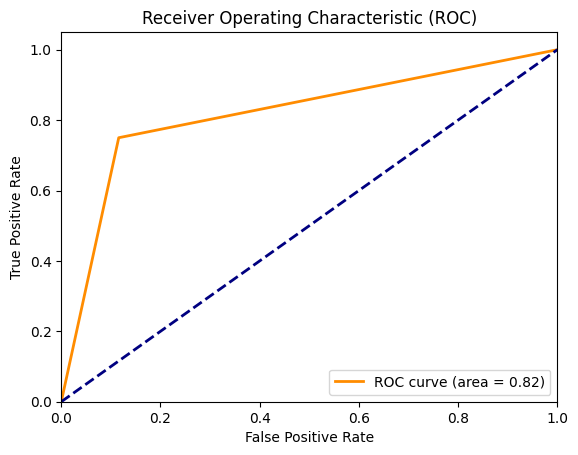

In [206]:
# Calculate precision
precision = precision_score(y_train, PIDD_lr_pred)
print("Precision:", precision)

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_train, PIDD_lr_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Based on the presented chart, the ROC curve exhibits an area under the curve (AUC) of 0.82 on the training set, indicating a very good level of discriminative ability for the classification model in this case. In other words, the classifier demonstrates a strong ability to distinguish between positive and negative instances.

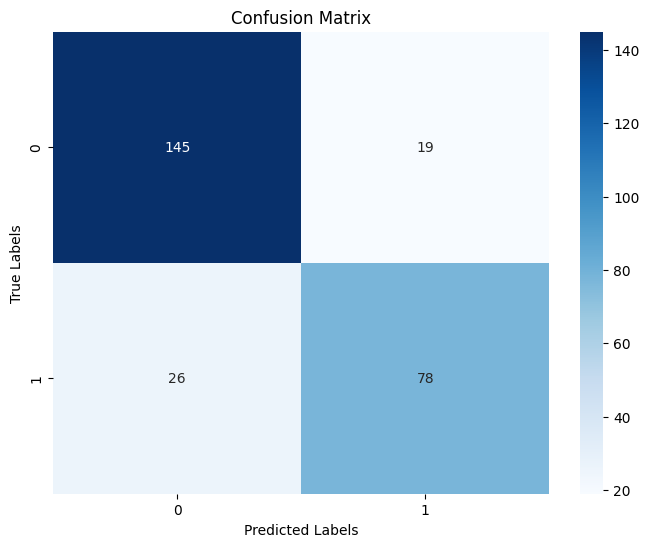

In [207]:
# Confusion Matrix
cm = confusion_matrix(y_train, PIDD_lr_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, the logistic regression classifier correctly classified 145 instances out of 164 for the '0' class and correctly classified 78 instances out of 104 for the '1' class on the training set.

### Make Predictions

In [208]:
# Perform predictions using the Logistic Regression Classifier on the test data
PIDD_lr_pred2 = PIDD_lr_classifier.predict(X_test_scaled)

### Model Evaluation

In [209]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, PIDD_lr_pred2)
precision = precision_score(y_test, PIDD_lr_pred2)
recall = recall_score(y_test, PIDD_lr_pred2)
f1 = f1_score(y_test, PIDD_lr_pred2)

# Classification Report
classification_rep = classification_report(y_test, PIDD_lr_pred2)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, PIDD_lr_pred2)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7941176470588235
Precision: 0.8095238095238095
Recall: 0.6296296296296297
F1 Score: 0.7083333333333334
ROC AUC Score: 0.7660343270099368


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        41
           1       0.81      0.63      0.71        27

    accuracy                           0.79        68
   macro avg       0.80      0.77      0.77        68
weighted avg       0.80      0.79      0.79        68



According to the classification report, the logistic regression classifier achieved an accuracy of 0.79, precision of 0.81, recall of 0.63, F1-score of 0.71, and ROC AUC score of 0.77 on the testing set.

Precision: 0.8095238095238095


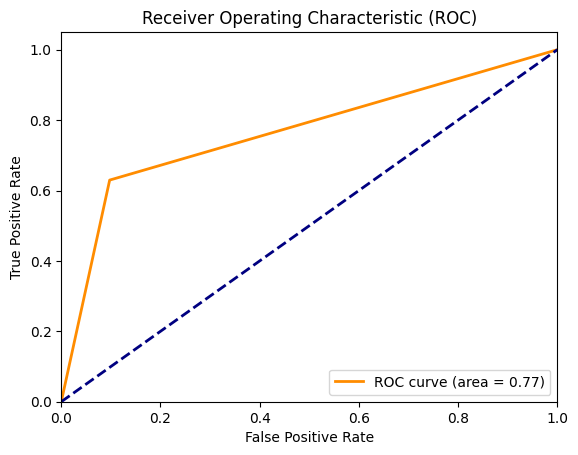

In [210]:
# Calculate precision
precision = precision_score(y_test, PIDD_lr_pred2)
print("Precision:", precision)

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, PIDD_lr_pred2)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Based on the presented chart, the ROC curve exhibits an area under the curve (AUC) of 0.77 on the testing set, indicating a good level of discriminative ability for the classification model in this case. In other words, the classifier demonstrates a good ability to distinguish between positive and negative instances.

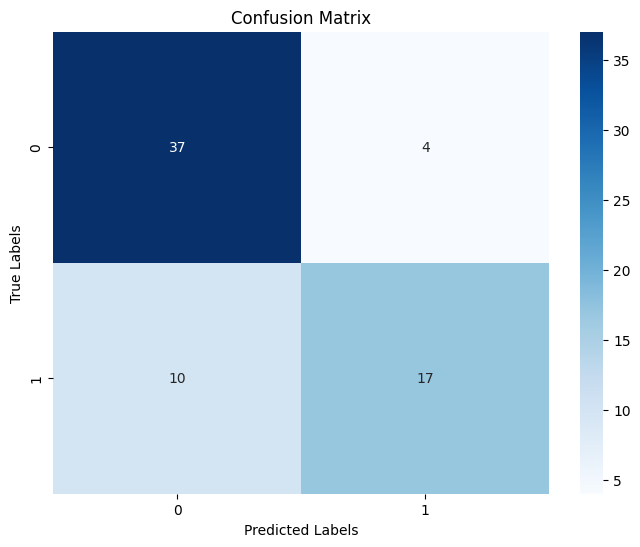

In [211]:
# Confusion Matrix
cm = confusion_matrix(y_test, PIDD_lr_pred2)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, the logistic regression classifier correctly classified 37 instances out of 41 for the '0' class and correctly classified 17 instances out of 27 for the '1' class on the testing set.

### Applying Syntethic Minority Over-Sampling Technique (SMOTE)

The primary goal of SMOTE is to rectify the imbalance observed in the '1' class denoting 'Diabetic patients,' which has notably fewer instances than the '0' class representing 'Non-diabetic patients.' Through the generation of synthetic instances for the minority class, SMOTE aims to rebalance these classes, thereby enhancing the model's capacity to learn effectively from both categ

In [212]:
# Create an instance of the SMOTE class
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [213]:
# View the dimension of the resampled training data 'X_train_resampled'
X_train_resampled.shape

(328, 8)

In [214]:
# View the dimension of the resampled training data 'y_train_resampled'
y_train_resampled.shape

(328,)

In [215]:
# View counts of unique values in 'y_train_resampled'
y_train_resampled.value_counts()

0    164
1    164
Name: Outcome, dtype: int64

In [216]:
# Standardize the features
scaler2 = StandardScaler()
X_train_scaled2 = scaler2.fit_transform(X_train_resampled)
X_test_scaled2 = scaler2.transform(X_test)

### Retrain the Logistic Regression Classifier

In [217]:
# Create and train the Logistic Regression model on the resampled data
PIDD_lr_classifier2 = LogisticRegression()
PIDD_lr_classifier2.fit(X_train_scaled2, y_train_resampled)

LogisticRegression()

### Make Predictions

In [218]:
# Perform predictions using the Logistic Regression Classifier on the resampled training data
PIDD_lr_pred3 = PIDD_lr_classifier2.predict(X_train_scaled2)

### Model Evaluation

In [219]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_train_resampled, PIDD_lr_pred3)
precision = precision_score(y_train_resampled, PIDD_lr_pred3)
recall = recall_score(y_train_resampled, PIDD_lr_pred3)
f1 = f1_score(y_train_resampled, PIDD_lr_pred3)

# Classification Report
classification_rep = classification_report(y_train_resampled, PIDD_lr_pred3)

# ROC AUC Score
roc_auc = roc_auc_score(y_train_resampled, PIDD_lr_pred3)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8353658536585366
Precision: 0.84375
Recall: 0.823170731707317
F1 Score: 0.8333333333333331
ROC AUC Score: 0.8353658536585366


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       164
           1       0.84      0.82      0.83       164

    accuracy                           0.84       328
   macro avg       0.84      0.84      0.84       328
weighted avg       0.84      0.84      0.84       328



According to the classification report, post-application of SMOTE, the logistic regression classifier achieved an accuracy of 0.84, precision of 0.84, recall of 0.82, F1-score of 0.83, and ROC AUC score of 0.84 on the training data

Precision: 0.84375


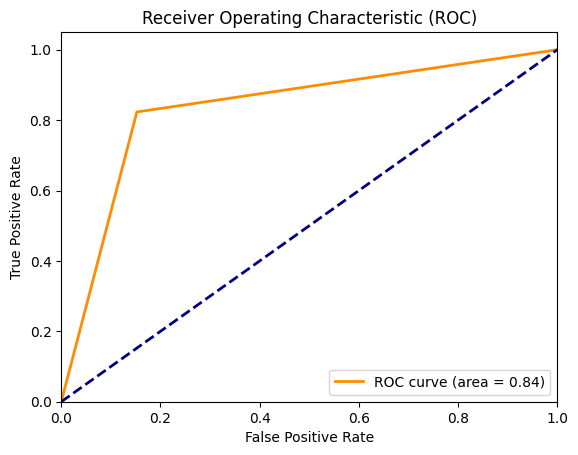

In [220]:
# Calculate precision
precision = precision_score(y_train_resampled, PIDD_lr_pred3)
print("Precision:", precision)

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_train_resampled, PIDD_lr_pred3)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Based on the presented chart, post-application of SMOTE, the ROC curve exhibits an area under the curve (AUC) of 0.84 on the training set, indicating a very good level of discriminative ability for the classification model in this case. In other words, the classifier demonstrates a strong ability to distinguish between positive and negative instances.

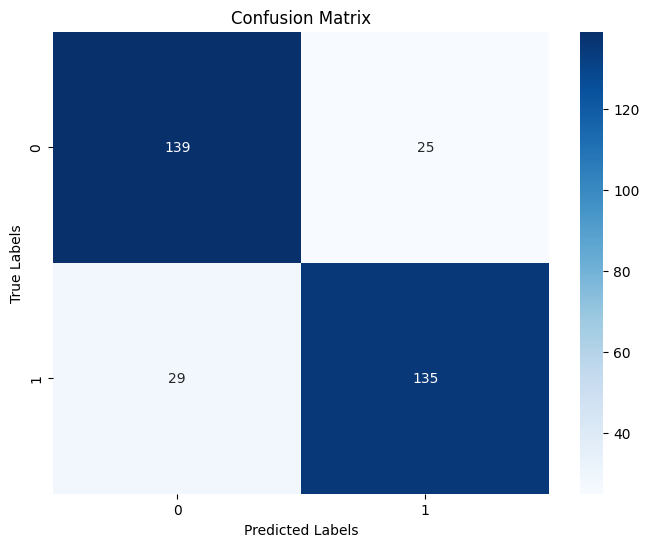

In [221]:
# Confusion Matrix
cm = confusion_matrix(y_train_resampled, PIDD_lr_pred3)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, post-application of SMOTE, the logistic regression classifier correctly classified 139 instances out of 164 for the '0' class and correctly classified 135 instances out of 164 for the '1' class on the training set.

### Make Predictions

In [222]:
# Perform predictions using the Logistic Regression Classifier on the test data
PIDD_lr_pred4 = PIDD_lr_classifier2.predict(X_test_scaled2)

### Model Evaluation

In [223]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, PIDD_lr_pred4)
precision = precision_score(y_test, PIDD_lr_pred4)
recall = recall_score(y_test, PIDD_lr_pred4)
f1 = f1_score(y_test, PIDD_lr_pred4)

# Classification Report
classification_rep = classification_report(y_test, PIDD_lr_pred4)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, PIDD_lr_pred4)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7794117647058824
Precision: 0.75
Recall: 0.6666666666666666
F1 Score: 0.7058823529411765
ROC AUC Score: 0.7601626016260162


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        41
           1       0.75      0.67      0.71        27

    accuracy                           0.78        68
   macro avg       0.77      0.76      0.76        68
weighted avg       0.78      0.78      0.78        68



According to the classification report, post-application of SMOTE, the logistic regression classifier achieved an accuracy of 0.78, precision of 0.75, recall of 0.67, F1-score of 0.71, and ROC AUC score of 0.76 on the testing set. 

Precision: 0.75


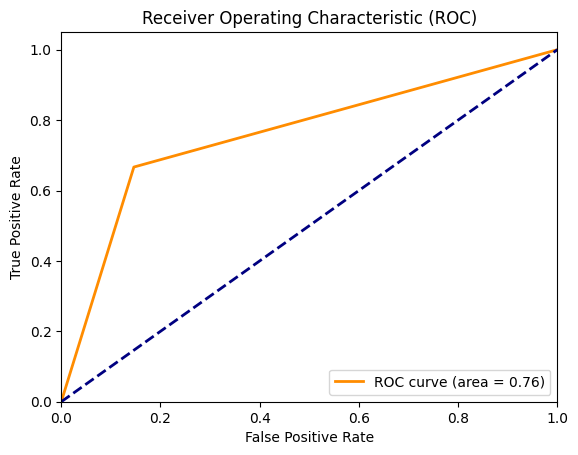

In [224]:
# Calculate precision
precision = precision_score(y_test, PIDD_lr_pred4)
print("Precision:", precision)

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, PIDD_lr_pred4)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Based on the presented chart, post-application of SMOTE, the ROC curve exhibits an area under the curve (AUC) of 0.76 on the testing set, indicating a good level of discriminative ability for the classification model in this case. In other words, the classifier demonstrates a good ability to distinguish between positive and negative instances.

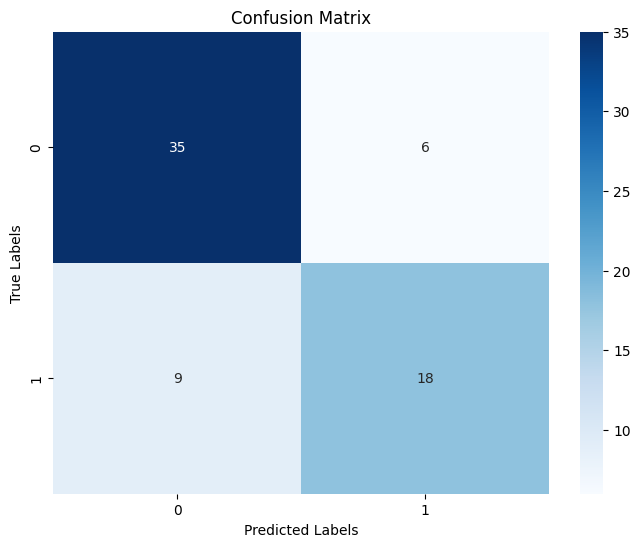

In [225]:
# Confusion Matrix
cm = confusion_matrix(y_test, PIDD_lr_pred4)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, post-application of SMOTE, the logistic regression classifier correctly classified 35 instances out of 41 for the '0' class and correctly classified 18 instances out of 27 for the '1' class on the testing set.

## Training and Predictions with a Support Vector Machine Classifier

In [226]:
# Create an SVM model
PIDD_svm_classifier = SVC()

In [227]:
# Fit the model to the training data
PIDD_svm_classifier.fit(X_train_scaled2, y_train_resampled)

SVC()

### Make Predictions

In [228]:
# Perform predictions using the SVM Classifier on the test data
PIDD_svc_pred = PIDD_svm_classifier.predict(X_test_scaled2)

### Model Evaluation

In [229]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, PIDD_svc_pred)
precision = precision_score(y_test, PIDD_svc_pred)
recall = recall_score(y_test, PIDD_svc_pred)
f1 = f1_score(y_test, PIDD_svc_pred)

# Classification Report
classification_rep = classification_report(y_test, PIDD_svc_pred)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, PIDD_svc_pred)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.75
Precision: 0.75
Recall: 0.5555555555555556
F1 Score: 0.6382978723404256
ROC AUC Score: 0.7168021680216803


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        41
           1       0.75      0.56      0.64        27

    accuracy                           0.75        68
   macro avg       0.75      0.72      0.72        68
weighted avg       0.75      0.75      0.74        68



According to the classification report, post-application of SMOTE, the Support Vector Machine classifier achieved an accuracy of 0.75, precision of 0.75, recall of 0.56, F1-score of 0.64, and ROC AUC score of 0.72 on the testing set. 

Precision: 0.75


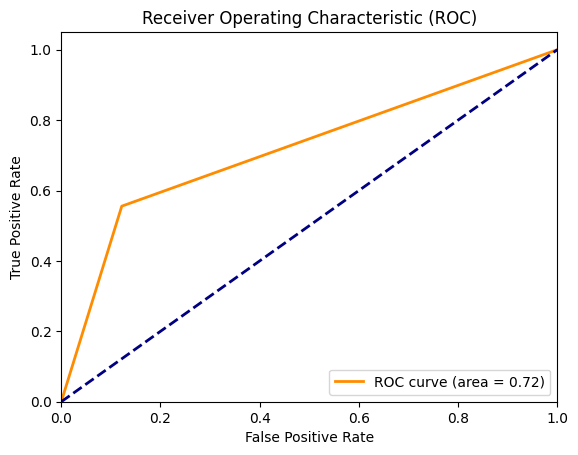

In [230]:
# Calculate precision
precision = precision_score(y_test, PIDD_svc_pred)
print("Precision:", precision)

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, PIDD_svc_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Based on the presented chart, post-application of SMOTE, the ROC curve exhibits an area under the curve (AUC) of 0.72 on the testing set, indicating a good level of discriminative ability for the classification model in this case. In other words, the classifier demonstrates a good ability to distinguish between positive and negative instances.

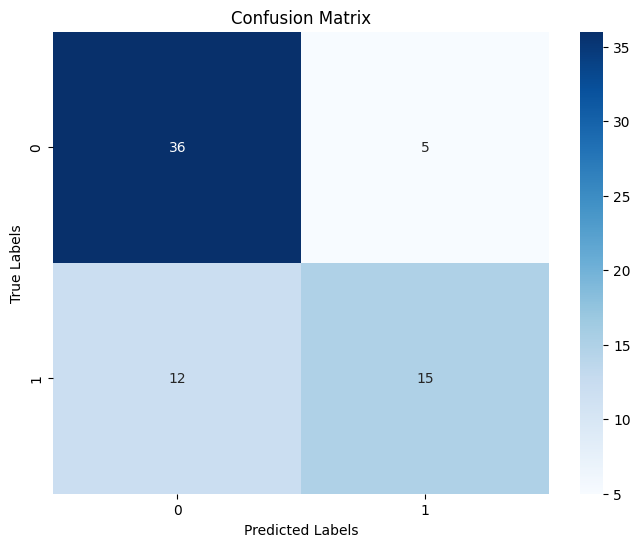

In [231]:
# Confusion Matrix
cm = confusion_matrix(y_test, PIDD_svc_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, post-application of SMOTE, the Support Vector Machine classifier correctly classified 36 instances out of 41 for the '0' class and correctly classified 15 instances out of 27 for the '1' class on the testing set.

## Training and Predictions with a Random Forest Classifier

In [232]:
# Create an RF model
PIDD_rf_classifier = RandomForestClassifier()

In [233]:
# Fit the model to the resampled training data
PIDD_rf_classifier.fit(X_train_scaled2, y_train_resampled)

RandomForestClassifier()

### Make Predictions

In [234]:
# Perform predictions using the RF Classifier on the test data
PIDD_rf_pred = PIDD_rf_classifier.predict(X_test_scaled2)

### Model Evaluation

In [235]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, PIDD_rf_pred)
precision = precision_score(y_test, PIDD_rf_pred)
recall = recall_score(y_test, PIDD_rf_pred)
f1 = f1_score(y_test, PIDD_rf_pred)

# Classification Report
classification_rep = classification_report(y_test, PIDD_rf_pred)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, PIDD_rf_pred)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7647058823529411
Precision: 0.7391304347826086
Recall: 0.6296296296296297
F1 Score: 0.68
ROC AUC Score: 0.7416440831074979


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        41
           1       0.74      0.63      0.68        27

    accuracy                           0.76        68
   macro avg       0.76      0.74      0.75        68
weighted avg       0.76      0.76      0.76        68



According to the classification report, post-application of SMOTE, the Random Forest classifier achieved an accuracy of 0.79, precision of 0.81, recall of 0.63, F1-score of 0.71, and ROC AUC score of 0.77 on the testing set. 

Precision: 0.7391304347826086


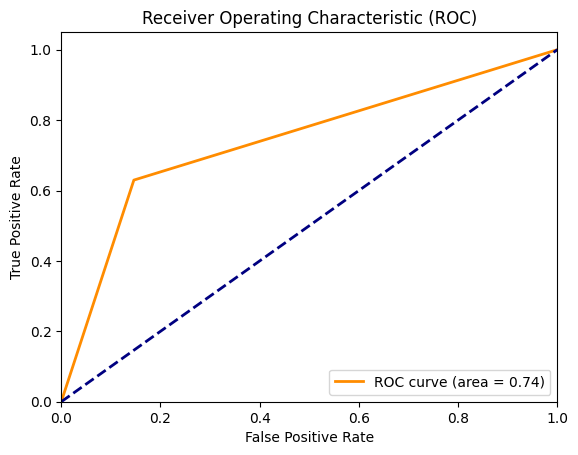

In [236]:
# Calculate precision
precision = precision_score(y_test, PIDD_rf_pred)
print("Precision:", precision)

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, PIDD_rf_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Based on the presented chart, post-application of SMOTE, the ROC curve exhibits an area under the curve (AUC) of 0.77 on the testing set, indicating a good level of discriminative ability for the classification model in this case. In other words, the classifier demonstrates a good ability to distinguish between positive and negative instances.

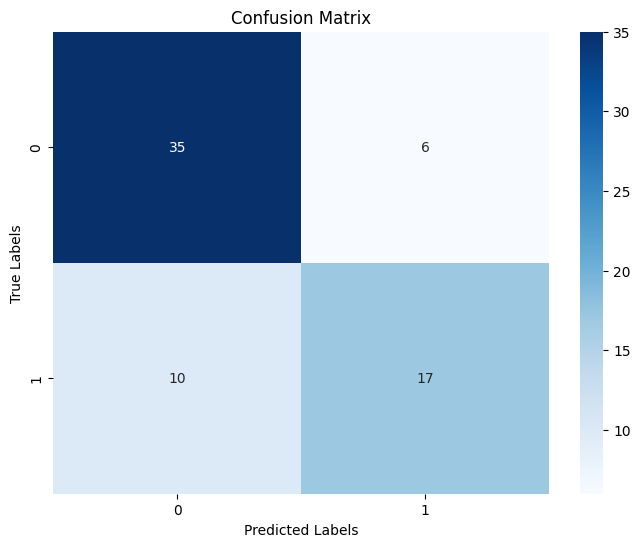

In [237]:
# Confusion Matrix
cm = confusion_matrix(y_test, PIDD_rf_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, post-application of SMOTE, the Random Forest classifier correctly classified 37 instances out of 41 for the '0' class and correctly classified 17 instances out of 27 for the '1' class on the testing set.

## Training and Predictions with a XGBoost Classifier

In [238]:
# Create an XGBoost model
PIDD_xgboost_classifier = XGBClassifier()

In [239]:
# Fit the model to the resampled training data
PIDD_xgboost_classifier.fit(X_train_scaled2, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Make Predictions

In [240]:
# Perform predictions using the XGBoost Classifier on the test data
PIDD_xgboost_pred = PIDD_xgboost_classifier.predict(X_test_scaled2)

### Model Evaluation

In [241]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, PIDD_xgboost_pred)
precision = precision_score(y_test, PIDD_xgboost_pred)
recall = recall_score(y_test, PIDD_xgboost_pred)
f1 = f1_score(y_test, PIDD_xgboost_pred)

# Classification Report
classification_rep = classification_report(y_test, PIDD_xgboost_pred)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, PIDD_xgboost_pred)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7794117647058824
Precision: 0.8
Recall: 0.5925925925925926
F1 Score: 0.6808510638297872
ROC AUC Score: 0.7475158084914183


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        41
           1       0.80      0.59      0.68        27

    accuracy                           0.78        68
   macro avg       0.79      0.75      0.76        68
weighted avg       0.78      0.78      0.77        68



According to the classification report, post-application of SMOTE, the XGBoost classifier achieved an accuracy of 0.78, precision of 0.80, recall of 0.59, F1-score of 0.68, and ROC AUC score of 0.75 on the testing set. 

Precision: 0.8


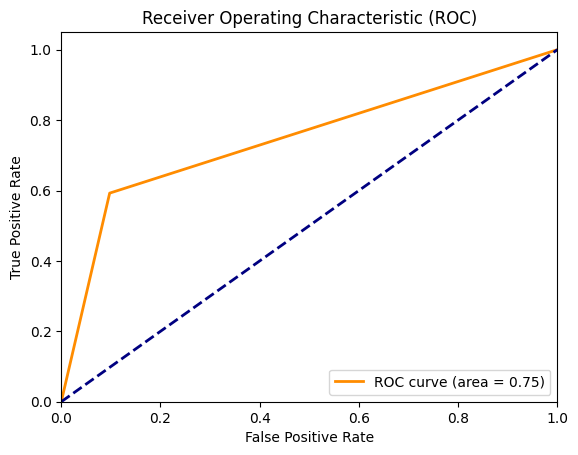

In [242]:
# Calculate precision
precision = precision_score(y_test, PIDD_xgboost_pred)
print("Precision:", precision)

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, PIDD_xgboost_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Based on the presented chart, post-application of SMOTE, the ROC curve exhibits an area under the curve (AUC) of 0.75 on the testing set, indicating a good level of discriminative ability for the classification model in this case. In other words, the classifier demonstrates a good ability to distinguish between positive and negative instances.

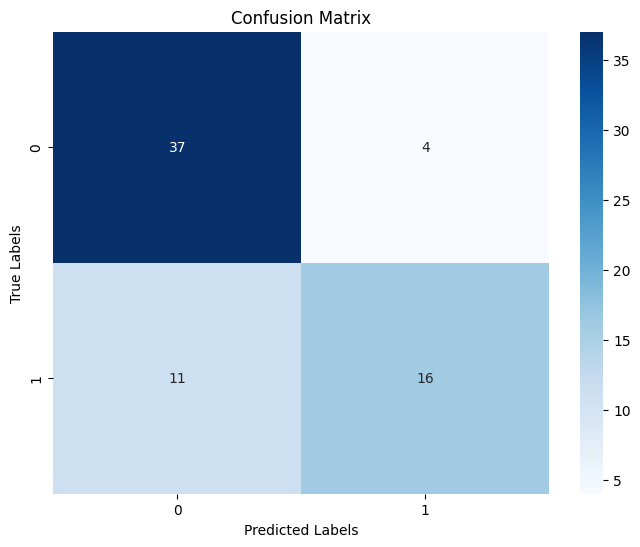

In [243]:
# Confusion Matrix
cm = confusion_matrix(y_test, PIDD_xgboost_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, post-application of SMOTE, the XGBoost classifier correctly classified 37 instances out of 41 for the '0' class and correctly classified 16 instances out of 27 for the '1' class on the testing set.

## Training and Predictions with a AdaBoost Classifier

In [244]:
# Create an AdaBoost model
PIDD_adaboost_classifier = AdaBoostClassifier()

In [245]:
# Fit the model to the resampled training data
PIDD_adaboost_classifier.fit(X_train_scaled2, y_train_resampled)

AdaBoostClassifier()

### Make Predictions

In [246]:
# Perform predictions using the AdaBoost Classifier on the test data
PIDD_adaboost_pred = PIDD_adaboost_classifier.predict(X_test_scaled2)

### Model Evaluation

In [247]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, PIDD_adaboost_pred)
precision = precision_score(y_test, PIDD_adaboost_pred)
recall = recall_score(y_test, PIDD_adaboost_pred)
f1 = f1_score(y_test, PIDD_adaboost_pred)

# Classification Report
classification_rep = classification_report(y_test, PIDD_adaboost_pred)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, PIDD_adaboost_pred)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7941176470588235
Precision: 0.7407407407407407
Recall: 0.7407407407407407
F1 Score: 0.7407407407407407
ROC AUC Score: 0.7850045167118338


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        41
           1       0.74      0.74      0.74        27

    accuracy                           0.79        68
   macro avg       0.79      0.79      0.79        68
weighted avg       0.79      0.79      0.79        68



According to the classification report, post-application of SMOTE, the AdaBoost classifier achieved an accuracy of 0.79, precision of 0.74, recall of 0.74, F1-score of 0.74, and ROC AUC score of 0.79 on the testing set. 

Precision: 0.7407407407407407


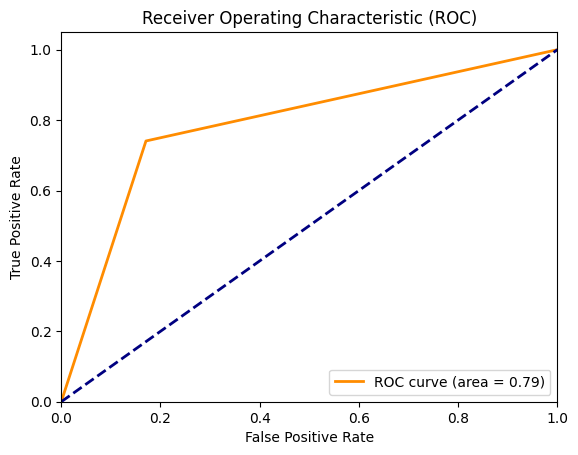

In [248]:
# Calculate precision
precision = precision_score(y_test, PIDD_adaboost_pred)
print("Precision:", precision)

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, PIDD_adaboost_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Based on the presented chart, post-application of SMOTE, the ROC curve exhibits an area under the curve (AUC) of 0.79 on the testing set, indicating a good level of discriminative ability for the classification model in this case. In other words, the classifier demonstrates a good ability to distinguish between positive and negative instances.

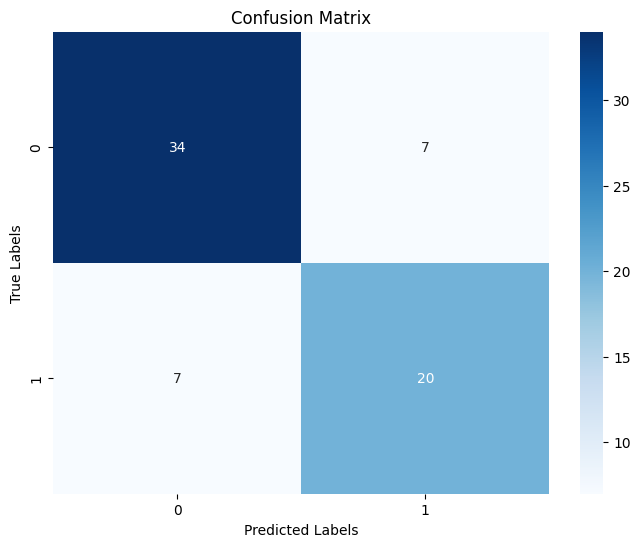

In [249]:
# Confusion Matrix
cm = confusion_matrix(y_test, PIDD_adaboost_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, post-application of SMOTE, the AdaBoost classifier correctly classified 34 instances out of 41 for the '0' class and correctly classified 20 instances out of 27 for the '1' class on the testing set.

## Developing Traditional Machine Learning Classifiers with the Use of Feature Selection, Specifically Random Forest Feature Importance, and Feature Extraction, Such as Linear Discriminant Analysis.

## Feature Selection: Random Forest Feature Importance 

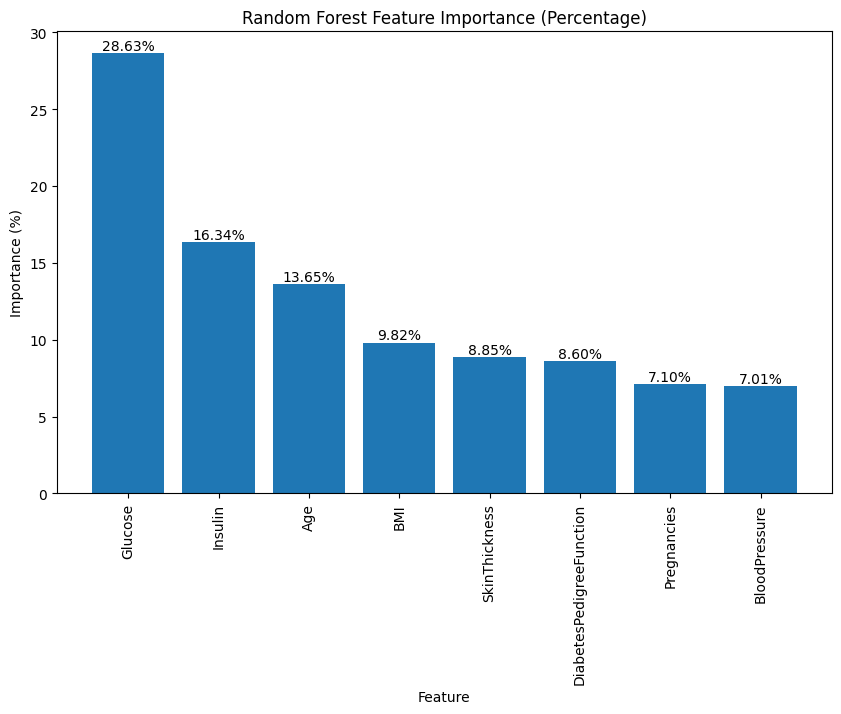

In [250]:
# Import necessary librarie# Initialize a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to your scaled dataset
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Convert feature importances to percentages
feature_importances_percentage = feature_importances * 100

# Sort indices based on feature importance
sorted_indices = feature_importances.argsort()[::-1]

# Check if X_train is a Pandas DataFrame
if isinstance(X_train, pd.DataFrame):
    # If X_train is a DataFrame, use the actual column names as feature names
    feature_names = X_train.columns
else:
    # If X_train is not a DataFrame (e.g., a NumPy array), create default feature names
    feature_names = ["Feature_" + str(i) for i in range(X_train.shape[1])]

# Plot feature importances as percentages with annotations
plt.figure(figsize=(10, 6))
bars = plt.bar(range(X_train_scaled.shape[1]), feature_importances_percentage[sorted_indices])
plt.xticks(range(X_train_scaled.shape[1]), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance (%)')
plt.title('Random Forest Feature Importance (Percentage)')

# Annotate each bar with its percentage
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.show()


According to the feature importance chart, Glucose is identified as the most influential factor in predicting the presence of diabetes among patients, contributing 28.63% to the predictive model. The other significant features and their respective contributions are Insulin (16.34%), Age (13.65%), BMI (9.82%), Skin Thickness (8.85%), Diabetes Pedigree Function (8.60%), Pregnancies (7.10%), and Blood Pressure (7.01%). This analysis highlights the importance of Glucose as the top predictor in the model.

## Feature Extraction: Linear Discriminant Analysis 

Linear Discriminant Analysis (LDA) will be applied to the top four features, namely Glucose, Insulin, Age, and BMI. LDA serves to transform these selected features into a new space, maximizing class separability while preserving the original number of selected features.

In [251]:
# Get the top four feature indices
top_feature_indices = sorted_indices[:4]

# Select the top four features from the original dataset
X_train_top_features = X_train.iloc[:, top_feature_indices]

# Split data into training and testing sets
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_train_top_features, y_train, test_size = 0.2, stratify = y_train, random_state = 0, shuffle = True)

# Initialize and fit LDA using only the top four features
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_lda, y_train_lda)

# Transform the training and testing sets using LDA
X_train_lda_transformed = lda.transform(X_train_lda)
X_test_lda_transformed = lda.transform(X_test_lda)

## Train a Logistic Regression Classifier (with LDA)

In [252]:
# Create a Logistic Regression Classifier for predicting PIDD 
PIDD_lda_lr_classifier = LogisticRegression()

In [253]:
# Fit the Logistic Regression Classifier on the LDA-transformed training datasets
PIDD_lda_lr_classifier.fit(X_train_lda_transformed, y_train_lda)

LogisticRegression()

### Make Predictions

In [254]:
# Make predictions on the training set
PIDD_pred_lr_lda = PIDD_lda_lr_classifier.predict(X_train_lda_transformed)

### Model Evaluation

In [255]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_train_lda, PIDD_pred_lr_lda)
precision = precision_score(y_train_lda, PIDD_pred_lr_lda)
recall = recall_score(y_train_lda, PIDD_pred_lr_lda)
f1 = f1_score(y_train_lda, PIDD_pred_lr_lda)

# Classification Report
classification_rep = classification_report(y_train_lda, PIDD_pred_lr_lda)

# ROC AUC Score 
roc_auc = roc_auc_score(y_train_lda, PIDD_pred_lr_lda)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8177570093457944
Precision: 0.7894736842105263
Recall: 0.7228915662650602
F1 Score: 0.7547169811320756
ROC AUC Score: 0.8003770808424538


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       131
           1       0.79      0.72      0.75        83

    accuracy                           0.82       214
   macro avg       0.81      0.80      0.80       214
weighted avg       0.82      0.82      0.82       214



Based on the classification report, the Logistic Regression classifier, enhanced with Linear Discriminant Analysis (LDA), achieved an accuracy of 0.82, precision of 0.79, recall of 0.72, F1-score of 0.75, and ROC AUC score of 0.80 on the training set.

Precision: 0.7894736842105263


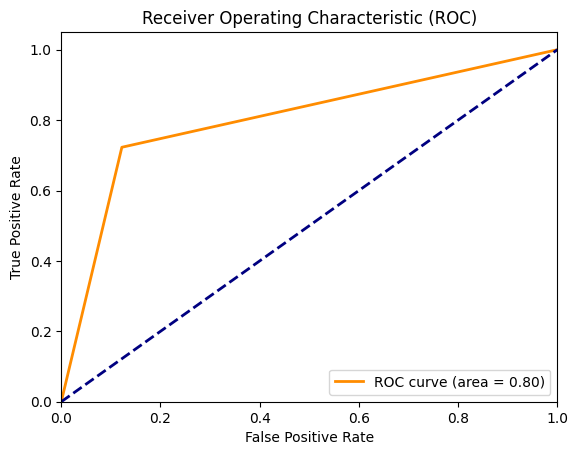

In [256]:
# Calculate precision
precision = precision_score(y_train_lda, PIDD_pred_lr_lda)
print("Precision:", precision)

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_train_lda, PIDD_pred_lr_lda)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Based on the presented chart, the Logistic Regression classifier, enhanced with Linear Discriminant Analysis (LDA), exhibits an ROC curve with an area under the curve (AUC) of 0.80 on the training set. In this case, with an AUC of 0.80, the discriminative ability is very good. It indicates that the classifier has a strong ability to distinguish between positive and negative instances on the traning set. 

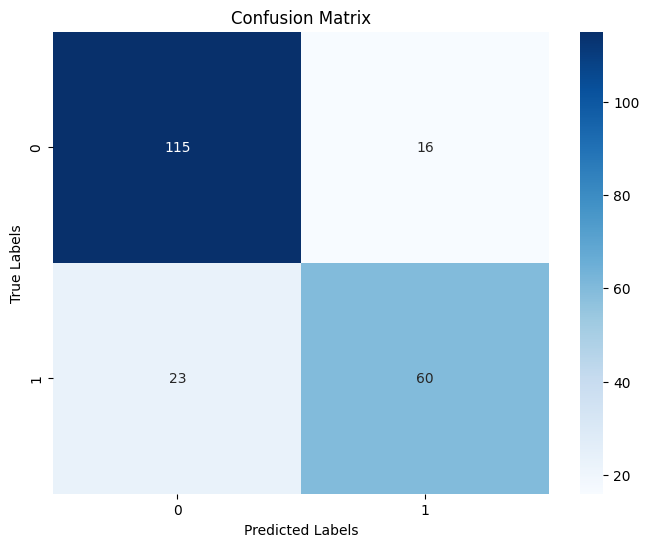

In [257]:
# Confusion Matrix
cm = confusion_matrix(y_train_lda, PIDD_pred_lr_lda)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, the Logistic Regression classifier, enhanced with LDA correctly classified 115 instances out of 131 for the '0' class and correctly classified 60 instances out of 83 for the '1' class on the training set.

### Make Predictions

In [258]:
# Make predictions on the testing set
PIDD_pred_lr_lda2 = PIDD_lda_lr_classifier.predict(X_test_lda_transformed)

### Model Evaluation

In [259]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test_lda, PIDD_pred_lr_lda2)
precision = precision_score(y_test_lda, PIDD_pred_lr_lda2)
recall = recall_score(y_test_lda, PIDD_pred_lr_lda2)
f1 = f1_score(y_test_lda, PIDD_pred_lr_lda2)

# Classification Report
classification_rep = classification_report(y_test_lda, PIDD_pred_lr_lda2)

# ROC AUC Score
roc_auc = roc_auc_score(y_test_lda, PIDD_pred_lr_lda2)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8703703703703703
Precision: 0.8181818181818182
Recall: 0.8571428571428571
F1 Score: 0.8372093023255814
ROC AUC Score: 0.867965367965368


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.82      0.86      0.84        21

    accuracy                           0.87        54
   macro avg       0.86      0.87      0.86        54
weighted avg       0.87      0.87      0.87        54



Based on the classification report, the Logistic Regression classifier, enhanced with Linear Discriminant Analysis (LDA), achieved an accuracy of 0.87, precision of 0.82, recall of 0.86, F1-score of 0.84, and ROC AUC score of 0.87 on the testing set.

Precision: 0.8181818181818182


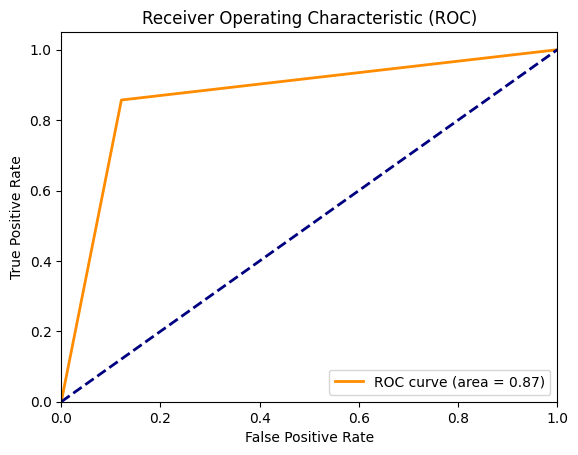

In [260]:
# Calculate precision
precision = precision_score(y_test_lda, PIDD_pred_lr_lda2)
print("Precision:", precision)

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test_lda, PIDD_pred_lr_lda2)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Based on the presented chart, the Logistic Regression model, enhanced with Linear Discriminant Analysis (LDA), exhibits an ROC curve with an area under the curve (AUC) of 0.87 on the testing set. In this case, with an AUC of 0.87, the discriminative ability is very good. It indicates that the classifier has a strong ability to distinguish between positive and negative instances on the testing set. 

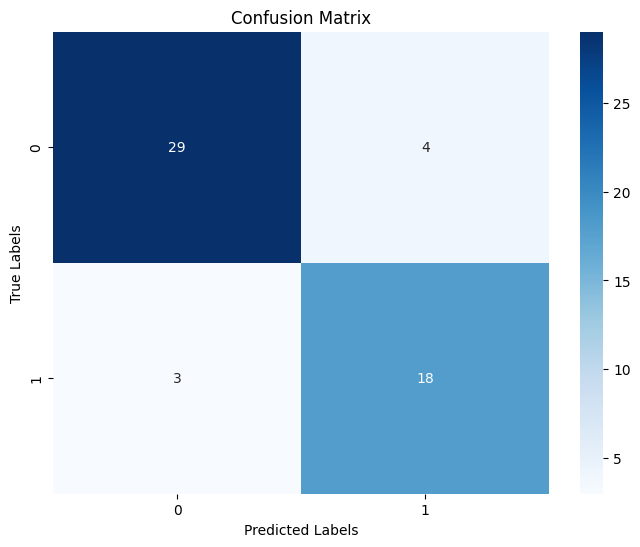

In [261]:
# Confusion Matrix
cm = confusion_matrix(y_test_lda, PIDD_pred_lr_lda2)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, the Logistic Regression classifier, enhanced with LDA correctly classified 29 instances out of 33 for the '0' class and correctly classified 18 instances out of 21 for the '1' class on the testing set.

### Applying SMOTE 

Here, we will apply SMOTE to balance the classes in the training set, which has been transformed using Linear Discriminant Analysis (LDA).

In [262]:
# Apply SMOTE to balance the classes in the LDA-transformed training set

# Create an instance of the SMOTE class
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to the original LDA-transformed training data
X_train_lda_resampled, y_train_lda_resampled = smote.fit_resample(X_train_lda_transformed, y_train_lda)

In [263]:
# View the dimension of X_train_lda_resampled
X_train_lda_resampled.shape

(262, 1)

In [264]:
# View the dimension of y_train_lda_resampled
y_train_lda_resampled.shape

(262,)

In [265]:
# View counts of series of unique values in 'y_train_lda_resampled'
y_train_lda_resampled.value_counts()

1    131
0    131
Name: Outcome, dtype: int64

In [266]:
# Standardize the features

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the resampled data
X_train_lda_resampled_scaled = scaler.fit_transform(X_train_lda_resampled)
X_test_lda_scaled = scaler.transform(X_test_lda_transformed)

### Retrain the Logistic Regression Classifier

In [267]:
# Create an instance of Logistic Regression
PIDD_lda_lr_classifier2 = LogisticRegression()

# Retrain the Logistic Regression model on the resampled and scaled data
PIDD_lda_lr_classifier2.fit(X_train_lda_resampled_scaled, y_train_lda_resampled)

LogisticRegression()

### Make Predictions

In [268]:
# Make predictions on the training set
PIDD_pred_lr_lda3 = PIDD_lda_lr_classifier2.predict(X_train_lda_resampled_scaled)

### Model Evaluation

In [269]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_train_lda_resampled, PIDD_pred_lr_lda3)
precision = precision_score(y_train_lda_resampled, PIDD_pred_lr_lda3)
recall = recall_score(y_train_lda_resampled, PIDD_pred_lr_lda3)
f1 = f1_score(y_train_lda_resampled, PIDD_pred_lr_lda3)

# Classification Report
classification_rep = classification_report(y_train_lda_resampled, PIDD_pred_lr_lda3)

# ROC AUC Score
roc_auc = roc_auc_score(y_train_lda_resampled, PIDD_pred_lr_lda3)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7900763358778626
Precision: 0.796875
Recall: 0.7786259541984732
F1 Score: 0.7876447876447876
ROC AUC Score: 0.7900763358778626


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       131
           1       0.80      0.78      0.79       131

    accuracy                           0.79       262
   macro avg       0.79      0.79      0.79       262
weighted avg       0.79      0.79      0.79       262



Based on the classification report, post-application of SMOTE, the Logistic Regression classifier, enhanced with Linear Discriminant Analysis (LDA), achieved an accuracy of 0.79, precision of 0.80, recall of 0.78 F1-score of 0.79, and ROC AUC score of 0.79 on the training set.

Precision: 0.796875


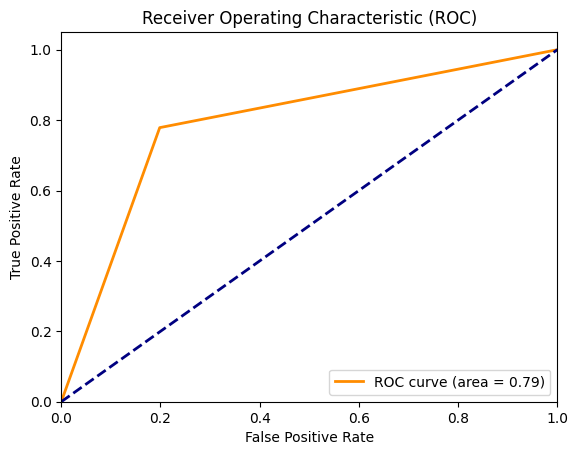

In [270]:
# Calculate precision
precision = precision_score(y_train_lda_resampled, PIDD_pred_lr_lda3)
print("Precision:", precision)

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_train_lda_resampled, PIDD_pred_lr_lda3)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Based on the presented chart, post-application of SMOTE, the Logistic Regression classifier, enhanced with Linear Discriminant Analysis (LDA), exhibits an ROC curve with an area under the curve (AUC) of 0.79 on the training set. In this case, with an AUC of 0.79, the discriminative ability is very good. It indicates that the classifier has a strong ability to distinguish between positive and negative instances on the training set. 

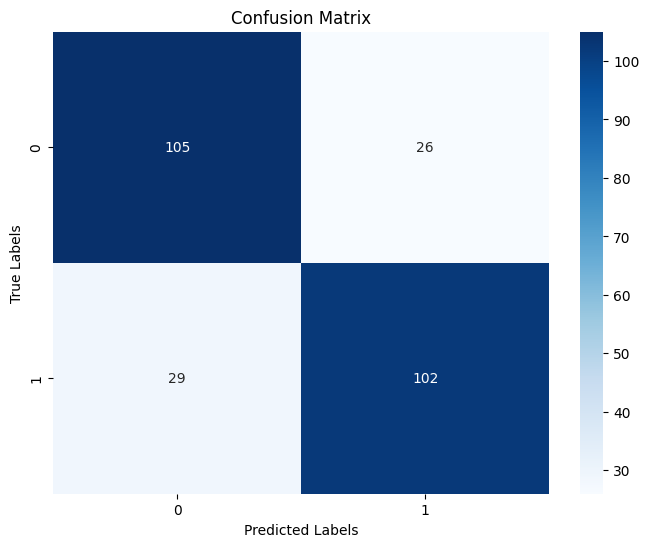

In [271]:
# Confusion Matrix
cm = confusion_matrix(y_train_lda_resampled, PIDD_pred_lr_lda3)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, post-application of SMOTE, the Logistic Regression classifier, enhanced with LDA correctly classified 105 instances out of 131 for the '0' class and correctly classified 102 instances out of 131 for the '1' class on the training set.

### Make Predictions

In [272]:
# Make predictions on the testing set
PIDD_pred_lr_lda4 = PIDD_lda_lr_classifier2.predict(X_test_lda_scaled)

### Model Evaluation

In [273]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test_lda, PIDD_pred_lr_lda4)
precision = precision_score(y_test_lda, PIDD_pred_lr_lda4)
recall = recall_score(y_test_lda, PIDD_pred_lr_lda4)
f1 = f1_score(y_test_lda, PIDD_pred_lr_lda4)

# Classification Report
classification_rep = classification_report(y_test_lda, PIDD_pred_lr_lda4)

# ROC AUC Score
roc_auc = roc_auc_score(y_test_lda, PIDD_pred_lr_lda4)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8888888888888888
Precision: 0.8260869565217391
Recall: 0.9047619047619048
F1 Score: 0.8636363636363636
ROC AUC Score: 0.8917748917748917


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.83      0.90      0.86        21

    accuracy                           0.89        54
   macro avg       0.88      0.89      0.88        54
weighted avg       0.89      0.89      0.89        54



Based on the classification report, post-application of SMOTE, the Logistic Regression classifier, enhanced with Linear Discriminant Analysis (LDA), achieved an accuracy of 0.89, precision of 0.83, recall of 0.90, F1-score of 0.86, and ROC AUC score of 0.89 on the testing set.

Precision: 0.8260869565217391


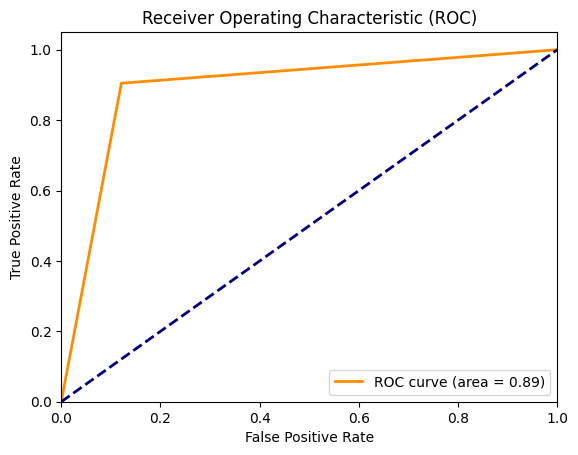

In [274]:
# Calculate precision
precision = precision_score(y_test_lda, PIDD_pred_lr_lda4)
print("Precision:", precision)

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test_lda, PIDD_pred_lr_lda4)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Based on the presented chart, post-application of SMOTE, the Logistic Regression classifier, enhanced with Linear Discriminant Analysis (LDA), exhibits an ROC curve with an area under the curve (AUC) of 0.89 on the testing set. In this case, with an AUC of 0.89, the discriminative ability is very good. It indicates that the classifier has a strong ability to distinguish between positive and negative instances on the testing set. 

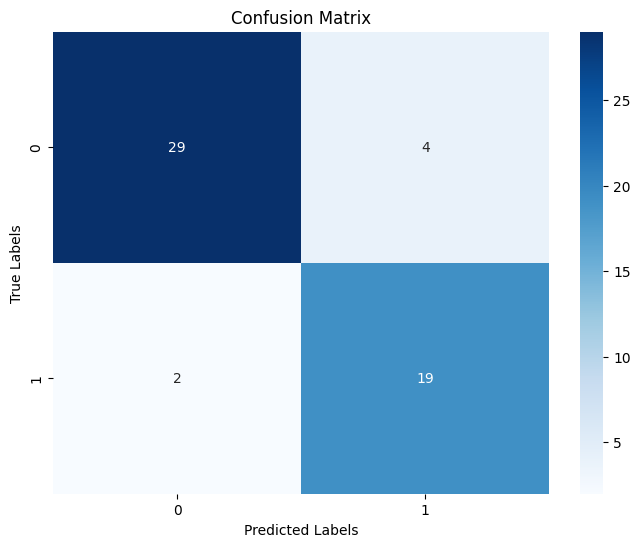

In [275]:
# Confusion Matrix
cm = confusion_matrix(y_test_lda, PIDD_pred_lr_lda4)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, post-application of SMOTE, the Logistic Regression classifier, enhanced with LDA correctly classified 29 instances out of 33 for the '0' class and correctly classified 19 instances out of 21 for the '1' class on the testing set.

## Training and Predictions with a Support Vector Machine Classifier

In [276]:
# Create an SVM model
PIDD_lda_svm_classifier = SVC()

In [277]:
# Fit the model to the resampled and scaled data
PIDD_lda_svm_classifier.fit(X_train_lda_resampled_scaled, y_train_lda_resampled)

SVC()

### Make Predictions

In [278]:
# Perform predictions using the SVM Classifier on the LDA-scaled test data
PIDD_pred_svm_lda = PIDD_lda_svm_classifier.predict(X_test_lda_scaled)

### Model Evaluation

In [279]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test_lda, PIDD_pred_svm_lda)
precision = precision_score(y_test_lda, PIDD_pred_svm_lda)
recall = recall_score(y_test_lda, PIDD_pred_svm_lda)
f1 = f1_score(y_test_lda, PIDD_pred_svm_lda)

# Classification Report
classification_rep = classification_report(y_test_lda, PIDD_pred_svm_lda)

# ROC AUC Score
roc_auc = roc_auc_score(y_test_lda, PIDD_pred_svm_lda)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8703703703703703
Precision: 0.8181818181818182
Recall: 0.8571428571428571
F1 Score: 0.8372093023255814
ROC AUC Score: 0.867965367965368


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.82      0.86      0.84        21

    accuracy                           0.87        54
   macro avg       0.86      0.87      0.86        54
weighted avg       0.87      0.87      0.87        54



Based on the classification report, post-application of SMOTE, the Support Vector Machine classifier, enhanced with Linear Discriminant Analysis (LDA), achieved an accuracy of 0.87, precision of 0.82, recall of 0.86, F1-score of 0.84, and ROC AUC score of 0.87 on the testing set.

Precision: 0.8181818181818182


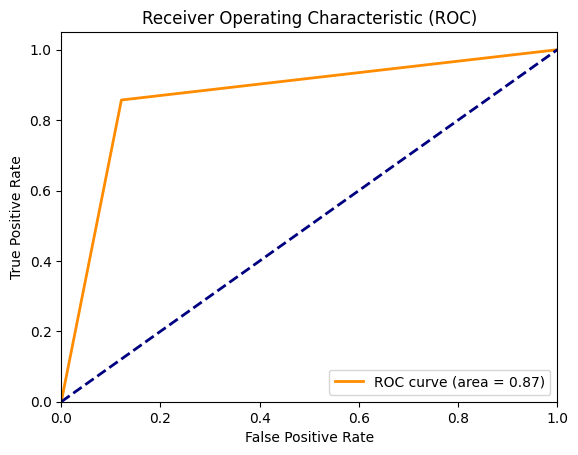

In [280]:
# Calculate precision
precision = precision_score(y_test_lda, PIDD_pred_svm_lda)
print("Precision:", precision)

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test_lda, PIDD_pred_svm_lda)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Based on the presented chart, post-application of SMOTE, the Support Vector Machine classifier, enhanced with Linear Discriminant Analysis (LDA), exhibits an ROC curve with an area under the curve (AUC) of 0.87 on the testing set. In this case, with an AUC of 0.87, an ROC AUC (Receiver Operating Characteristic Area Under the Curve) score of 0.71 indicates a very good level of discriminative ability for the classification model. It suggests that it has a strong ability to distinguish between positive and negative instances. 

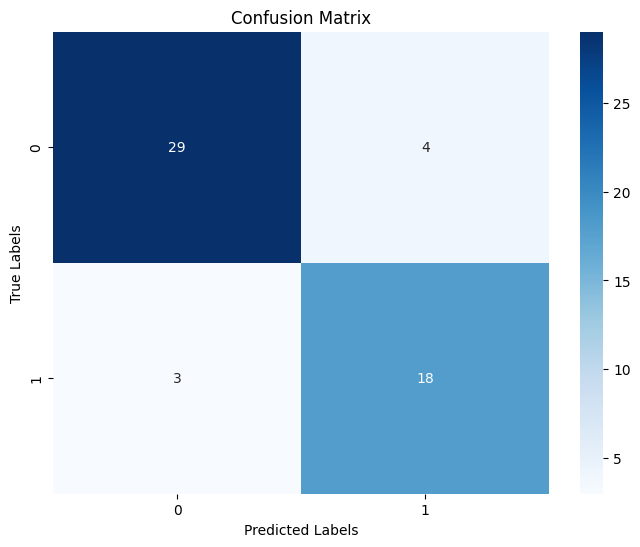

In [281]:
# Confusion Matrix
cm = confusion_matrix(y_test_lda, PIDD_pred_svm_lda)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, post-application of SMOTE, the Support Vector Machine classifier, enhanced with LDA correctly classified 29 instances out of 33 for the '0' class and correctly classified 18 instances out of 21 for the '1' class on the testing set.

## Training and Predictions with a Random Forest Classifier

In [282]:
# Create an RF model
PIDD_lda_rf_classifier = RandomForestClassifier()

In [283]:
# Fit the model to the resampled and scaled data
PIDD_lda_rf_classifier.fit(X_train_lda_resampled_scaled, y_train_lda_resampled)

RandomForestClassifier()

### Make Predictions

In [284]:
# Perform predictions using the RF Classifier on the LDA-scaled test data
PIDD_pred_rf_lda = PIDD_lda_rf_classifier.predict(X_test_lda_scaled)

### Model Evaluation

In [285]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test_lda, PIDD_pred_rf_lda)
precision = precision_score(y_test_lda, PIDD_pred_rf_lda)
recall = recall_score(y_test_lda, PIDD_pred_rf_lda)
f1 = f1_score(y_test_lda, PIDD_pred_rf_lda)

# Classification Report
classification_rep = classification_report(y_test_lda, PIDD_pred_rf_lda)

# ROC AUC Score
roc_auc = roc_auc_score(y_test_lda, PIDD_pred_rf_lda)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8333333333333334
Precision: 0.8
Recall: 0.7619047619047619
F1 Score: 0.7804878048780488
ROC AUC Score: 0.8203463203463204


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        33
           1       0.80      0.76      0.78        21

    accuracy                           0.83        54
   macro avg       0.83      0.82      0.82        54
weighted avg       0.83      0.83      0.83        54



Based on the classification report, post-application of SMOTE, the Random Forest classifier, enhanced with Linear Discriminant Analysis (LDA), achieved an accuracy of 0.83, precision of 0.80, recall of 0.76, F1-score of 0.78, and ROC AUC score of 0.82 on the testing set.

Precision: 0.8


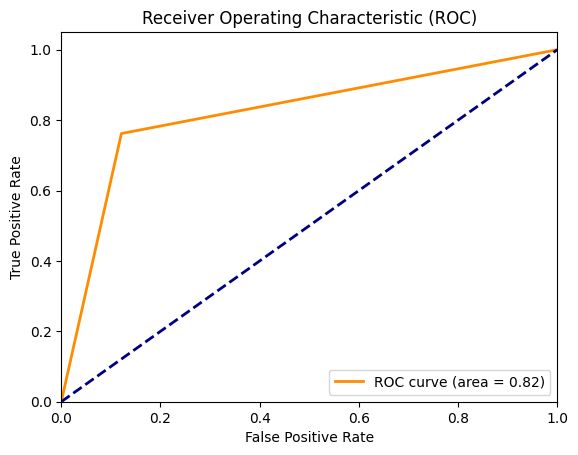

In [286]:
# Calculate precision
precision = precision_score(y_test_lda, PIDD_pred_rf_lda)
print("Precision:", precision)

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test_lda, PIDD_pred_rf_lda)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Based on the presented chart, post-application of SMOTE, the Random Forest classifier, enhanced with Linear Discriminant Analysis (LDA), exhibits an ROC curve with an area under the curve (AUC) of 0.82 on the testing set. In this case, with an AUC of 0.82, indicates a very good level of discriminative ability for the classification model. It suggests that it has a strong ability to distinguish between positive and negative instances. 

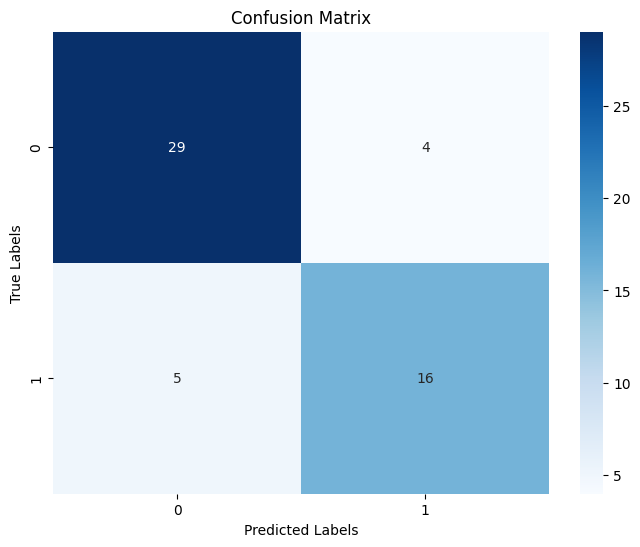

In [287]:
# Confusion Matrix
cm = confusion_matrix(y_test_lda, PIDD_pred_rf_lda)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, post-application of SMOTE, the Random Forest classifier, enhanced with LDA correctly classified 29 instances out of 33 for the '0' class and correctly classified 16 instances out of 21 for the '1' class on the testing set.

## Training and Predictions with an XGBoost Classifier

In [288]:
# Create an instance of the XGBClassifier
PIDD_lda_xgb_classifier = XGBClassifier()

In [289]:
# Fit the model to the resampled and scaled data
PIDD_lda_xgb_classifier.fit(X_train_lda_resampled_scaled, y_train_lda_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Make Predictions

In [290]:
# Perform predictions using the XGB Classifier on the LDA-scaled test data
PIDD_pred_xgb_lda = PIDD_lda_xgb_classifier.predict(X_test_lda_scaled)

### Model Evaluation

In [291]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test_lda, PIDD_pred_xgb_lda)
precision = precision_score(y_test_lda, PIDD_pred_xgb_lda)
recall = recall_score(y_test_lda, PIDD_pred_xgb_lda)
f1 = f1_score(y_test_lda, PIDD_pred_xgb_lda)

# Classification Report
classification_rep = classification_report(y_test_lda, PIDD_pred_xgb_lda)

# ROC AUC Score
roc_auc = roc_auc_score(y_test_lda, PIDD_pred_xgb_lda)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8333333333333334
Precision: 0.8
Recall: 0.7619047619047619
F1 Score: 0.7804878048780488
ROC AUC Score: 0.8203463203463204


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        33
           1       0.80      0.76      0.78        21

    accuracy                           0.83        54
   macro avg       0.83      0.82      0.82        54
weighted avg       0.83      0.83      0.83        54



Based on the classification report, post-application of SMOTE, the XGBoost classifier, enhanced with Linear Discriminant Analysis (LDA), achieved an accuracy of 0.83, precision of 0.80, recall of 0.76, F1-score of 0.78, and ROC AUC score of 0.82 on the testing set.

Precision: 0.8


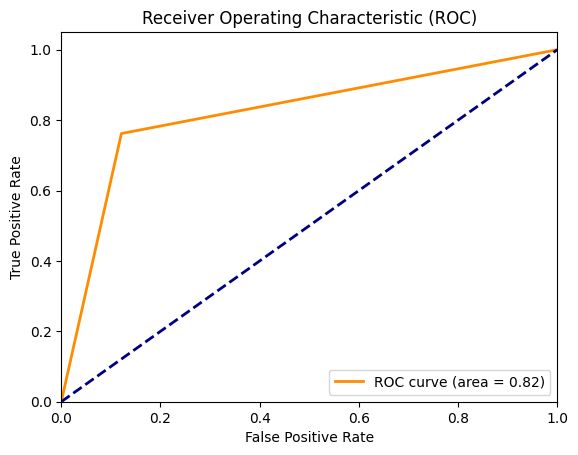

In [292]:
# Calculate precision
precision = precision_score(y_test_lda, PIDD_pred_xgb_lda)
print("Precision:", precision)

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test_lda, PIDD_pred_xgb_lda)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Based on the presented chart, post-application of SMOTE, the XGBoost classifier, enhanced with Linear Discriminant Analysis (LDA), exhibits an ROC curve with an area under the curve (AUC) of 0.82 on the testing set. In this case, with an AUC of 0.82, indicates a very good discriminative ability for the classification model. It suggests that it has a strong ability to distinguish between positive and negative instances.

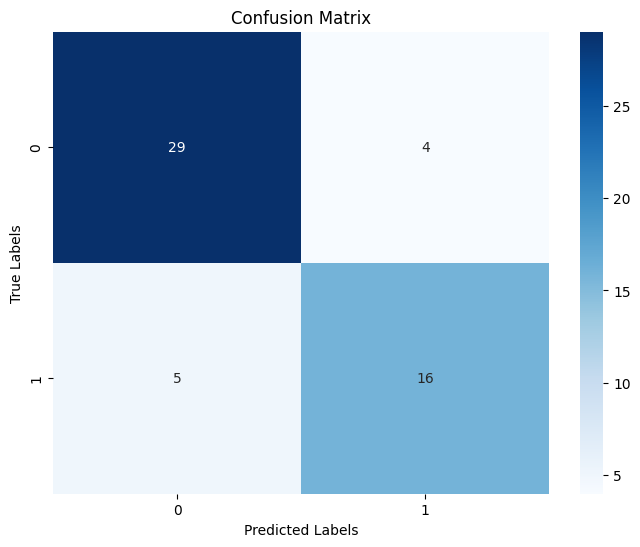

In [293]:
# Confusion Matrix
cm = confusion_matrix(y_test_lda, PIDD_pred_xgb_lda)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, post-application of SMOTE, the XGBoost classifier, enhanced with LDA correctly classified 29 instances out of 33 for the '0' class and correctly classified 16 instances out of 21 for the '1' class on the testing set.

## Training and Predictions with an AdaBoost Classifier

In [294]:
# Create an instance of the XGBClassifier
PIDD_lda_adaboost_classifier = AdaBoostClassifier()

In [295]:
# Fit the model to the resampled and scaled data
PIDD_lda_adaboost_classifier.fit(X_train_lda_resampled_scaled, y_train_lda_resampled)

AdaBoostClassifier()

### Make Predictions

In [296]:
# Perform predictions using the XGB Classifier on the LDA-scaled test data
PIDD_pred_adaboost_lda = PIDD_lda_adaboost_classifier.predict(X_test_lda_scaled)

### Model Evaluation

In [297]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test_lda, PIDD_pred_adaboost_lda)
precision = precision_score(y_test_lda, PIDD_pred_adaboost_lda)
recall = recall_score(y_test_lda, PIDD_pred_adaboost_lda)
f1 = f1_score(y_test_lda, PIDD_pred_adaboost_lda)

# Classification Report
classification_rep = classification_report(y_test_lda, PIDD_pred_adaboost_lda)

# ROC AUC Score
roc_auc = roc_auc_score(y_test_lda, PIDD_pred_adaboost_lda)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8148148148148148
Precision: 0.7894736842105263
Recall: 0.7142857142857143
F1 Score: 0.7500000000000001
ROC AUC Score: 0.7965367965367965


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        33
           1       0.79      0.71      0.75        21

    accuracy                           0.81        54
   macro avg       0.81      0.80      0.80        54
weighted avg       0.81      0.81      0.81        54



Based on the classification report, post-application of SMOTE, the AdaBoost classifier, enhanced with Linear Discriminant Analysis (LDA), achieved an accuracy of 0.81, precision of 0.79, recall of 0.71, F1-score of 0.75 and ROC AUC score of 0.80 on the testing set.

Precision: 0.7894736842105263


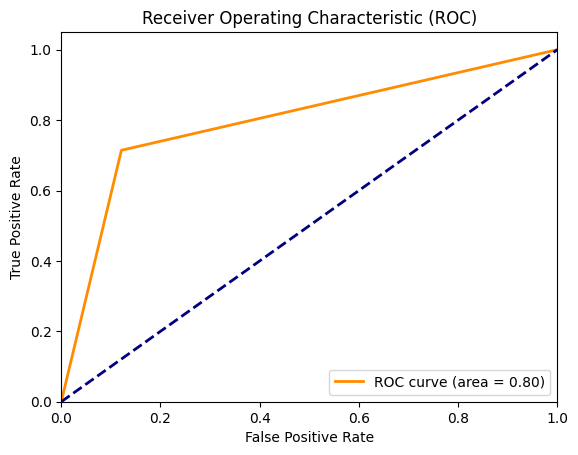

In [298]:
# Calculate precision
precision = precision_score(y_test_lda, PIDD_pred_adaboost_lda)
print("Precision:", precision)

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test_lda, PIDD_pred_adaboost_lda)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Based on the presented chart, post-application of SMOTE, the AdaBoost classifier, enhanced with Linear Discriminant Analysis (LDA), exhibits an ROC curve with an area under the curve (AUC) of 0.80 on the testing set. In this case, with an AUC of 0.80, indicates a very good level of discriminative ability for the classification model. It suggests that it has a strong ability to distinguish between positive and negative instances.

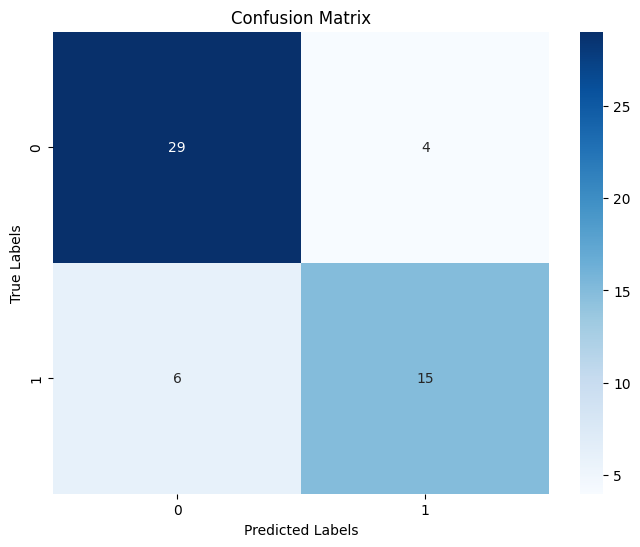

In [299]:
# Confusion Matrix
cm = confusion_matrix(y_test_lda, PIDD_pred_adaboost_lda)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, post-application of SMOTE, the AdaBoost classifier, enhanced with LDA correctly classified 29 instances out of 33 for the '0' class and correctly classified 15 instances out of 21 for the '1' class on the testing set.

**Interpretation**:

After conducting model evaluations, Logistic Regression classifier with SMOTE and enhanced Linear Discriminant Analysis (LDA) emerged as the top-performing model, exhibiting an impressive accuracy of 0.89 on the test set. This classifier also demonstrated high precision (0.83), recall (0.90), F1 score (0.86), and ROC AUC score (0.89). The classifier outperformed other candidates in the following order: Logistic Regression, Support Vector Classifier, Random Forest Classifier, XGBoost, and AdaBoost.

To further enhance model performance, a fine-tuning step using GridSearchCV is recommended. This involves systematically exploring hyperparameter combinations for each model. The grid search process aims to identify the optimal hyperparameters, thereby potentially improving the models' predictive capabilities.

The recommended order for fine-tuning is Logistic Regression, followed by Support Vector Machine Classifier, Random Forest Classifier, XGBoost, and AdaBoost. This systematic approach ensures that each classifier is optimized for its specific algorithmic characteristics.

Implementing GridSearchCV with an appropriate hyperparameter grid for each classifier can lead to refined classifiers with even higher predictive accuracy and robustness. This iterative refinement process contributes to the overall effectiveness of the machine learning classifier in addressing the specific challenges of the dataset.


## Hyperparameter Tuning

Here we shall use Grid Search with Cross Validation to find the best hyperparameters for each classifier

Cross Validation = 5

Here we wish to apply additional cross-validation to further assess the performance of our model using the best hyperparameters

In [300]:
# Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

model_lr = LogisticRegression()
grid_search_lr = GridSearchCV(model_lr, param_grid=param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train_lda_resampled_scaled, y_train_lda_resampled)

# Support Vector Classifier
param_grid_svc = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}

model_svc = SVC()
grid_search_svc = GridSearchCV(model_svc, param_grid=param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svc.fit(X_train_lda_resampled_scaled, y_train_lda_resampled)

# Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model_rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(model_rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_lda_resampled_scaled, y_train_lda_resampled)

# XGBoost
param_grid_xgb = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

model_xgb = XGBClassifier()
grid_search_xgb = GridSearchCV(model_xgb, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train_lda_resampled_scaled, y_train_lda_resampled)

# AdaBoost
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 1]
}

model_ada = AdaBoostClassifier()
grid_search_ada = GridSearchCV(model_ada, param_grid=param_grid_ada, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_ada.fit(X_train_lda_resampled_scaled, y_train_lda_resampled)

# Print the results
print(f"Best hyperparameters for Logistic Regression: {grid_search_lr.best_params_}")
print(f"Accuracy for Logistic Regression: {grid_search_lr.best_score_}")
print("\n")
print(f"Best hyperparameters for SVC: {grid_search_svc.best_params_}")
print(f"Accuracy for SVC: {grid_search_svc.best_score_}")
print("\n")
print(f"Best hyperparameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Accuracy for Random Forest: {grid_search_rf.best_score_}")
print("\n")
print(f"Best hyperparameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Accuracy for XGBoost: {grid_search_xgb.best_score_}")
print("\n")
print(f"Best hyperparameters for AdaBoost: {grid_search_ada.best_params_}")
print(f"Accuracy for AdaBoost: {grid_search_ada.best_score_}")

Best hyperparameters for Logistic Regression: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy for Logistic Regression: 0.7899129172714078


Best hyperparameters for SVC: {'C': 0.01, 'kernel': 'linear'}
Accuracy for SVC: 0.8090711175616836


Best hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy for Random Forest: 0.8132801161103048


Best hyperparameters for XGBoost: {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 50}
Accuracy for XGBoost: 0.836066763425254


Best hyperparameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 50}
Accuracy for AdaBoost: 0.7825108853410739


### Evaluation of Model's Performance on the Test Set

In [301]:
# Logistic Regression
best_lr_model = grid_search_lr.best_estimator_
lr_predictions = best_lr_model.predict(X_test_lda_scaled)
lr_accuracy = accuracy_score(y_test_lda, lr_predictions)

# Support Vector Classifier
best_svc_model = grid_search_svc.best_estimator_
svc_predictions = best_svc_model.predict(X_test_lda_scaled)
svc_accuracy = accuracy_score(y_test_lda, svc_predictions)

# Random Forest
best_rf_model = grid_search_rf.best_estimator_
rf_predictions = best_rf_model.predict(X_test_lda_scaled)
rf_accuracy = accuracy_score(y_test_lda, rf_predictions)

# XGBoost
best_xgb_model = grid_search_xgb.best_estimator_
xgb_predictions = best_xgb_model.predict(X_test_lda_scaled)
xgb_accuracy = accuracy_score(y_test_lda, xgb_predictions)

# AdaBoost
best_ada_model = grid_search_ada.best_estimator_
ada_predictions = best_ada_model.predict(X_test_lda_scaled)
ada_accuracy = accuracy_score(y_test_lda, ada_predictions)

# Print the test set accuracies
print(f"Test Accuracy for Logistic Regression: {lr_accuracy}")
print(f"Test Accuracy for SVC: {svc_accuracy}")
print(f"Test Accuracy for Random Forest: {rf_accuracy}")
print(f"Test Accuracy for XGBoost: {xgb_accuracy}")
print(f"Test Accuracy for AdaBoost: {ada_accuracy}")



Test Accuracy for Logistic Regression: 0.8888888888888888
Test Accuracy for SVC: 0.8888888888888888
Test Accuracy for Random Forest: 0.8518518518518519
Test Accuracy for XGBoost: 0.8148148148148148
Test Accuracy for AdaBoost: 0.8148148148148148


Based on accuracy, the XGBoost classifier has the highest accuracy according to GridsearchCV. However, the test accuracy for Logistic Regression and Support Vector Machine classifier is higher than that of XGBoost classifier. 

### Model Evaluation on Test Set: Additional Performamce Evaluation Metrics

Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.83      0.90      0.86        21

    accuracy                           0.89        54
   macro avg       0.88      0.89      0.88        54
weighted avg       0.89      0.89      0.89        54

Confusion Matrix:
[[29  4]
 [ 2 19]]
ROC AUC: 0.9639249639249639


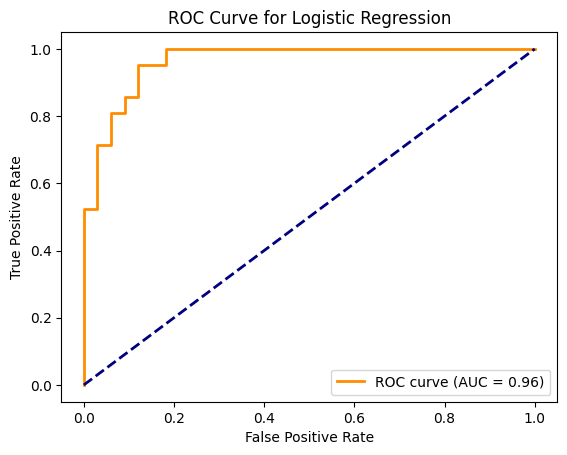

Model: SVC
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.90        33
           1       0.80      0.95      0.87        21

    accuracy                           0.89        54
   macro avg       0.88      0.90      0.89        54
weighted avg       0.90      0.89      0.89        54

Confusion Matrix:
[[28  5]
 [ 1 20]]
ROC AUC: 0.9639249639249639


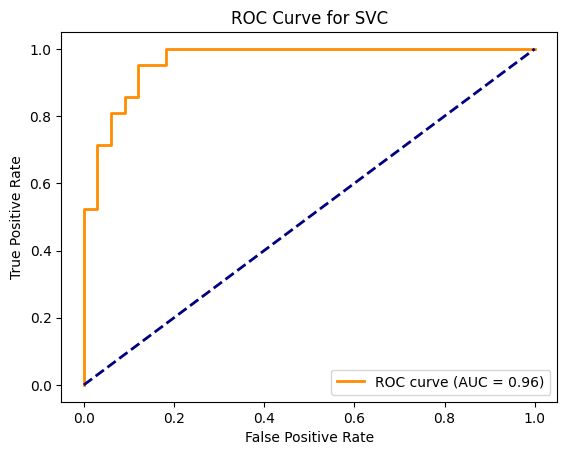

Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        33
           1       0.81      0.81      0.81        21

    accuracy                           0.85        54
   macro avg       0.84      0.84      0.84        54
weighted avg       0.85      0.85      0.85        54

Confusion Matrix:
[[29  4]
 [ 4 17]]
ROC AUC: 0.9242424242424242


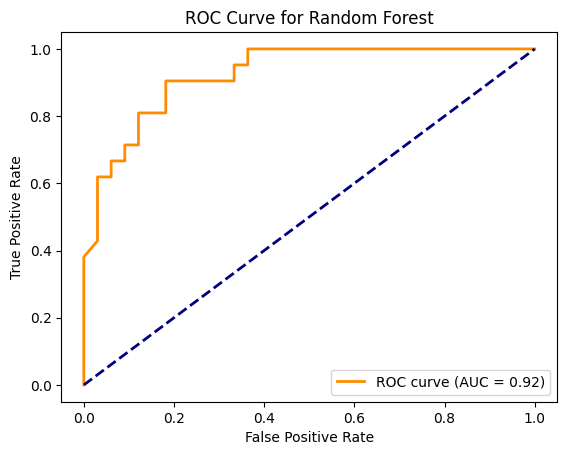

Model: XGBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        33
           1       0.79      0.71      0.75        21

    accuracy                           0.81        54
   macro avg       0.81      0.80      0.80        54
weighted avg       0.81      0.81      0.81        54

Confusion Matrix:
[[29  4]
 [ 6 15]]
ROC AUC: 0.9155844155844156


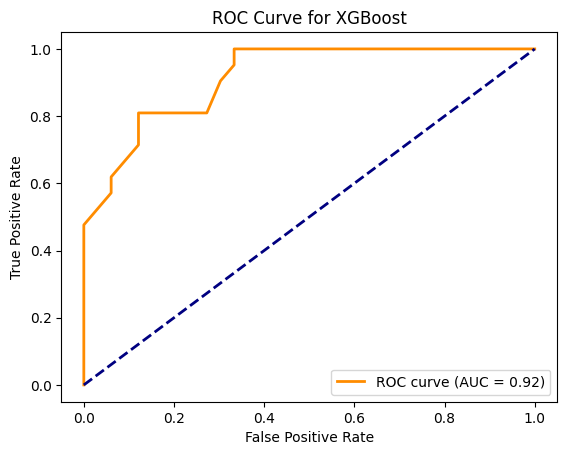

Model: AdaBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        33
           1       0.79      0.71      0.75        21

    accuracy                           0.81        54
   macro avg       0.81      0.80      0.80        54
weighted avg       0.81      0.81      0.81        54

Confusion Matrix:
[[29  4]
 [ 6 15]]
ROC AUC: 0.9264069264069263


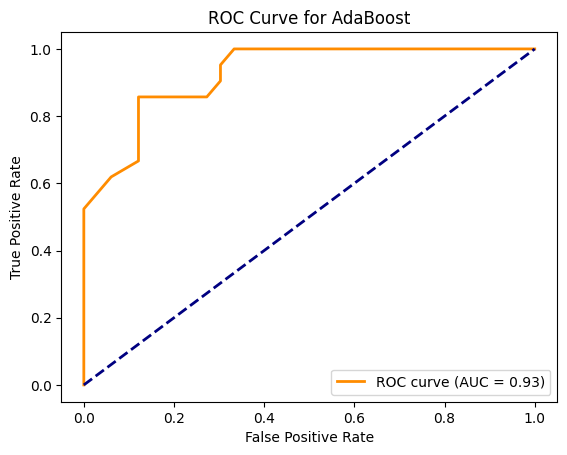

In [302]:
# Logistic Regression
best_lr_model = grid_search_lr.best_estimator_
lr_predictions = best_lr_model.predict(X_test_lda_scaled)
lr_probabilities = best_lr_model.predict_proba(X_test_lda_scaled)[:, 1]

# Support Vector Classifier
best_svc_model = grid_search_svc.best_estimator_
svc_predictions = best_svc_model.predict(X_test_lda_scaled)
svc_probabilities = best_svc_model.decision_function(X_test_lda_scaled)

# Random Forest
best_rf_model = grid_search_rf.best_estimator_
rf_predictions = best_rf_model.predict(X_test_lda_scaled)
rf_probabilities = best_rf_model.predict_proba(X_test_lda_scaled)[:, 1]

# XGBoost
best_xgb_model = grid_search_xgb.best_estimator_
xgb_predictions = best_xgb_model.predict(X_test_lda_scaled)
xgb_probabilities = best_xgb_model.predict_proba(X_test_lda_scaled)[:, 1]

# AdaBoost
best_ada_model = grid_search_ada.best_estimator_
ada_predictions = best_ada_model.predict(X_test_lda_scaled)
ada_probabilities = best_ada_model.predict_proba(X_test_lda_scaled)[:, 1]

# Function to print classification report, confusion matrix, and ROC AUC
def evaluate_model_performance(y_true, y_pred, y_prob, model_name):
    print(f"Model: {model_name}")
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    
    # Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    
    # ROC AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = roc_auc_score(y_true, y_prob)
    print(f"ROC AUC: {roc_auc}")
    
    # Plot ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"ROC Curve for {model_name}")
    plt.legend(loc="lower right")
    plt.show()

# Evaluate each model
evaluate_model_performance(y_test_lda, lr_predictions, lr_probabilities, "Logistic Regression")
evaluate_model_performance(y_test_lda, svc_predictions, svc_probabilities, "SVC")
evaluate_model_performance(y_test_lda, rf_predictions, rf_probabilities, "Random Forest")
evaluate_model_performance(y_test_lda, xgb_predictions, xgb_probabilities, "XGBoost")
evaluate_model_performance(y_test_lda, ada_predictions, ada_probabilities, "AdaBoost")


**Interpretation**:

Although Logistic Regression and Support Vector Classifier achieved the same accuracy of 0.89, a more detailed analysis considering metrics such as precision, recall, f1 score, and ROC AUC revealed that the Support Vector Classifier outperformed Logistic Regression. Specifically, the Support Vector Classifier demonstrated superior performance with a precision of 0.80, recall of 0.95, f1-score of 0.87, and ROC AUC of 0.96. Consequently, the overall ranking is as follows: Support Vector Machine, Logistic Regression, Random Forest, XGBoost, and AdaBoost (tied).   

### Evaluate Overall Best Model: Additional Cross-Validation (CV = 5)

In [303]:
# Define the classifier
best_model = SVC(C=0.01, kernel='linear')  # define hyperparameters

# Define the cross-validation strategy 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  

# Perform cross-validation and calculate accuracy scores
accuracy_scores = cross_val_score(best_model, X_train_lda_resampled_scaled, y_train_lda_resampled, cv=cv, scoring='accuracy')

# Display the accuracy scores for each fold
print("Accuracy Scores for Each Fold:", accuracy_scores)

# Calculate and display the mean and standard deviation of the accuracy scores
mean_accuracy = accuracy_scores.mean()
std_accuracy = accuracy_scores.std()
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)


Accuracy Scores for Each Fold: [0.86792453 0.86792453 0.80769231 0.76923077 0.73076923]
Mean Accuracy: 0.8087082728592163
Standard Deviation of Accuracy: 0.05412417126785809


**Intepretation:**

The SVM classifier, evaluated through stratified 5-fold cross-validation, demonstrates a mean accuracy of approximately 80.87%. The standard deviation of 0.0541 indicates consistent performance across different folds. This suggests that the classifier generalizes well to unseen data and provides stable and reliable predictions. In conclusion, the cross-validation results indicate that the SVM classifier is performing well in terms of accuracy. 

### Evaluate Overall Best Model: Additional Cross-Validation (CV = 10)

In [304]:
# Define the classifier
best_model = SVC(C=0.01, kernel='linear')  # define hyperparameters

# Define the cross-validation strategy 
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  

# Perform cross-validation and calculate accuracy scores
accuracy_scores = cross_val_score(best_model, X_train_lda_resampled_scaled, y_train_lda_resampled, cv=cv, scoring='accuracy')

# Display the accuracy scores for each fold
print("Accuracy Scores for Each Fold:", accuracy_scores)

# Calculate and display the mean and standard deviation of the accuracy scores
mean_accuracy = accuracy_scores.mean()
std_accuracy = accuracy_scores.std()
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)


Accuracy Scores for Each Fold: [0.85185185 0.88888889 0.88461538 0.80769231 0.76923077 0.80769231
 0.76923077 0.76923077 0.76923077 0.69230769]
Mean Accuracy: 0.8009971509971511
Standard Deviation of Accuracy: 0.057656420198229044


**Interpretation**:

The classifier's performance was evaluated using stratified 10-fold cross-validation, and the accuracy scores for each fold are as follows: [0.8519, 0.8889, 0.8846, 0.8077, 0.7692, 0.8077, 0.7692, 0.7692, 0.7692, 0.6923]. The mean accuracy across all folds is approximately 0.801, with a standard deviation of 0.058. This indicates that, on average, the SVM classifier achieves an accuracy of around 80.1%, and the performance across different folds is relatively consistent, as indicated by the moderate standard deviation.

## Building a Deep Neural Network (DNN) Classifier with the PID Dataset Preprocessed using Median Imputation

Here we will build our DNN with the PID dataset that was preprocessed using median imputation.

In [305]:
# Load the dataset
PIDD_median

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [306]:
# Count of series of unique values in target class 'Outcome'
PIDD_median["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [307]:
# Get data
X = PIDD_median[PIDD_median.columns[:-1]].values
y = PIDD_median[PIDD_median.columns[-1]].values

In [308]:
# Split data into training and testing set in ratio 80:20
# Split data into validation and testing set in ratio 50:50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [309]:
# Create a Sequential model
model = tf.keras.Sequential([
    # First hidden layer with 16 neurons and ReLU activation function
    tf.keras.layers.Dense(16, activation="relu"),

    # Second hidden layer with 16 neurons and ReLU activation function
    tf.keras.layers.Dense(16, activation="relu"),

    # Output layer with 1 neuron and sigmoid activation function for binary classification
    tf.keras.layers.Dense(1, activation="sigmoid")
])


In [310]:
# Define EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    verbose=1,            # Set to 1 for detailed logging
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

In [311]:
# Compile the model with optimizer 'Adam', loss function, and evaluation metric
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Adam optimizer with a learning rate of 0.001
    loss=tf.keras.losses.BinaryCrossentropy(),  # Binary crossentropy loss for binary classification
    metrics=["accuracy"]  # Evaluate model performance using accuracy metric
)


In [312]:
# Evaluate the model on the training set
evaluation_results = model.evaluate(X_train, y_train)
evaluation_results



20/20 [==============================] - 2s 4ms/step - loss: 4.0293 - accuracy: 0.5879


[4.029332637786865, 0.5879479050636292]

In [313]:
# Evaluate the model on the validation set
validation_results = model.evaluate(X_val, y_val)
validation_results

3/3 [==============================] - 0s 4ms/step - loss: 3.6357 - accuracy: 0.6104


[3.635694742202759, 0.6103895902633667]

In [314]:
# Train the model on the training set
# - Using a batch size of 16
# - Training for 20 epochs
# - Validating on the validation set
# - Utilizing the EarlyStopping callback
# - Setting verbose mode to 1 for progress updates
history = model.fit(
    X_train,
    y_train,
    batch_size=16,
    epochs=20,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],  
    verbose=1  #  1 for progress bar
)


Epoch 1/20
39/39 [==============================] - 3s 9ms/step - loss: 2.2076 - accuracy: 0.5537 - val_loss: 0.7660 - val_accuracy: 0.6494
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.6962 - accuracy: 0.6368 - val_loss: 0.5856 - val_accuracy: 0.7662
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.6325 - accuracy: 0.6889 - val_loss: 0.6244 - val_accuracy: 0.7403
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.6189 - accuracy: 0.6873 - val_loss: 0.5774 - val_accuracy: 0.7662
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5968 - accuracy: 0.7134 - val_loss: 0.6111 - val_accuracy: 0.7013
Epoch 6/20
39/39 [==============================] - 0s 4ms/step - loss: 0.6060 - accuracy: 0.6906 - val_loss: 0.5906 - val_accuracy: 0.7273
Epoch 7/20
39/39 [==============================] - 0s 4ms/step - loss: 0.5882 - accuracy: 0.7101 - val_loss: 0.5991 - val_accuracy: 0.7143
Epoch 7: early stopp

Summary:
    
The DNN classifier was trained on the PID dataset. Prior to training, the dataset underwent preprocessing, which included median imputation without standardization and Synthetic Minority Over-sampling Technique (SMOTE) with the following parameters:


- Optimizer: Adam
- Learning Rate: 0.001
- Batch Size: 16
- Epochs: 20
    
During training, early stopping was employed to prevent overfitting. The early stopping criteria were triggered after 3 epochs without improvement, and the model weights were reverted to those from the best epoch, which was epoch 4. At that point, the model achieved a Validation Loss of 0.5774, Validation Accuracy of 76.62%, and Training Accuracy of 68.73%. The training process was stopped after 7 epochs due to the early stopping criteria, ensuring that the best-performing model was retained.

In [315]:
# Evaluate the trained model on the test set
test_results = model.evaluate(X_test, y_test)
test_results

3/3 [==============================] - 0s 4ms/step - loss: 0.5998 - accuracy: 0.6623


[0.5997746586799622, 0.6623376607894897]

The DNN model achieved an accuracy of 0.6623 and a loss of 0.5998 on the testing set.

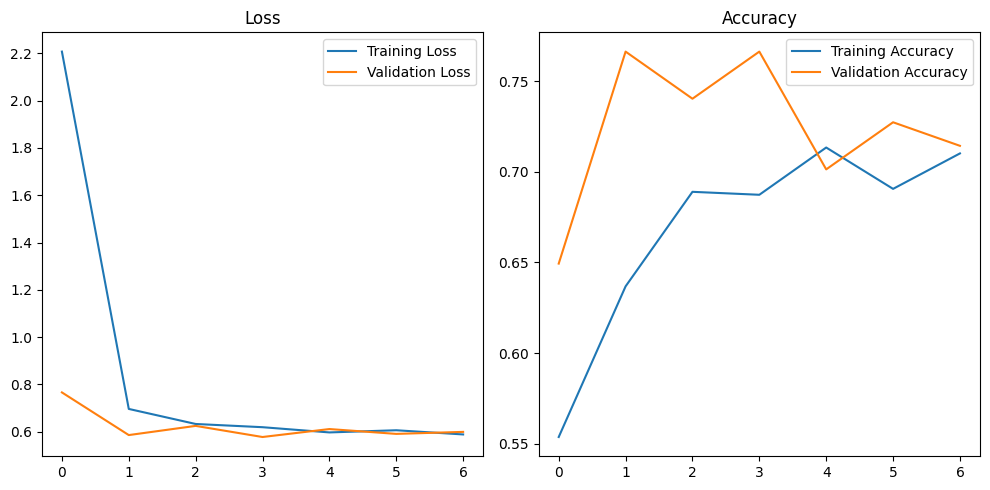

In [316]:
# Plot training history
plt.figure(figsize=(10, 5))

# Plot losses
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

# Plot accuracies
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Upon examining the accuracy and loss chart for the DNN classifier, a conspicuous sign of overfitting emerges at the 4th epoch. The classifier reached its peak validation accuracy at 76.62%, accompanied by a validation loss of 0.5774.

In [317]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve, classification_report

# Make predictions on the test set
y_prob = model.predict(X_test)

# Use a threshold to convert to class labels
threshold = 0.5
y_pred = (y_prob > threshold).astype(int)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)



# Classification Report
classification_rep = classification_report(y_test, y_pred)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)


3/3 [==============================] - 0s 6ms/step
Accuracy: 0.6623376623376623
Precision: 0.4
Recall: 0.2608695652173913
F1 Score: 0.31578947368421056
ROC AUC Score: 0.5471014492753623


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.83      0.78        54
           1       0.40      0.26      0.32        23

    accuracy                           0.66        77
   macro avg       0.56      0.55      0.55        77
weighted avg       0.63      0.66      0.64        77



Based on the classification report, without standardization and SMOTE, the DNN classifier achieved an accuracy of 0.66, precision of 0.40, recall of 0.26, F1-score of 0.32 and ROC AUC score of 0.55 on the testing set.

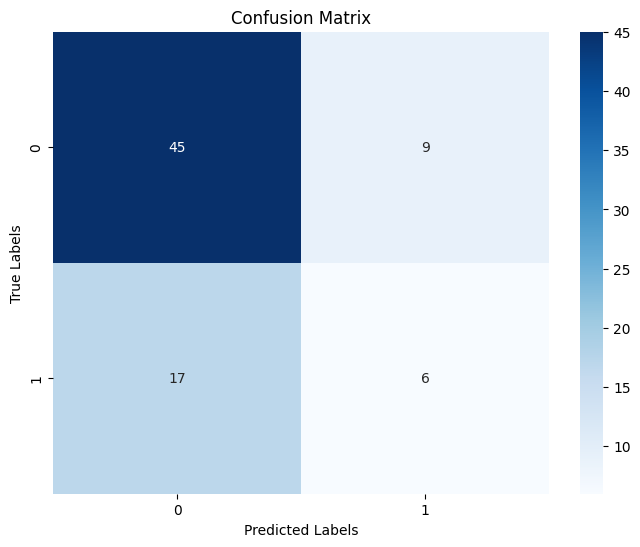

In [318]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


According to the confusion matrix, without standardization and SMOTE, the DNN classifier correctly classified 45 instances out of 54 for the '0' class and correctly classified 6 instances out of 23 for the '1' class on the testing set.

### Data Standardization

### Applying Standard Scaler

In [319]:
# Standardize the feature matrix 'X' using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Combine the standardized features with the target variable 'y'
data = np.hstack((X, np.reshape(y, (-1, 1))))

# Create a new DataFrame 'transformed_df' with standardized features and original column names
transformed_df = pd.DataFrame(data, columns=PIDD_median.columns)

### Data Balancing 

### Applying SMOTE

In [320]:
# Apply SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

# Combine the resampled features with the target variable 'y'
data = np.hstack((X, np.reshape(y, (-1, 1))))

# Create a new DataFrame 'transformed_resampled_df' with resampled features and original column names
transformed_resampled_df = pd.DataFrame(data, columns=PIDD_median.columns)

In [321]:
len(transformed_resampled_df[transformed_resampled_df["Outcome"]==1]), len(transformed_resampled_df[transformed_resampled_df["Outcome"]==0])

(500, 500)

In [322]:
# Spilt data into training and testing set in ratio 80:20
# Split data into validation and testing set in ratio 50:50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [323]:
# Create a new Sequential model (model2)
model2 = tf.keras.Sequential([
    # First hidden layer with 16 neurons and ReLU activation function
    tf.keras.layers.Dense(16, activation="relu"),

    # Second hidden layer with 16 neurons and ReLU activation function
    tf.keras.layers.Dense(16, activation="relu"),

    # Output layer with 1 neuron and sigmoid activation function for binary classification
    tf.keras.layers.Dense(1, activation="sigmoid")
])


In [324]:
# Define EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    verbose=1,            # Set to 1 for detailed logging
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

In [325]:
# Compile the new model (model2) with optimizer 'Adam', loss function, and evaluation metric
model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Adam optimizer with a learning rate of 0.001
    loss=tf.keras.losses.BinaryCrossentropy(),  # Binary crossentropy loss for binary classification
    metrics=["accuracy"]  # Evaluate model performance using accuracy metric
)


In [326]:
# Evaluate the new model (model2) on the training set
evaluation_results_model2_train = model2.evaluate(X_train, y_train)
evaluation_results_model2_train

25/25 [==============================] - 0s 3ms/step - loss: 0.7701 - accuracy: 0.4375


[0.7701128125190735, 0.4375]

In [327]:
# Evaluate the new model (model2) on the validation set
evaluation_results_model2_val = model2.evaluate(X_val, y_val)
evaluation_results_model2_val

4/4 [==============================] - 0s 4ms/step - loss: 0.8269 - accuracy: 0.3600


[0.8268821835517883, 0.36000001430511475]

In [328]:
# Train the new model (model2) on the training set
# - Using a batch size of 16
# - Training for 20 epochs
# - Validating on the validation set
# - Utilizing the EarlyStopping callback
# - Setting verbose mode to 1 for progress updates
history2 = model2.fit(
    X_train,
    y_train,
    batch_size=16,
    epochs=20,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],  
    verbose=1  # 1 for progress bar
)


Epoch 1/20
50/50 [==============================] - 2s 8ms/step - loss: 0.7091 - accuracy: 0.5075 - val_loss: 0.6897 - val_accuracy: 0.5000
Epoch 2/20
50/50 [==============================] - 0s 5ms/step - loss: 0.6300 - accuracy: 0.6513 - val_loss: 0.6139 - val_accuracy: 0.7200
Epoch 3/20
50/50 [==============================] - 0s 5ms/step - loss: 0.5829 - accuracy: 0.7138 - val_loss: 0.5487 - val_accuracy: 0.7600
Epoch 4/20
50/50 [==============================] - 0s 4ms/step - loss: 0.5475 - accuracy: 0.7387 - val_loss: 0.4993 - val_accuracy: 0.7500
Epoch 5/20
50/50 [==============================] - 0s 4ms/step - loss: 0.5234 - accuracy: 0.7412 - val_loss: 0.4646 - val_accuracy: 0.7700
Epoch 6/20
50/50 [==============================] - 0s 4ms/step - loss: 0.5084 - accuracy: 0.7425 - val_loss: 0.4420 - val_accuracy: 0.7900
Epoch 7/20
50/50 [==============================] - 0s 4ms/step - loss: 0.4981 - accuracy: 0.7450 - val_loss: 0.4293 - val_accuracy: 0.7900
Epoch 8/20
50/50 [==

Summary:

The DNN classifier was trained on the PID dataset. Prior to training, the dataset underwent preprocessing, which included median imputation with standardization and Synthetic Minority Over-sampling Technique (SMOTE) with the following parameters:

- Optimizer: Adam
- Learning Rate: 0.001
- Batch Size: 16
- Epochs: 20

the training process spans 20 epochs, during which the classifier shows significant improvement. The initial epoch starts with a relatively high loss and low accuracy, but both metrics steadily improve over subsequent epochs. The classifier demonstrates effective learning, as indicated by the decreasing training and validation losses, and increasing training and validation accuracies. However, there is a potential risk of overfitting, given the higher training accuracy compared to validation accuracy.

The final epoch results in a well-performing model with a training accuracy of 0.7850 and a validation accuracy of 0.8800

In [329]:
# Evaluate the trained new model (model2) on the test set
test_results_model2 = model2.evaluate(X_test, y_test)
test_results_model2

4/4 [==============================] - 0s 2ms/step - loss: 0.3798 - accuracy: 0.8300


[0.37979647517204285, 0.8299999833106995]

The DNN model achieved an accuracy of 0.8300 and a loss of 0.3798 on the testing set.

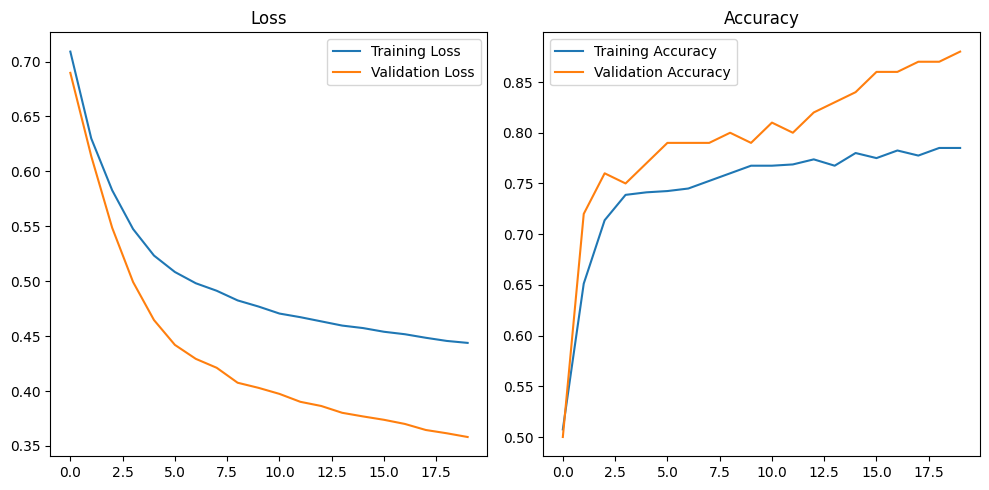

In [361]:
# Plot training history
plt.figure(figsize=(10, 5))

# Plot losses
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

# Plot accuracies
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Upon examining the accuracy and loss chart for the DNN classifier, a conspicuous sign of overfitting emerges in both the training and validation accuracy. However, there is no apparent sign of overfitting in the losses. Instead, a notable disparity is observed in the loss values.

In [331]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve, classification_report

# Make predictions on the test set
y_prob2 = model2.predict(X_test)

# Use a threshold to convert to class labels
threshold = 0.5
y_pred2 = (y_prob2 > threshold).astype(int)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)



# Classification Report
classification_rep = classification_report(y_test, y_pred2)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred2)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)




4/4 [==============================] - 0s 3ms/step
Accuracy: 0.83
Precision: 0.8
Recall: 0.9056603773584906
F1 Score: 0.8495575221238938
ROC AUC Score: 0.8251706142111602


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.74      0.80        47
           1       0.80      0.91      0.85        53

    accuracy                           0.83       100
   macro avg       0.84      0.83      0.83       100
weighted avg       0.84      0.83      0.83       100



Based on the classification report, post-application of StandardScaler and SMOTE, the DNN classifier achieved an accuracy of 0.83, precision of 0.80, recall of 0.91, F1-score of 0.85 and ROC AUC score of 0.86 on the testing set.

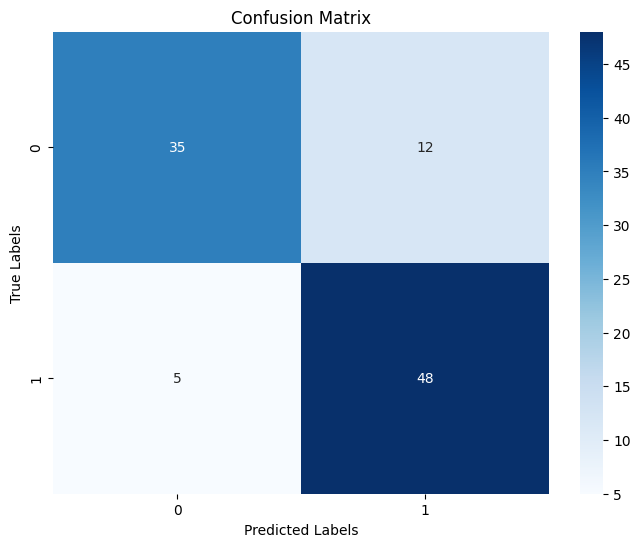

In [332]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred2)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


According to the confusion matrix, with standardization and SMOTE, the DNN classifier correctly classified 35 instances out of 47 for the '0' class and correctly classified 48 instances out of 53 for the '1' class on the testing set.

## Building a DNN Classifier with the PID Dataset: Preprocessed by Excluding Zero-Value Rows and Handling Outliers with IQR and Median Imputation.

Here we will build our DNN lassifier with the PID dataset that has been preprocessed by excluding rows with zero-values and utilizing median imputation for outlier handling

In [333]:
# Load the dataset
PIDD

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
3            1.0     89.0           66.0           23.0     94.0  28.10   
6            3.0     78.0           50.0           32.0     88.0  31.00   
8            3.5    140.5           71.0           33.0    348.0  35.45   
13           3.5    140.5           71.0           33.0    348.0  35.45   
14           5.0    166.0           72.0           19.0    175.0  25.80   
..           ...      ...            ...            ...      ...    ...   
751          1.0    121.0           78.0           39.0     74.0  39.00   
755          1.0    128.0           88.0           39.0    110.0  36.50   
760          2.0     88.0           58.0           26.0     16.0  28.40   
763          3.5    140.5           71.0           33.0    348.0  35.45   
765          5.0    121.0           72.0           23.0    112.0  26.20   

     DiabetesPedigreeFunction  Age  Outcome  
3                       0.167   21        0  
6                       0.248   26        1  
8                       0.551   34        1  
13                      0.551   34        1  
14                      0.587   51        1  
..                        ...  ...      ...  
751                     0.261   28        0  
755                     1.057   37        1  
760                     0.766   22        0  
763                     0.551   34        1  
765                     0.245   30        0  

[336 rows x 9 columns]

In [334]:
# Count of series of unique values in target class 'Outcome'
PIDD["Outcome"].value_counts()

0    205
1    131
Name: Outcome, dtype: int64

In [335]:
# Get data
X = PIDD[PIDD.columns[:-1]].values
y = PIDD[PIDD.columns[-1]].values

In [336]:
# Split data into training and testing set in ratio 80:20
# Split data into validation and testing set in ratio 50:50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [337]:
# Creating a Sequential model using TensorFlow's Keras
model3 = tf.keras.Sequential([
    # First hidden layer with 16 neurons and ReLU activation function
    tf.keras.layers.Dense(16, activation="relu"),
    
    # Second hidden layer with 16 neurons and ReLU activation function
    tf.keras.layers.Dense(16, activation="relu"),
    
    # Output layer with 1 neuron (binary classification) and sigmoid activation function
    tf.keras.layers.Dense(1, activation="sigmoid")
])


In [338]:
# Define EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    verbose=1,            # Set to 1 for detailed logging
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

In [339]:
# Compiling the new model (model 3) with specific configurations
model3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Adam optimizer with a learning rate of 0.001
    loss=tf.keras.losses.BinaryCrossentropy(),  # Binary Crossentropy loss for binary classification
    metrics=["accuracy"]  # Monitoring accuracy during training
)

In [340]:
# Evaluate the third model (model3) on the training set
evaluation_results_model3_train = model3.evaluate(X_train, y_train)
evaluation_results_model3_train

9/9 [==============================] - 1s 5ms/step - loss: 0.5836 - accuracy: 0.7500


[0.5835842490196228, 0.75]

In [341]:
# Evaluate the third model (model3) on the validation set
evaluation_results_model3_val = model3.evaluate(X_val, y_val)
evaluation_results_model3_val

2/2 [==============================] - 0s 4ms/step - loss: 0.5587 - accuracy: 0.7059


[0.5587165355682373, 0.7058823704719543]

In [342]:
# Train the third model (model3) on the training set
# - Using a batch size of 16
# - Training for 20 epochs
# - Validating on the validation set
# - Utilizing the EarlyStopping callback
# - Setting verbose mode to 1 for progress updates
history3 = model3.fit(
    X_train,
    y_train,
    batch_size=16,
    epochs=20,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],  
    verbose=1  # 1 for progress bar
)


Epoch 1/20
17/17 [==============================] - 2s 11ms/step - loss: 0.5669 - accuracy: 0.7388 - val_loss: 0.5272 - val_accuracy: 0.7353
Epoch 2/20
17/17 [==============================] - 0s 15ms/step - loss: 0.5266 - accuracy: 0.7313 - val_loss: 0.5076 - val_accuracy: 0.7647
Epoch 3/20
17/17 [==============================] - 0s 9ms/step - loss: 0.5087 - accuracy: 0.7500 - val_loss: 0.4995 - val_accuracy: 0.7059
Epoch 4/20
17/17 [==============================] - 0s 8ms/step - loss: 0.5010 - accuracy: 0.7463 - val_loss: 0.4898 - val_accuracy: 0.7647
Epoch 5/20
17/17 [==============================] - 0s 10ms/step - loss: 0.5014 - accuracy: 0.7388 - val_loss: 0.4855 - val_accuracy: 0.7941
Epoch 6/20
17/17 [==============================] - 0s 9ms/step - loss: 0.4925 - accuracy: 0.7500 - val_loss: 0.4843 - val_accuracy: 0.7059
Epoch 7/20
17/17 [==============================] - 0s 7ms/step - loss: 0.4921 - accuracy: 0.7575 - val_loss: 0.4784 - val_accuracy: 0.7059
Epoch 8/20
17/17 

Summary:

The DNN classifier was trained on the PID dataset. Prior to training, the dataset underwent preprocessing, which included excluding rows with zero values, IQR and median imputation for treating outliers with the following parameters:

- Optimizer: Adam
- Learning Rate: 0.001
- Batch Size: 16
- Epochs: 20

the training process spans 20 epochs, during which the DNN classifier exhibits progressive improvement in training accuracy and loss, reaching 0.7612 and 0.4754, respectively. However, validation accuracy plateaus around 0.7353, suggesting a potential risk of overfitting,

In [343]:
# Evaluate the trained third model (model3) on the test set
test_results_model3 = model3.evaluate(X_test, y_test)
test_results_model3

2/2 [==============================] - 0s 9ms/step - loss: 0.8962 - accuracy: 0.5294


[0.8961524963378906, 0.529411792755127]

The DNN model achieved an accuracy of 0.5294 and a loss of 0.8962 on the testing set

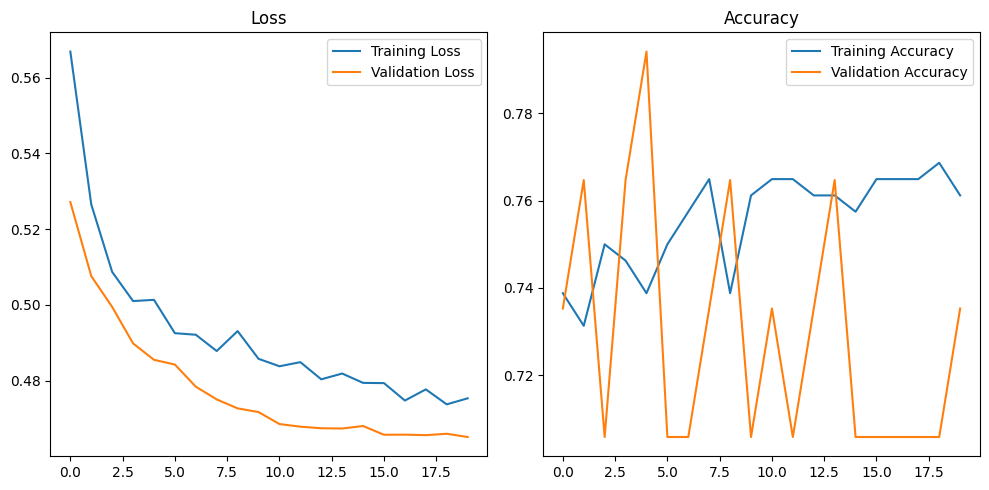

In [344]:
# Plot training history
plt.figure(figsize=(10, 5))

# Plot losses
plt.subplot(1, 2, 1)
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

# Plot accuracies
plt.subplot(1, 2, 2)
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Upon examining the accuracy and loss chart for the DNN classifier, a conspicuous sign of overfitting emerges for the training and validation accuracy. However, there was no sign of overfitting on the losses. 

In [345]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve, classification_report

# Make predictions on the test set
y_prob3 = model3.predict(X_test)

# Use a threshold to convert to class labels
threshold = 0.5
y_pred3 = (y_prob3 > threshold).astype(int)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)



# Classification Report
classification_rep = classification_report(y_test, y_pred3)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred3)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)

2/2 [==============================] - 0s 9ms/step
Accuracy: 0.5294117647058824
Precision: 0.6666666666666666
Recall: 0.3157894736842105
F1 Score: 0.42857142857142855
ROC AUC Score: 0.5578947368421053


Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.80      0.60        15
           1       0.67      0.32      0.43        19

    accuracy                           0.53        34
   macro avg       0.57      0.56      0.51        34
weighted avg       0.58      0.53      0.50        34



Based on the classification report,  the DNN classifier achieved an accuracy of 0.53, precision of 0.67, recall of 0.32, F1-score of 0.43 and ROC AUC score of 0.56 on the testing set.

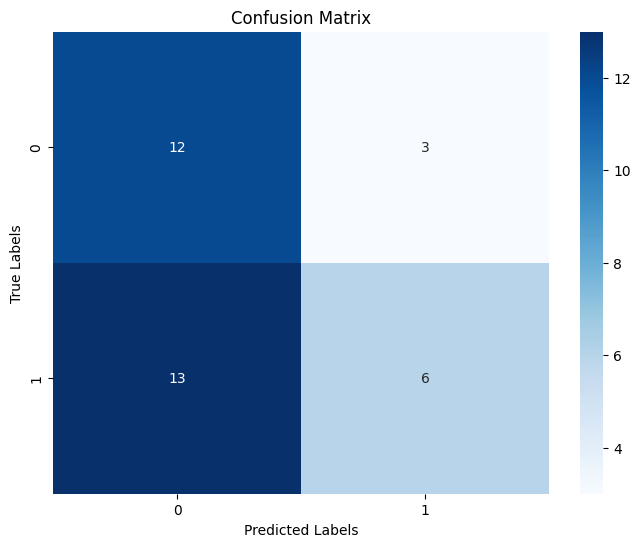

In [346]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred3)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


According to the confusion matrix, the DNN classifier correctly classified 12 instances out of 15 for the '0' class and correctly classified 6 instances out of 19 for the '1' class on the testing set.

### Data Standardization

### Applying Standard Scaler

In [347]:
# Standardize the feature matrix 'X' using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Combine the standardized features with the target variable 'y'
data = np.hstack((X, np.reshape(y, (-1, 1))))

# Create a new DataFrame 'transformed_df' with standardized features and original column names
transformed_df = pd.DataFrame(data, columns=PIDD.columns)

### Data Balancing

### Applying SMOTE

In [348]:
# Apply SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

# Combine the resampled features with the target variable 'y'
data = np.hstack((X, np.reshape(y, (-1, 1))))

# Create a new DataFrame 'transformed_resampled_df' with resampled features and original column names
transformed_resampled_df = pd.DataFrame(data, columns=PIDD.columns)

In [349]:
# Count the number of instances in the resampled DataFrame for each class
len(transformed_resampled_df[transformed_resampled_df["Outcome"]==1]), len(transformed_resampled_df[transformed_resampled_df["Outcome"]==0])

(205, 205)

In [350]:
# Spilt data into training and testing set in ratio 80:20
# Split data into validation and testing set in ratio 50:50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [351]:
# Create a fourth Sequential model (model4)
model4 = tf.keras.Sequential([
    # First hidden layer with 16 neurons and ReLU activation function
    tf.keras.layers.Dense(16, activation="relu"),

    # Second hidden layer with 16 neurons and ReLU activation function
    tf.keras.layers.Dense(16, activation="relu"),

    # Output layer with 1 neuron and sigmoid activation function for binary classification
    tf.keras.layers.Dense(1, activation="sigmoid")
])


In [352]:
# Define EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    verbose=1,            # Set to 1 for detailed logging
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

In [353]:
# Compile the fourth model (model4) with optimizer 'Adam', loss function, and evaluation metric
model4.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Adam optimizer with a learning rate of 0.001
    loss=tf.keras.losses.BinaryCrossentropy(),  # Binary crossentropy loss for binary classification
    metrics=["accuracy"]  # Evaluate model performance using accuracy metric
)

In [354]:
# Evaluate the trained fourth model (model4) on the training set
evaluation_results_model4_train = model4.evaluate(X_train, y_train)
evaluation_results_model4_train

11/11 [==============================] - 0s 3ms/step - loss: 0.6609 - accuracy: 0.5030


[0.660872220993042, 0.5030487775802612]

In [355]:
# Evaluate the trained fourth model (model4) on the validation set
evaluation_results_model4_val = model4.evaluate(X_val, y_val)
evaluation_results_model4_val

2/2 [==============================] - 0s 5ms/step - loss: 0.6154 - accuracy: 0.5366


[0.6153585910797119, 0.5365853905677795]

In [356]:
# Train the fourth model (model4) on the training set
# - Using a batch size of 16
# - Training for 20 epochs
# - Validating on the validation set
# - Utilizing the EarlyStopping callback
# - Setting verbose mode to 1 for progress updates
history4 = model4.fit(
    X_train,
    y_train,
    batch_size=16,
    epochs=20,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],  
    verbose=1  #  1 for progress bar
)


Epoch 1/20
21/21 [==============================] - 2s 10ms/step - loss: 0.6319 - accuracy: 0.6555 - val_loss: 0.5449 - val_accuracy: 0.8293
Epoch 2/20
21/21 [==============================] - 0s 6ms/step - loss: 0.5756 - accuracy: 0.7744 - val_loss: 0.4884 - val_accuracy: 0.8537
Epoch 3/20
21/21 [==============================] - 0s 6ms/step - loss: 0.5308 - accuracy: 0.7744 - val_loss: 0.4444 - val_accuracy: 0.8537
Epoch 4/20
21/21 [==============================] - 0s 6ms/step - loss: 0.4927 - accuracy: 0.7774 - val_loss: 0.4107 - val_accuracy: 0.8780
Epoch 5/20
21/21 [==============================] - 0s 5ms/step - loss: 0.4615 - accuracy: 0.7988 - val_loss: 0.3866 - val_accuracy: 0.8780
Epoch 6/20
21/21 [==============================] - 0s 5ms/step - loss: 0.4381 - accuracy: 0.8049 - val_loss: 0.3697 - val_accuracy: 0.8537
Epoch 7/20
21/21 [==============================] - 0s 5ms/step - loss: 0.4201 - accuracy: 0.8140 - val_loss: 0.3631 - val_accuracy: 0.8537
Epoch 8/20
21/21 [=

The DNN classifier, post-application of StandardScaler and SMOTE, initially exhibits a training loss of 0.6319 and an training accuracy of 65.55%, gradually improving over epochs. Notably, the validation accuracy increases from 82.93% to 87.80%. The training is configured with early stopping, triggered after the 13th epoch due to the restoration of weights from the end of the best epoch (10). This suggests the classifier achieved its best performance at the 10th epoch, preventing overfitting and ensuring generalization to unseen data.

In [357]:
# Evaluate the trained fourth model (model4) on the test set
test_results_model4 = model4.evaluate(X_test, y_test)
test_results_model4

2/2 [==============================] - 0s 11ms/step - loss: 0.4860 - accuracy: 0.7805


[0.48599228262901306, 0.7804877758026123]

The DNN model achieved an accuracy of 0.7805 and a loss of 0.4860 on the testing set

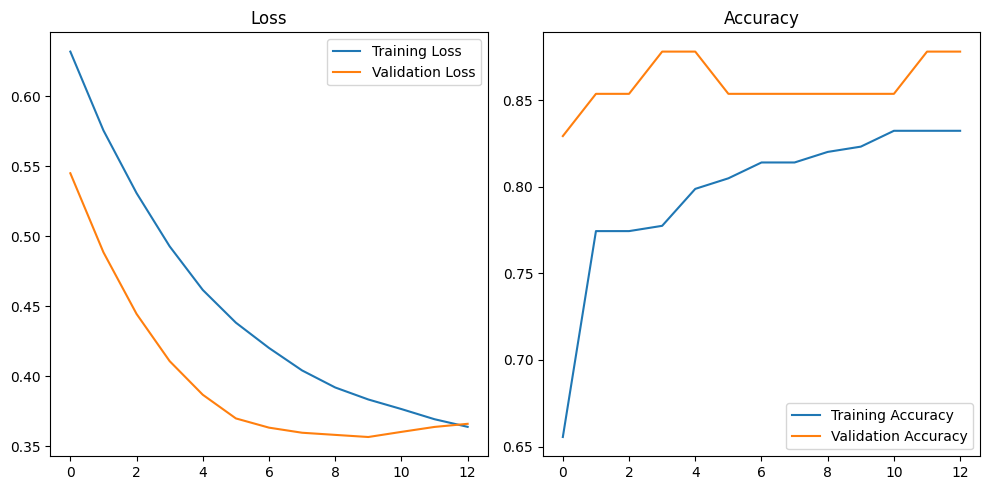

In [358]:
# Plot training history
plt.figure(figsize=(10, 5))

# Plot losses
plt.subplot(1, 2, 1)
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

# Plot accuracies
plt.subplot(1, 2, 2)
plt.plot(history4.history['accuracy'], label='Training Accuracy')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Upon examining the accuracy and loss chart for the DNN classifier, the validation loss decreases initially but starts to increase slightly from 0.3564 (epoch 10) and overfits at the 12th epoch. However, there was no indication of overfitting based on the training and validation accuracy.  

In [359]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve, classification_report

# Make predictions on the test set
y_prob4 = model4.predict(X_test)

# Use a threshold to convert to class labels
threshold = 0.5
y_pred4 = (y_prob4 > threshold).astype(int)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred4)
precision = precision_score(y_test, y_pred4)
recall = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)



# Classification Report
classification_rep = classification_report(y_test, y_pred4)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred4)

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\n")
print("Classification Report:")
print(classification_rep)




2/2 [==============================] - 0s 7ms/step
Accuracy: 0.7804878048780488
Precision: 0.6842105263157895
Recall: 0.8125
F1 Score: 0.742857142857143
ROC AUC Score: 0.78625


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        25
           1       0.68      0.81      0.74        16

    accuracy                           0.78        41
   macro avg       0.77      0.79      0.78        41
weighted avg       0.79      0.78      0.78        41



Based on the classification report, post-application of StandardScaler and SMOTE, the DNN classifier achieved an accuracy of 0.78, precision of 0.68, recall of 0.81, F1-score of 0.74 and ROC AUC score of 0.79 on the testing set.

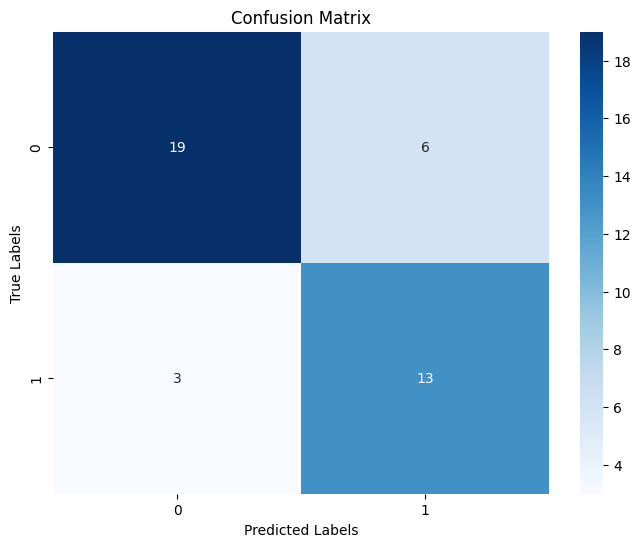

In [360]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred4)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

According to the confusion matrix, the DNN classifier correctly classified 19 instances out of 25 for the '0' class and correctly classified 13 instances out of 16 for the '1' class on the testing set.